# 6373: Final Project

In [ ]:
# import packages
import math
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Input
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.decomposition import PCA

## Load Data

https://zenodo.org/record/6496656/files/organamnist.npz?download=1

In [ ]:
# specify path to .npz file
npz_file_path = 'data/organamnist.npz'

# load data from the .npz file
organ = np.load(npz_file_path)

# determine keys
print("Keys in the .npz file:")
keys = list(organ.keys())
for key in keys:
    print(key)

Keys in the .npz file:
train_images
val_images
test_images
train_labels
val_labels
test_labels


In [ ]:
# pull variables
array1 = organ['train_images']
array2 = organ['test_images']
array3 = organ['val_images']

variables = np.concatenate((array1, array2, array3), axis=0)

In [ ]:
# total number of observations in variables, dimensions of each observation
variables.shape[0], np.array([matrix.shape for matrix in variables])

(58850,
 array([[28, 28],
        [28, 28],
        [28, 28],
        ...,
        [28, 28],
        [28, 28],
        [28, 28]]))

In [ ]:
# Pull class labels / count total number of observations
array4 = organ['train_labels']
array5 = organ['test_labels']
array6 = organ['val_labels']

labels = np.concatenate((array4, array5, array6), axis=0)

In [ ]:
# Total number of observations in labels and dimensions of each label
labels.shape[0], np.array([matrix.shape for matrix in labels])

(58850,
 array([[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]))

In [ ]:
# identify unique classes
def get_unique_objects(arr):
    unique_objects = []
    for obj in arr:
        if obj not in unique_objects:
            unique_objects.append(obj)
    return unique_objects

get_unique_objects(labels)

[array([6], dtype=uint8),
 array([8], dtype=uint8),
 array([5], dtype=uint8),
 array([9], dtype=uint8),
 array([7], dtype=uint8),
 array([4], dtype=uint8),
 array([0], dtype=uint8),
 array([10], dtype=uint8),
 array([3], dtype=uint8),
 array([2], dtype=uint8),
 array([1], dtype=uint8)]

In [ ]:
# count cases per class
num_cl0 = np.count_nonzero(labels == 0)
num_cl1 = np.count_nonzero(labels == 1)
num_cl2 = np.count_nonzero(labels == 2)
num_cl3 = np.count_nonzero(labels == 3)
num_cl4 = np.count_nonzero(labels == 4)
num_cl5 = np.count_nonzero(labels == 5)
num_cl6 = np.count_nonzero(labels == 6)
num_cl7 = np.count_nonzero(labels == 7)
num_cl8 = np.count_nonzero(labels == 8)
num_cl9 = np.count_nonzero(labels == 9)
num_cl10 = np.count_nonzero(labels == 10)

print("Class 0:", num_cl0,
     "\nClass 1:", num_cl1,
     "\nClass 2:", num_cl2,
     "\nClass 3:", num_cl3,
     "\nClass 4:", num_cl4,
     "\nClass 5:", num_cl5,
     "\nClass 6:", num_cl6,
     "\nClass 7:", num_cl7,
     "\nClass 8:", num_cl8,
     "\nClass 9:", num_cl9,
     "\nClass 10:", num_cl10)

Class 0: 3313 
Class 1: 2425 
Class 2: 2377 
Class 3: 2651 
Class 4: 6595 
Class 5: 6419 
Class 6: 10482 
Class 7: 6699 
Class 8: 6751 
Class 9: 5182 
Class 10: 5956


## Prepare Data

In [ ]:
# convert variable matrices into variable vectors
flat_variables = np.array([np.ravel(matrix) for matrix in variables])
flat_variables.shape[0], np.array([vector.shape for vector in flat_variables])

(58850,
 array([[784],
        [784],
        [784],
        ...,
        [784],
        [784],
        [784]]))

In [ ]:
# attach labels to variable vectors
merged = np.column_stack((labels, flat_variables))
merged.shape[0], np.array([vector.shape for vector in merged])

(58850,
 array([[785],
        [785],
        [785],
        ...,
        [785],
        [785],
        [785]]))

In [ ]:
# create class data sets
cl_0 = merged[merged[:,0] == 0]
cl_1 = merged[merged[:,0] == 4]
cl_2 = merged[merged[:,0] == 5]
cl_3 = merged[merged[:,0] == 6]
cl_4 = merged[merged[:,0] == 7]
cl_5 = merged[merged[:,0] == 8]
cl_6 = merged[merged[:,0] == 9]
cl_7 = merged[merged[:,0] == 10]

In [ ]:
# relabel classes
cl_0[:,0] = 0
cl_1[:,0] = 1
cl_2[:,0] = 2
cl_3[:,0] = 3
cl_4[:,0] = 4
cl_5[:,0] = 5
cl_6[:,0] = 6
cl_7[:,0] = 7

In [ ]:
# balance classes
red_cl_0 = cl_0[np.random.permutation(cl_0.shape[0])[:3313]]
red_cl_1 = cl_1[np.random.permutation(cl_1.shape[0])[:3313]]
red_cl_2 = cl_2[np.random.permutation(cl_2.shape[0])[:3313]]
red_cl_3 = cl_3[np.random.permutation(cl_3.shape[0])[:3313]]
red_cl_4 = cl_4[np.random.permutation(cl_4.shape[0])[:3313]]
red_cl_5 = cl_5[np.random.permutation(cl_5.shape[0])[:3313]]
red_cl_6 = cl_6[np.random.permutation(cl_6.shape[0])[:3313]]
red_cl_7 = cl_7[np.random.permutation(cl_7.shape[0])[:3313]]

In [ ]:
img_cl_0 = red_cl_0[:, 1:]
img_cl_1 = red_cl_1[:, 1:]
img_cl_2 = red_cl_2[:, 1:]
img_cl_3 = red_cl_3[:, 1:]
img_cl_4 = red_cl_4[:, 1:]
img_cl_5 = red_cl_5[:, 1:]
img_cl_6 = red_cl_6[:, 1:]
img_cl_7 = red_cl_7[:, 1:]

img_cl_0 = np.array([x.reshape(28, 28) for x in img_cl_0])/255
img_cl_1 = np.array([x.reshape(28, 28) for x in img_cl_1])/255
img_cl_2 = np.array([x.reshape(28, 28) for x in img_cl_2])/255
img_cl_3 = np.array([x.reshape(28, 28) for x in img_cl_3])/255
img_cl_4 = np.array([x.reshape(28, 28) for x in img_cl_4])/255
img_cl_5 = np.array([x.reshape(28, 28) for x in img_cl_5])/255
img_cl_6 = np.array([x.reshape(28, 28) for x in img_cl_6])/255
img_cl_7 = np.array([x.reshape(28, 28) for x in img_cl_7])/255

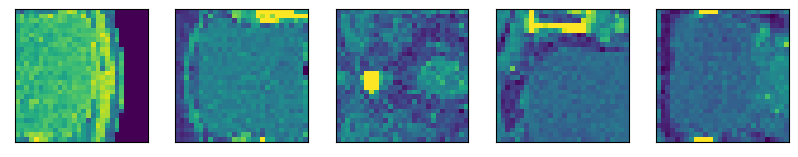

In [ ]:
plt.figure(figsize=(10,10))
for i in range(100, 105):
    plt.subplot(5,5,i-99)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_cl_0[i])
plt.show()

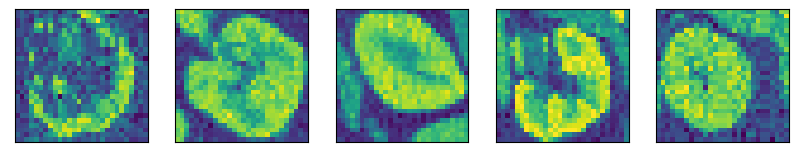

In [ ]:
plt.figure(figsize=(10,10))
for i in range(100, 105):
    plt.subplot(5,5,i-99)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_cl_1[i])
plt.show()

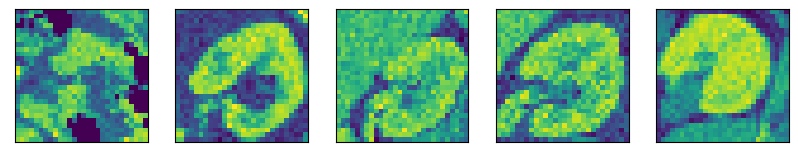

In [ ]:
plt.figure(figsize=(10,10))
for i in range(100, 105):
    plt.subplot(5,5,i-99)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_cl_2[i])
plt.show()

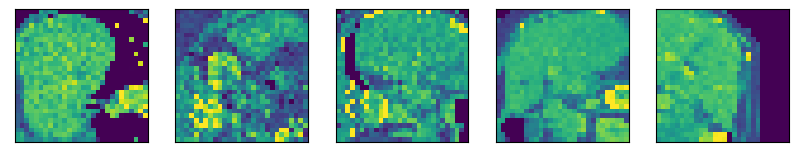

In [ ]:
plt.figure(figsize=(10,10))
for i in range(100, 105):
    plt.subplot(5,5,i-99)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_cl_3[i])
plt.show()

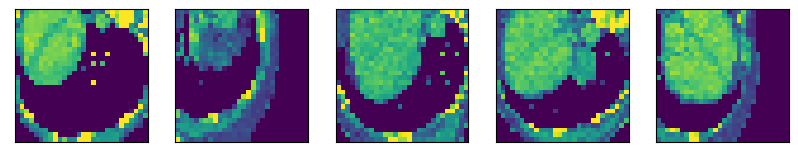

In [ ]:
plt.figure(figsize=(10,10))
for i in range(100, 105):
    plt.subplot(5,5,i-99)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_cl_4[i])
plt.show()

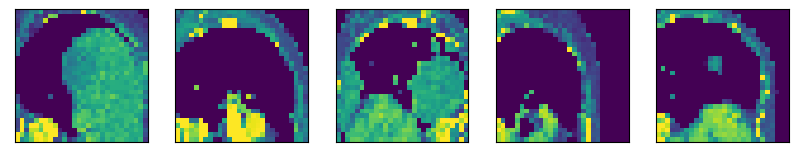

In [ ]:
plt.figure(figsize=(10,10))
for i in range(20, 25):
    plt.subplot(5,5,i-19)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_cl_5[i])
plt.show()

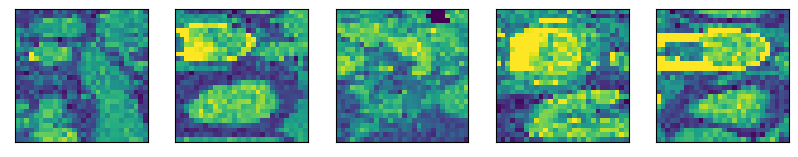

In [ ]:
plt.figure(figsize=(10,10))
for i in range(50, 55):
    plt.subplot(5,5,i-49)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_cl_6[i])
plt.show()

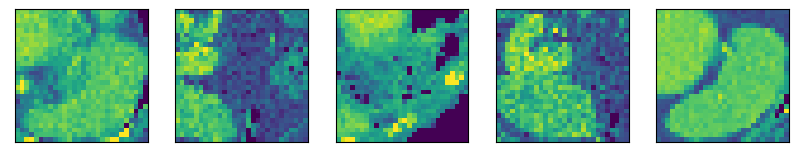

In [ ]:
plt.figure(figsize=(10,10))
for i in range(100, 105):
    plt.subplot(5,5,i-99)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_cl_7[i])
plt.show()

In [ ]:
# create test split
cl_0_trainval, cl_0_test = train_test_split(red_cl_0, test_size=.1)
cl_1_trainval, cl_1_test = train_test_split(red_cl_1, test_size=.1)
cl_2_trainval, cl_2_test = train_test_split(red_cl_2, test_size=.1)
cl_3_trainval, cl_3_test = train_test_split(red_cl_3, test_size=.1)
cl_4_trainval, cl_4_test = train_test_split(red_cl_4, test_size=.1)
cl_5_trainval, cl_5_test = train_test_split(red_cl_5, test_size=.1)
cl_6_trainval, cl_6_test = train_test_split(red_cl_6, test_size=.1)
cl_7_trainval, cl_7_test = train_test_split(red_cl_7, test_size=.1)

# create validation split
cl_0_train, cl_0_val = train_test_split(cl_0_trainval, test_size=.05)
cl_1_train, cl_1_val = train_test_split(cl_1_trainval, test_size=.05)
cl_2_train, cl_2_val = train_test_split(cl_2_trainval, test_size=.05)
cl_3_train, cl_3_val = train_test_split(cl_3_trainval, test_size=.05)
cl_4_train, cl_4_val = train_test_split(cl_4_trainval, test_size=.05)
cl_5_train, cl_5_val = train_test_split(cl_5_trainval, test_size=.05)
cl_6_train, cl_6_val = train_test_split(cl_6_trainval, test_size=.05)
cl_7_train, cl_7_val = train_test_split(cl_7_trainval, test_size=.05)

In [ ]:
# combine train data
train = np.concatenate((cl_0_train, cl_1_train, cl_2_train, cl_3_train,
                        cl_4_train, cl_5_train, cl_6_train, cl_7_train), axis=0)

# combine validation data
val = np.concatenate((cl_0_val, cl_1_val, cl_2_val, cl_3_val,
                      cl_4_val, cl_5_val, cl_6_val, cl_7_val), axis=0)

# combine test data
test = np.concatenate((cl_0_test, cl_1_test, cl_2_test, cl_3_test,
                       cl_4_test, cl_5_test, cl_6_test, cl_7_test), axis=0)

In [ ]:
# separate x and y train data
y_train = train[:, 0].reshape(len(train[:, 0]), 1)
x_train_flat = train[:, 1:]

# separate x and y validation data
y_val = val[:, 0].reshape(len(val[:, 0]), 1)
x_val_flat = val[:, 1:]

# separate x and y test data
y_test = test[:, 0].reshape(len(test[:, 0]), 1)
x_test_flat = test[:, 1:]

In [ ]:
# convert train variable vectors into matrices
x_train = np.array([x.reshape(28, 28) for x in x_train_flat])/255

# convert validation variable vectors into matrices
x_val = np.array([x.reshape(28, 28) for x in x_val_flat])/255

# convert test variable vectors into matrices
x_test = np.array([x.reshape(28, 28) for x in x_test_flat])/255

In [ ]:
# add axis to train variables
x_train = x_train[..., np.newaxis]

# add axis to validation variables
x_val = x_val[..., np.newaxis]

# add axis to test variables
x_test = x_test[..., np.newaxis]

In [ ]:
# one-hot encode train labels
y_train = to_categorical(y_train)

# one-hot encode validation labels
y_val = to_categorical(y_val)

# one-hot encode test labels
y_test = to_categorical(y_test)

## Models

In [ ]:

class CNN:
    # initialize parameters
    def __init__(self, in_dim, epochs, batch_size, ch1, w1, ch2, w2, y_train, y_val, y_test, out_dim):
        self.in_dim = in_dim
        self.epochs = epochs
        self.batch_size = batch_size
        self.y_train = y_train
        self.y_val = y_val
        self.y_test = y_test
        self.ch1 = ch1
        self.w1 = w1
        self.ch2 = ch2
        self.w2 = w2
        self.out_dim = out_dim

    def create_model(self):
        # define conv and maxpool layers
        self.model = Sequential()
        self.model.add(Conv2D(self.ch1, self.w1, strides=(1,1), activation='relu', padding='valid', input_shape=(28, 28, 1), name='conv1'))
        self.model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='valid', name='maxpool1'))
        self.model.add(Conv2D(self.ch2, self.w2, strides=(1, 1), padding='valid', activation='relu', name='conv2'))
        self.model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='valid', name='maxpool2'))
        
        # dropout
        self.model.add(Dropout(.5))
        
        # define flatten layer
        flatten_layer = Flatten()
        self.model.add(flatten_layer)
        
        # submodel extracts flatten layer output
        self.flatten_layer_model = Model(inputs=self.model.input, outputs=flatten_layer.output)
        
        # define hidden layer
        hidden_size = flatten_layer(Input(shape=(28,28,1))).shape[-1] // 2
        self.model.add(Dense(hidden_size, activation='relu'))
        
        self.model.add(Dense(8, activation='softmax'))
        
        # compile model
        self.model.compile(optimizer='adam',
                       loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
    # train
    def train_model(self, x_train, x_val):
        start_time = time.time()
        history = self.model.fit(x_train, self.y_train,
                                 validation_data = (x_val, self.y_val),
                                 batch_size = self.batch_size,
                                 epochs = self.epochs
                                )
        end_time = time.time()
        train_time = round(end_time - start_time, 2)
        total_params = self.model.count_params()
        total_infos = y_train.shape[0] * y_train.shape[1]
        pars_ratio = round(total_infos / total_params, 2)
        return history, train_time, total_params, pars_ratio
    
    # evaluate
    def eval_model(self, x, y):
        metrics = self.model.evaluate(x, y, verbose=0)
        return metrics

In [ ]:
# define input dimensions
in_dim = x_train.shape[1:]

# define output dimensions
out_dim = y_train.shape[1]

# define count of epochs
epochs = 150

# define batch size
batch_size = round((math.sqrt(x_train.shape[0])+80)/2)

Epoch 1/150
197/197 [==============================] - 1s 4ms/step - loss: 1.2922 - accuracy: 0.5103 - val_loss: 0.8666 - val_accuracy: 0.7267
Epoch 2/150
197/197 [==============================] - 0s 2ms/step - loss: 0.8554 - accuracy: 0.6971 - val_loss: 0.6007 - val_accuracy: 0.8050
Epoch 3/150
197/197 [==============================] - 0s 2ms/step - loss: 0.7015 - accuracy: 0.7479 - val_loss: 0.4910 - val_accuracy: 0.8292
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.6269 - accuracy: 0.7745 - val_loss: 0.4158 - val_accuracy: 0.8567
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.5580 - accuracy: 0.7980 - val_loss: 0.3697 - val_accuracy: 0.8775
Epoch 6/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4963 - accuracy: 0.8250 - val_loss: 0.3108 - val_accuracy: 0.8850
Epoch 7/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4502 - accuracy: 0.8410 - val_loss: 0.2790 - val_accuracy: 0.9058

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0933 - accuracy: 0.9671 - val_loss: 0.0406 - val_accuracy: 0.9850
Epoch 59/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0986 - accuracy: 0.9661 - val_loss: 0.0356 - val_accuracy: 0.9875
Epoch 60/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0981 - accuracy: 0.9650 - val_loss: 0.0368 - val_accuracy: 0.9900
Epoch 61/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0945 - accuracy: 0.9660 - val_loss: 0.0395 - val_accuracy: 0.9883
Epoch 62/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0989 - accuracy: 0.9645 - val_loss: 0.0399 - val_accuracy: 0.9867
Epoch 63/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0926 - accuracy: 0.9672 - val_loss: 0.0441 - val_accuracy: 0.9883
Epoch 64/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0914 - accuracy: 0.9671 - val_loss: 0.0420 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0639 - accuracy: 0.9782 - val_loss: 0.0329 - val_accuracy: 0.9892
Epoch 116/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0637 - accuracy: 0.9773 - val_loss: 0.0365 - val_accuracy: 0.9867
Epoch 117/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0637 - accuracy: 0.9772 - val_loss: 0.0337 - val_accuracy: 0.9875
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0662 - accuracy: 0.9773 - val_loss: 0.0325 - val_accuracy: 0.9900
Epoch 119/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0628 - accuracy: 0.9765 - val_loss: 0.0316 - val_accuracy: 0.9875
Epoch 120/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0629 - accuracy: 0.9781 - val_loss: 0.0315 - val_accuracy: 0.9908
Epoch 121/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0625 - accuracy: 0.9781 - val_loss: 0.0278 - val_ac

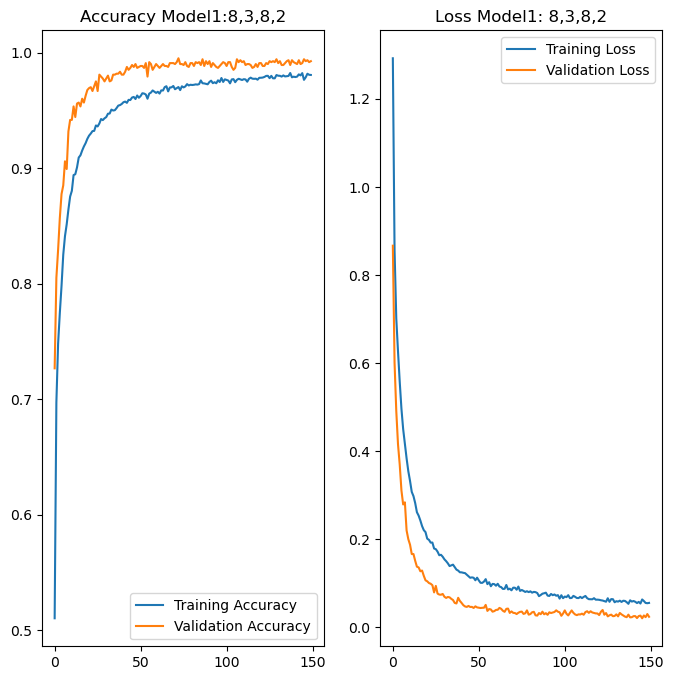

Epoch 1/150
197/197 [==============================] - 1s 3ms/step - loss: 1.4580 - accuracy: 0.4335 - val_loss: 1.0001 - val_accuracy: 0.6608
Epoch 2/150
197/197 [==============================] - 0s 2ms/step - loss: 0.9705 - accuracy: 0.6445 - val_loss: 0.7537 - val_accuracy: 0.7342
Epoch 3/150
197/197 [==============================] - 0s 2ms/step - loss: 0.8011 - accuracy: 0.7043 - val_loss: 0.5772 - val_accuracy: 0.8108
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.7479 - val_loss: 0.5007 - val_accuracy: 0.8350
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.6260 - accuracy: 0.7747 - val_loss: 0.4271 - val_accuracy: 0.8558
Epoch 6/150
197/197 [==============================] - 0s 2ms/step - loss: 0.5776 - accuracy: 0.7923 - val_loss: 0.3996 - val_accuracy: 0.8517
Epoch 7/150
197/197 [==============================] - 0s 2ms/step - loss: 0.5406 - accuracy: 0.8063 - val_loss: 0.3652 - val_accuracy: 0.8700

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1875 - accuracy: 0.9343 - val_loss: 0.0938 - val_accuracy: 0.9683
Epoch 59/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1855 - accuracy: 0.9320 - val_loss: 0.0865 - val_accuracy: 0.9742
Epoch 60/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1823 - accuracy: 0.9361 - val_loss: 0.0867 - val_accuracy: 0.9708
Epoch 61/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1793 - accuracy: 0.9362 - val_loss: 0.0822 - val_accuracy: 0.9775
Epoch 62/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1767 - accuracy: 0.9364 - val_loss: 0.0868 - val_accuracy: 0.9783
Epoch 63/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1760 - accuracy: 0.9384 - val_loss: 0.0817 - val_accuracy: 0.9767
Epoch 64/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1734 - accuracy: 0.9356 - val_loss: 0.0821 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1326 - accuracy: 0.9539 - val_loss: 0.0539 - val_accuracy: 0.9817
Epoch 116/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1299 - accuracy: 0.9530 - val_loss: 0.0625 - val_accuracy: 0.9775
Epoch 117/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1366 - accuracy: 0.9513 - val_loss: 0.0621 - val_accuracy: 0.9783
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1260 - accuracy: 0.9552 - val_loss: 0.0522 - val_accuracy: 0.9833
Epoch 119/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1379 - accuracy: 0.9520 - val_loss: 0.0585 - val_accuracy: 0.9817
Epoch 120/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1241 - accuracy: 0.9568 - val_loss: 0.0519 - val_accuracy: 0.9833
Epoch 121/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1294 - accuracy: 0.9534 - val_loss: 0.0587 - val_ac

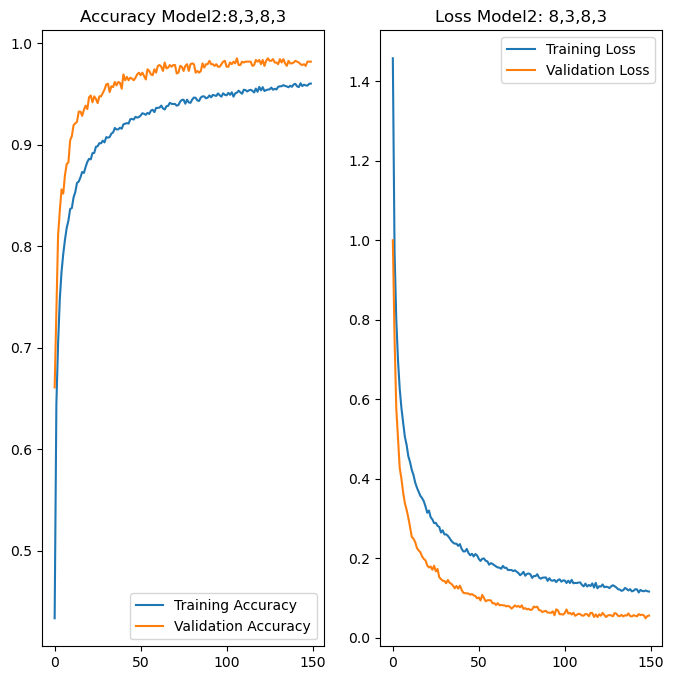

Epoch 1/150
197/197 [==============================] - 1s 3ms/step - loss: 1.1767 - accuracy: 0.5593 - val_loss: 0.6901 - val_accuracy: 0.7792
Epoch 2/150
197/197 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.7557 - val_loss: 0.4880 - val_accuracy: 0.8208
Epoch 3/150
197/197 [==============================] - 0s 2ms/step - loss: 0.5633 - accuracy: 0.8007 - val_loss: 0.3694 - val_accuracy: 0.8758
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4700 - accuracy: 0.8306 - val_loss: 0.3037 - val_accuracy: 0.9000
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8584 - val_loss: 0.2406 - val_accuracy: 0.9083
Epoch 6/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3547 - accuracy: 0.8753 - val_loss: 0.2188 - val_accuracy: 0.9242
Epoch 7/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3130 - accuracy: 0.8897 - val_loss: 0.1874 - val_accuracy: 0.9392

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0370 - accuracy: 0.9880 - val_loss: 0.0315 - val_accuracy: 0.9883
Epoch 59/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0365 - accuracy: 0.9882 - val_loss: 0.0313 - val_accuracy: 0.9892
Epoch 60/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0354 - accuracy: 0.9883 - val_loss: 0.0254 - val_accuracy: 0.9908
Epoch 61/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0316 - accuracy: 0.9890 - val_loss: 0.0280 - val_accuracy: 0.9917
Epoch 62/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 0.9889 - val_loss: 0.0304 - val_accuracy: 0.9875
Epoch 63/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0373 - accuracy: 0.9877 - val_loss: 0.0255 - val_accuracy: 0.9917
Epoch 64/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0354 - accuracy: 0.9880 - val_loss: 0.0297 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0205 - accuracy: 0.9933 - val_loss: 0.0386 - val_accuracy: 0.9883
Epoch 116/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0217 - accuracy: 0.9929 - val_loss: 0.0267 - val_accuracy: 0.9892
Epoch 117/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0213 - accuracy: 0.9928 - val_loss: 0.0374 - val_accuracy: 0.9892
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 0.9926 - val_loss: 0.0426 - val_accuracy: 0.9867
Epoch 119/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0204 - accuracy: 0.9931 - val_loss: 0.0332 - val_accuracy: 0.9867
Epoch 120/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 0.9930 - val_loss: 0.0393 - val_accuracy: 0.9883
Epoch 121/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0208 - accuracy: 0.9933 - val_loss: 0.0298 - val_ac

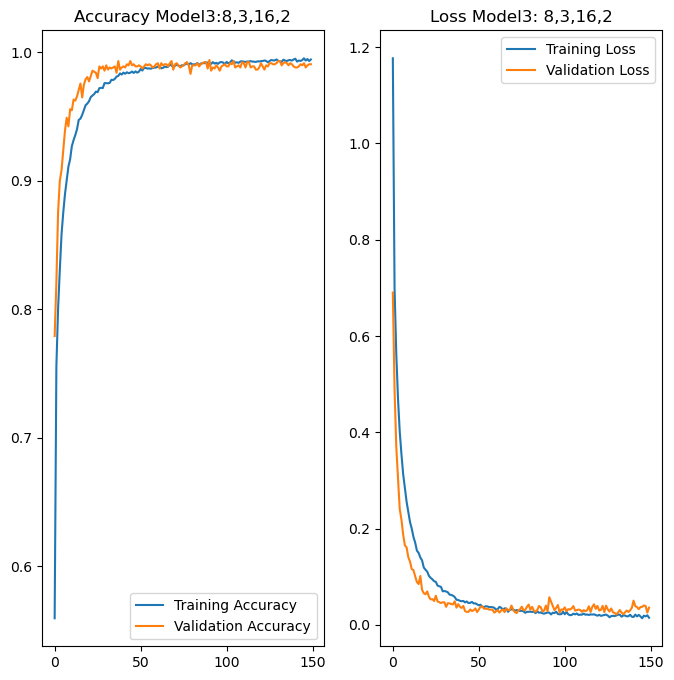

Epoch 1/150
197/197 [==============================] - 1s 3ms/step - loss: 1.2283 - accuracy: 0.5463 - val_loss: 0.7821 - val_accuracy: 0.7425
Epoch 2/150
197/197 [==============================] - 0s 3ms/step - loss: 0.7990 - accuracy: 0.7177 - val_loss: 0.5545 - val_accuracy: 0.8108
Epoch 3/150
197/197 [==============================] - 1s 3ms/step - loss: 0.6532 - accuracy: 0.7708 - val_loss: 0.4398 - val_accuracy: 0.8517
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.5500 - accuracy: 0.8082 - val_loss: 0.3707 - val_accuracy: 0.8725
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4767 - accuracy: 0.8342 - val_loss: 0.3219 - val_accuracy: 0.8875
Epoch 6/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4263 - accuracy: 0.8520 - val_loss: 0.2706 - val_accuracy: 0.9058
Epoch 7/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3854 - accuracy: 0.8675 - val_loss: 0.2296 - val_accuracy: 0.9217

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0707 - accuracy: 0.9739 - val_loss: 0.0419 - val_accuracy: 0.9883
Epoch 59/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0692 - accuracy: 0.9754 - val_loss: 0.0521 - val_accuracy: 0.9842
Epoch 60/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0656 - accuracy: 0.9762 - val_loss: 0.0433 - val_accuracy: 0.9825
Epoch 61/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0692 - accuracy: 0.9761 - val_loss: 0.0383 - val_accuracy: 0.9892
Epoch 62/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0712 - accuracy: 0.9743 - val_loss: 0.0419 - val_accuracy: 0.9867
Epoch 63/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0684 - accuracy: 0.9764 - val_loss: 0.0415 - val_accuracy: 0.9858
Epoch 64/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0636 - accuracy: 0.9790 - val_loss: 0.0463 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0421 - accuracy: 0.9857 - val_loss: 0.0325 - val_accuracy: 0.9900
Epoch 116/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0381 - accuracy: 0.9876 - val_loss: 0.0327 - val_accuracy: 0.9892
Epoch 117/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0440 - accuracy: 0.9853 - val_loss: 0.0335 - val_accuracy: 0.9900
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9858 - val_loss: 0.0393 - val_accuracy: 0.9883
Epoch 119/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0410 - accuracy: 0.9862 - val_loss: 0.0409 - val_accuracy: 0.9892
Epoch 120/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0413 - accuracy: 0.9867 - val_loss: 0.0317 - val_accuracy: 0.9892
Epoch 121/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0425 - accuracy: 0.9862 - val_loss: 0.0371 - val_ac

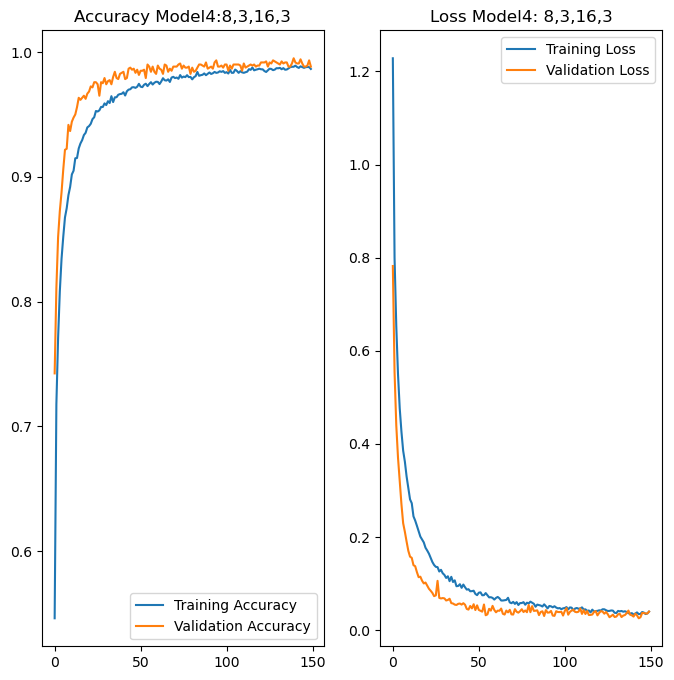

Epoch 1/150
197/197 [==============================] - 1s 3ms/step - loss: 1.3469 - accuracy: 0.5009 - val_loss: 0.9182 - val_accuracy: 0.7067
Epoch 2/150
197/197 [==============================] - 0s 2ms/step - loss: 0.9540 - accuracy: 0.6631 - val_loss: 0.6977 - val_accuracy: 0.7750
Epoch 3/150
197/197 [==============================] - 0s 2ms/step - loss: 0.8052 - accuracy: 0.7126 - val_loss: 0.6045 - val_accuracy: 0.7892
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.7088 - accuracy: 0.7480 - val_loss: 0.4672 - val_accuracy: 0.8525
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.6308 - accuracy: 0.7755 - val_loss: 0.4257 - val_accuracy: 0.8550
Epoch 6/150
197/197 [==============================] - 0s 2ms/step - loss: 0.5800 - accuracy: 0.7957 - val_loss: 0.3946 - val_accuracy: 0.8775
Epoch 7/150
197/197 [==============================] - 0s 2ms/step - loss: 0.5256 - accuracy: 0.8153 - val_loss: 0.3332 - val_accuracy: 0.8842

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1781 - accuracy: 0.9373 - val_loss: 0.0825 - val_accuracy: 0.9733
Epoch 59/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1765 - accuracy: 0.9377 - val_loss: 0.0856 - val_accuracy: 0.9742
Epoch 60/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1744 - accuracy: 0.9389 - val_loss: 0.0857 - val_accuracy: 0.9717
Epoch 61/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1676 - accuracy: 0.9401 - val_loss: 0.0796 - val_accuracy: 0.9758
Epoch 62/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1713 - accuracy: 0.9395 - val_loss: 0.0811 - val_accuracy: 0.9742
Epoch 63/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1645 - accuracy: 0.9416 - val_loss: 0.0882 - val_accuracy: 0.9658
Epoch 64/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1731 - accuracy: 0.9388 - val_loss: 0.0748 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1287 - accuracy: 0.9548 - val_loss: 0.0667 - val_accuracy: 0.9758
Epoch 116/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1281 - accuracy: 0.9542 - val_loss: 0.0648 - val_accuracy: 0.9808
Epoch 117/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1261 - accuracy: 0.9548 - val_loss: 0.0612 - val_accuracy: 0.9792
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1380 - accuracy: 0.9528 - val_loss: 0.0660 - val_accuracy: 0.9767
Epoch 119/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1249 - accuracy: 0.9566 - val_loss: 0.0563 - val_accuracy: 0.9808
Epoch 120/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1228 - accuracy: 0.9567 - val_loss: 0.0625 - val_accuracy: 0.9775
Epoch 121/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1320 - accuracy: 0.9545 - val_loss: 0.0688 - val_ac

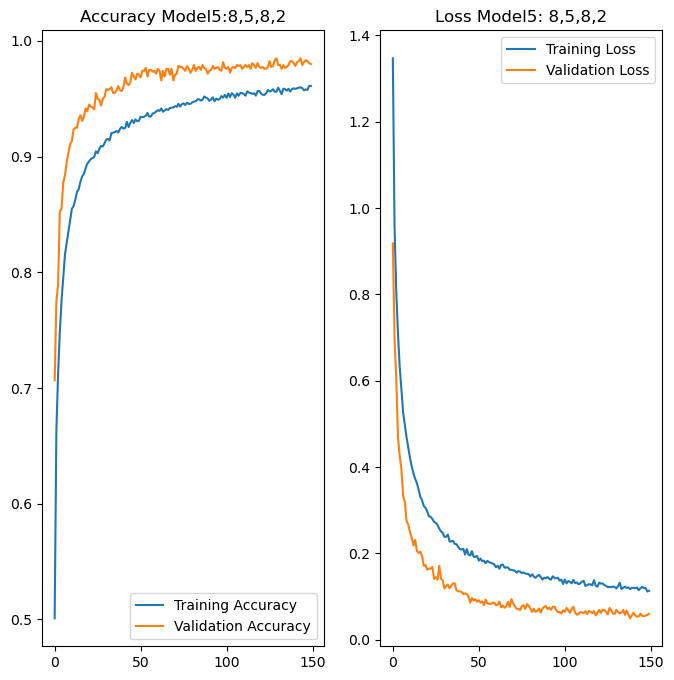

Epoch 1/150
197/197 [==============================] - 1s 3ms/step - loss: 1.3521 - accuracy: 0.4902 - val_loss: 0.9078 - val_accuracy: 0.6942
Epoch 2/150
197/197 [==============================] - 0s 2ms/step - loss: 0.9284 - accuracy: 0.6694 - val_loss: 0.7044 - val_accuracy: 0.7500
Epoch 3/150
197/197 [==============================] - 0s 2ms/step - loss: 0.7771 - accuracy: 0.7233 - val_loss: 0.5867 - val_accuracy: 0.8000
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.7646 - val_loss: 0.4628 - val_accuracy: 0.8433
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.5995 - accuracy: 0.7911 - val_loss: 0.3981 - val_accuracy: 0.8650
Epoch 6/150
197/197 [==============================] - 0s 2ms/step - loss: 0.5497 - accuracy: 0.8079 - val_loss: 0.3793 - val_accuracy: 0.8683
Epoch 7/150
197/197 [==============================] - 0s 2ms/step - loss: 0.5049 - accuracy: 0.8257 - val_loss: 0.3264 - val_accuracy: 0.8958

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1688 - accuracy: 0.9399 - val_loss: 0.0817 - val_accuracy: 0.9775
Epoch 59/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1629 - accuracy: 0.9420 - val_loss: 0.0839 - val_accuracy: 0.9775
Epoch 60/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1604 - accuracy: 0.9425 - val_loss: 0.0750 - val_accuracy: 0.9792
Epoch 61/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9443 - val_loss: 0.0698 - val_accuracy: 0.9792
Epoch 62/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1633 - accuracy: 0.9421 - val_loss: 0.0855 - val_accuracy: 0.9700
Epoch 63/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9433 - val_loss: 0.0804 - val_accuracy: 0.9725
Epoch 64/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1651 - accuracy: 0.9409 - val_loss: 0.0882 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1113 - accuracy: 0.9627 - val_loss: 0.0507 - val_accuracy: 0.9883
Epoch 116/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1149 - accuracy: 0.9594 - val_loss: 0.0615 - val_accuracy: 0.9817
Epoch 117/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1183 - accuracy: 0.9599 - val_loss: 0.0600 - val_accuracy: 0.9842
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1116 - accuracy: 0.9612 - val_loss: 0.0636 - val_accuracy: 0.9817
Epoch 119/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1250 - accuracy: 0.9559 - val_loss: 0.0527 - val_accuracy: 0.9808
Epoch 120/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1153 - accuracy: 0.9603 - val_loss: 0.0489 - val_accuracy: 0.9883
Epoch 121/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1162 - accuracy: 0.9598 - val_loss: 0.0516 - val_ac

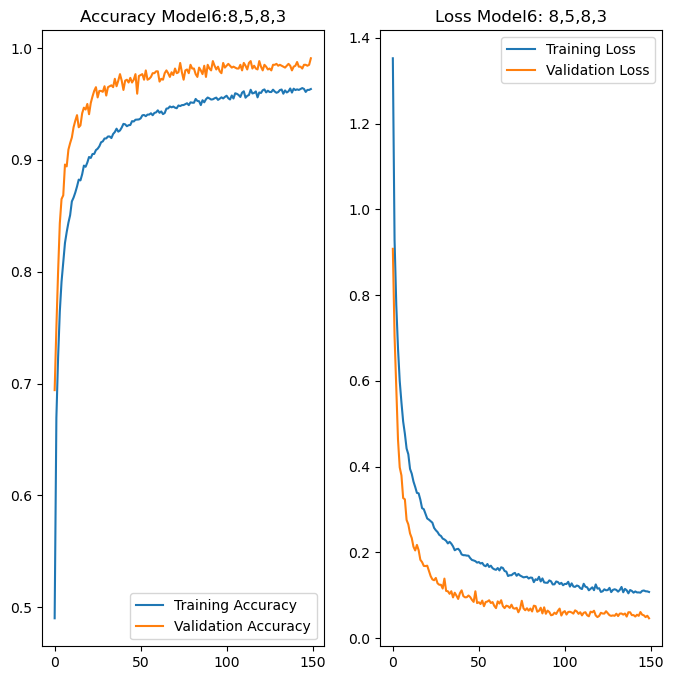

Epoch 1/150
197/197 [==============================] - 1s 3ms/step - loss: 1.2563 - accuracy: 0.5270 - val_loss: 0.8044 - val_accuracy: 0.7392
Epoch 2/150
197/197 [==============================] - 0s 2ms/step - loss: 0.8102 - accuracy: 0.7161 - val_loss: 0.5645 - val_accuracy: 0.8233
Epoch 3/150
197/197 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.7670 - val_loss: 0.4636 - val_accuracy: 0.8458
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.5656 - accuracy: 0.8013 - val_loss: 0.3700 - val_accuracy: 0.8758
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.5160 - accuracy: 0.8210 - val_loss: 0.3406 - val_accuracy: 0.8867
Epoch 6/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.8394 - val_loss: 0.3094 - val_accuracy: 0.8967
Epoch 7/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4345 - accuracy: 0.8512 - val_loss: 0.2696 - val_accuracy: 0.9083

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0848 - accuracy: 0.9703 - val_loss: 0.0632 - val_accuracy: 0.9758
Epoch 59/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0792 - accuracy: 0.9721 - val_loss: 0.0535 - val_accuracy: 0.9833
Epoch 60/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0762 - accuracy: 0.9727 - val_loss: 0.0669 - val_accuracy: 0.9783
Epoch 61/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0855 - accuracy: 0.9702 - val_loss: 0.0577 - val_accuracy: 0.9800
Epoch 62/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0767 - accuracy: 0.9738 - val_loss: 0.0545 - val_accuracy: 0.9800
Epoch 63/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0819 - accuracy: 0.9713 - val_loss: 0.0506 - val_accuracy: 0.9800
Epoch 64/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0770 - accuracy: 0.9726 - val_loss: 0.0589 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0578 - accuracy: 0.9800 - val_loss: 0.0596 - val_accuracy: 0.9808
Epoch 116/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0551 - accuracy: 0.9808 - val_loss: 0.0460 - val_accuracy: 0.9825
Epoch 117/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0490 - accuracy: 0.9838 - val_loss: 0.0359 - val_accuracy: 0.9858
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0527 - accuracy: 0.9815 - val_loss: 0.0482 - val_accuracy: 0.9842
Epoch 119/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0485 - accuracy: 0.9842 - val_loss: 0.0405 - val_accuracy: 0.9867
Epoch 120/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0488 - accuracy: 0.9838 - val_loss: 0.0406 - val_accuracy: 0.9850
Epoch 121/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0483 - accuracy: 0.9843 - val_loss: 0.0406 - val_ac

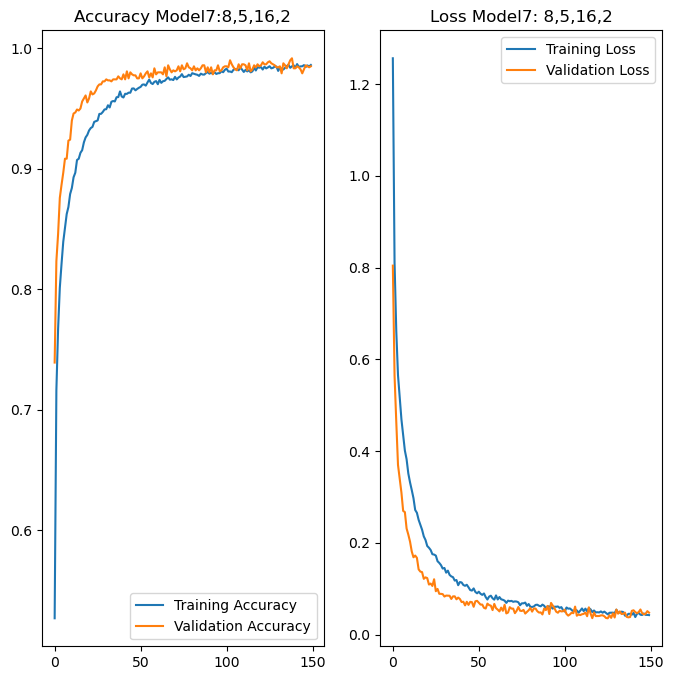

Epoch 1/150
197/197 [==============================] - 1s 3ms/step - loss: 1.2369 - accuracy: 0.5343 - val_loss: 0.7538 - val_accuracy: 0.7458
Epoch 2/150
197/197 [==============================] - 0s 2ms/step - loss: 0.7707 - accuracy: 0.7292 - val_loss: 0.5394 - val_accuracy: 0.8225
Epoch 3/150
197/197 [==============================] - 0s 2ms/step - loss: 0.6076 - accuracy: 0.7829 - val_loss: 0.4257 - val_accuracy: 0.8608
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.5082 - accuracy: 0.8228 - val_loss: 0.3376 - val_accuracy: 0.8817
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4434 - accuracy: 0.8461 - val_loss: 0.2920 - val_accuracy: 0.9067
Epoch 6/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3986 - accuracy: 0.8618 - val_loss: 0.2713 - val_accuracy: 0.9125
Epoch 7/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3640 - accuracy: 0.8728 - val_loss: 0.2175 - val_accuracy: 0.9258

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0633 - accuracy: 0.9779 - val_loss: 0.0414 - val_accuracy: 0.9867
Epoch 59/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0631 - accuracy: 0.9774 - val_loss: 0.0372 - val_accuracy: 0.9867
Epoch 60/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0662 - accuracy: 0.9784 - val_loss: 0.0391 - val_accuracy: 0.9883
Epoch 61/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0626 - accuracy: 0.9786 - val_loss: 0.0422 - val_accuracy: 0.9867
Epoch 62/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0601 - accuracy: 0.9791 - val_loss: 0.0378 - val_accuracy: 0.9867
Epoch 63/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0577 - accuracy: 0.9798 - val_loss: 0.0436 - val_accuracy: 0.9825
Epoch 64/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0570 - accuracy: 0.9812 - val_loss: 0.0360 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0397 - accuracy: 0.9862 - val_loss: 0.0312 - val_accuracy: 0.9908
Epoch 116/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0349 - accuracy: 0.9874 - val_loss: 0.0329 - val_accuracy: 0.9858
Epoch 117/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0388 - accuracy: 0.9868 - val_loss: 0.0304 - val_accuracy: 0.9883
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0347 - accuracy: 0.9878 - val_loss: 0.0312 - val_accuracy: 0.9892
Epoch 119/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0357 - accuracy: 0.9876 - val_loss: 0.0441 - val_accuracy: 0.9858
Epoch 120/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0376 - accuracy: 0.9867 - val_loss: 0.0372 - val_accuracy: 0.9850
Epoch 121/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0376 - accuracy: 0.9873 - val_loss: 0.0372 - val_ac

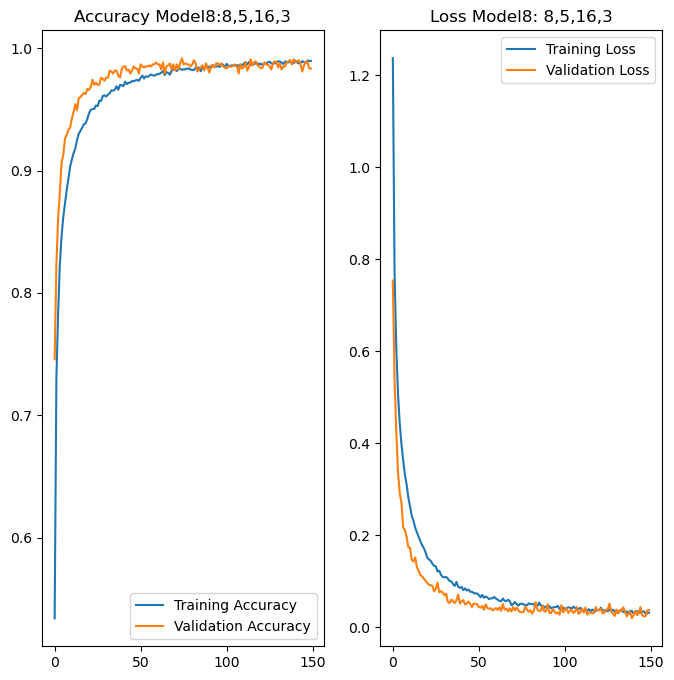

Epoch 1/150
197/197 [==============================] - 1s 3ms/step - loss: 1.2865 - accuracy: 0.5210 - val_loss: 0.8301 - val_accuracy: 0.7400
Epoch 2/150
197/197 [==============================] - 0s 2ms/step - loss: 0.8953 - accuracy: 0.6811 - val_loss: 0.6970 - val_accuracy: 0.7567
Epoch 3/150
197/197 [==============================] - 0s 2ms/step - loss: 0.7913 - accuracy: 0.7203 - val_loss: 0.5848 - val_accuracy: 0.8008
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.7256 - accuracy: 0.7420 - val_loss: 0.5050 - val_accuracy: 0.8458
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.7621 - val_loss: 0.4617 - val_accuracy: 0.8492
Epoch 6/150
197/197 [==============================] - 0s 2ms/step - loss: 0.6135 - accuracy: 0.7821 - val_loss: 0.4045 - val_accuracy: 0.8742
Epoch 7/150
197/197 [==============================] - 0s 2ms/step - loss: 0.5672 - accuracy: 0.8000 - val_loss: 0.3798 - val_accuracy: 0.8867

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1901 - accuracy: 0.9333 - val_loss: 0.0842 - val_accuracy: 0.9717
Epoch 59/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1878 - accuracy: 0.9345 - val_loss: 0.0822 - val_accuracy: 0.9750
Epoch 60/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1895 - accuracy: 0.9330 - val_loss: 0.0909 - val_accuracy: 0.9750
Epoch 61/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1879 - accuracy: 0.9349 - val_loss: 0.0808 - val_accuracy: 0.9750
Epoch 62/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1791 - accuracy: 0.9373 - val_loss: 0.0843 - val_accuracy: 0.9767
Epoch 63/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1856 - accuracy: 0.9346 - val_loss: 0.0768 - val_accuracy: 0.9725
Epoch 64/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1785 - accuracy: 0.9373 - val_loss: 0.0780 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1384 - accuracy: 0.9520 - val_loss: 0.0642 - val_accuracy: 0.9783
Epoch 116/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1419 - accuracy: 0.9500 - val_loss: 0.0667 - val_accuracy: 0.9808
Epoch 117/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1361 - accuracy: 0.9515 - val_loss: 0.0599 - val_accuracy: 0.9792
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1394 - accuracy: 0.9518 - val_loss: 0.0624 - val_accuracy: 0.9800
Epoch 119/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1452 - accuracy: 0.9496 - val_loss: 0.0642 - val_accuracy: 0.9767
Epoch 120/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1283 - accuracy: 0.9554 - val_loss: 0.0579 - val_accuracy: 0.9800
Epoch 121/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1389 - accuracy: 0.9511 - val_loss: 0.0632 - val_ac

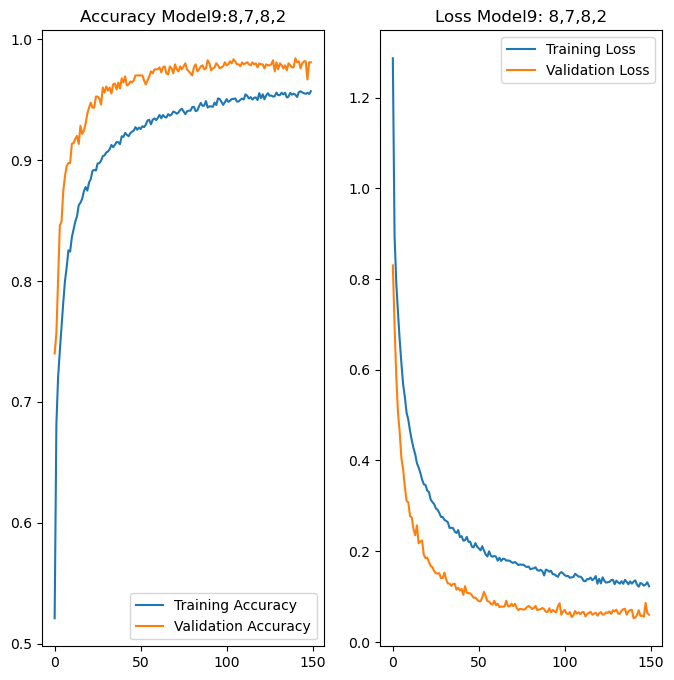

Epoch 1/150
197/197 [==============================] - 1s 3ms/step - loss: 1.4697 - accuracy: 0.4212 - val_loss: 1.1022 - val_accuracy: 0.6583
Epoch 2/150
197/197 [==============================] - 0s 2ms/step - loss: 1.1028 - accuracy: 0.5998 - val_loss: 0.8585 - val_accuracy: 0.7267
Epoch 3/150
197/197 [==============================] - 0s 2ms/step - loss: 0.9456 - accuracy: 0.6581 - val_loss: 0.6963 - val_accuracy: 0.7617
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.8391 - accuracy: 0.7023 - val_loss: 0.6278 - val_accuracy: 0.7783
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.7643 - accuracy: 0.7288 - val_loss: 0.5527 - val_accuracy: 0.8033
Epoch 6/150
197/197 [==============================] - 0s 2ms/step - loss: 0.7126 - accuracy: 0.7490 - val_loss: 0.5412 - val_accuracy: 0.8142
Epoch 7/150
197/197 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.7577 - val_loss: 0.4521 - val_accuracy: 0.8542

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3239 - accuracy: 0.8835 - val_loss: 0.1642 - val_accuracy: 0.9467
Epoch 59/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3224 - accuracy: 0.8848 - val_loss: 0.1630 - val_accuracy: 0.9492
Epoch 60/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3202 - accuracy: 0.8853 - val_loss: 0.1547 - val_accuracy: 0.9558
Epoch 61/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3103 - accuracy: 0.8894 - val_loss: 0.1645 - val_accuracy: 0.9500
Epoch 62/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3170 - accuracy: 0.8866 - val_loss: 0.1650 - val_accuracy: 0.9467
Epoch 63/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3173 - accuracy: 0.8855 - val_loss: 0.1579 - val_accuracy: 0.9492
Epoch 64/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3166 - accuracy: 0.8870 - val_loss: 0.1709 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 2ms/step - loss: 0.2632 - accuracy: 0.9058 - val_loss: 0.1576 - val_accuracy: 0.9483
Epoch 116/150
197/197 [==============================] - 0s 2ms/step - loss: 0.2589 - accuracy: 0.9058 - val_loss: 0.1402 - val_accuracy: 0.9533
Epoch 117/150
197/197 [==============================] - 0s 2ms/step - loss: 0.2586 - accuracy: 0.9065 - val_loss: 0.1581 - val_accuracy: 0.9492
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.2574 - accuracy: 0.9091 - val_loss: 0.1343 - val_accuracy: 0.9583
Epoch 119/150
197/197 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9116 - val_loss: 0.1314 - val_accuracy: 0.9600
Epoch 120/150
197/197 [==============================] - 0s 2ms/step - loss: 0.2476 - accuracy: 0.9142 - val_loss: 0.1586 - val_accuracy: 0.9442
Epoch 121/150
197/197 [==============================] - 0s 2ms/step - loss: 0.2557 - accuracy: 0.9084 - val_loss: 0.1430 - val_ac

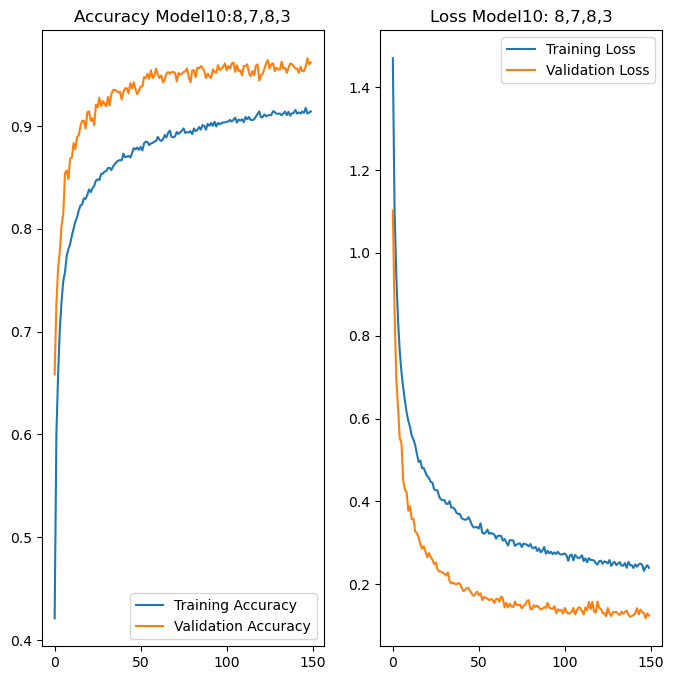

Epoch 1/150
197/197 [==============================] - 1s 3ms/step - loss: 1.2099 - accuracy: 0.5517 - val_loss: 0.7757 - val_accuracy: 0.7442
Epoch 2/150
197/197 [==============================] - 0s 2ms/step - loss: 0.8025 - accuracy: 0.7149 - val_loss: 0.5785 - val_accuracy: 0.8075
Epoch 3/150
197/197 [==============================] - 0s 2ms/step - loss: 0.6680 - accuracy: 0.7624 - val_loss: 0.4745 - val_accuracy: 0.8542
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.5812 - accuracy: 0.7975 - val_loss: 0.3988 - val_accuracy: 0.8667
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.5100 - accuracy: 0.8248 - val_loss: 0.3457 - val_accuracy: 0.8925
Epoch 6/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4532 - accuracy: 0.8443 - val_loss: 0.2768 - val_accuracy: 0.9108
Epoch 7/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.8611 - val_loss: 0.2586 - val_accuracy: 0.9217

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0817 - accuracy: 0.9716 - val_loss: 0.0498 - val_accuracy: 0.9850
Epoch 59/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0686 - accuracy: 0.9766 - val_loss: 0.0455 - val_accuracy: 0.9833
Epoch 60/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0717 - accuracy: 0.9762 - val_loss: 0.0435 - val_accuracy: 0.9867
Epoch 61/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0718 - accuracy: 0.9758 - val_loss: 0.0482 - val_accuracy: 0.9833
Epoch 62/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0709 - accuracy: 0.9753 - val_loss: 0.0504 - val_accuracy: 0.9817
Epoch 63/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0748 - accuracy: 0.9744 - val_loss: 0.0596 - val_accuracy: 0.9825
Epoch 64/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0712 - accuracy: 0.9753 - val_loss: 0.0466 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9824 - val_loss: 0.0333 - val_accuracy: 0.9883
Epoch 116/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0487 - accuracy: 0.9830 - val_loss: 0.0457 - val_accuracy: 0.9867
Epoch 117/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0466 - accuracy: 0.9834 - val_loss: 0.0346 - val_accuracy: 0.9883
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0454 - accuracy: 0.9848 - val_loss: 0.0373 - val_accuracy: 0.9858
Epoch 119/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0438 - accuracy: 0.9848 - val_loss: 0.0377 - val_accuracy: 0.9867
Epoch 120/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0408 - accuracy: 0.9862 - val_loss: 0.0329 - val_accuracy: 0.9900
Epoch 121/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0451 - accuracy: 0.9850 - val_loss: 0.0421 - val_ac

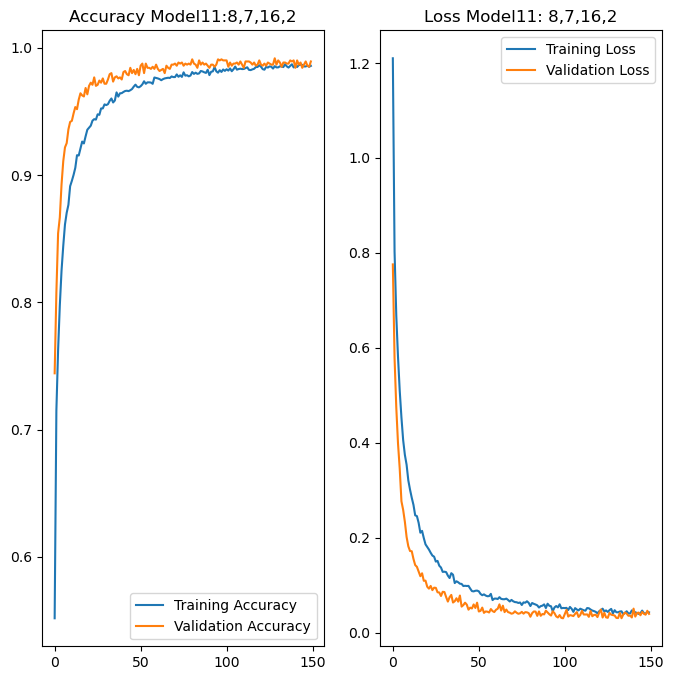

Epoch 1/150
197/197 [==============================] - 1s 3ms/step - loss: 1.3225 - accuracy: 0.5086 - val_loss: 0.8995 - val_accuracy: 0.7092
Epoch 2/150
197/197 [==============================] - 0s 2ms/step - loss: 0.9285 - accuracy: 0.6674 - val_loss: 0.7118 - val_accuracy: 0.7625
Epoch 3/150
197/197 [==============================] - 0s 2ms/step - loss: 0.7713 - accuracy: 0.7252 - val_loss: 0.5956 - val_accuracy: 0.7875
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.7598 - val_loss: 0.4930 - val_accuracy: 0.8233
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.5981 - accuracy: 0.7889 - val_loss: 0.4283 - val_accuracy: 0.8358
Epoch 6/150
197/197 [==============================] - 0s 2ms/step - loss: 0.5502 - accuracy: 0.8044 - val_loss: 0.3844 - val_accuracy: 0.8642
Epoch 7/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4977 - accuracy: 0.8251 - val_loss: 0.3437 - val_accuracy: 0.8758

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1482 - accuracy: 0.9463 - val_loss: 0.0838 - val_accuracy: 0.9717
Epoch 59/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1503 - accuracy: 0.9471 - val_loss: 0.1099 - val_accuracy: 0.9608
Epoch 60/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1512 - accuracy: 0.9477 - val_loss: 0.0959 - val_accuracy: 0.9667
Epoch 61/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1466 - accuracy: 0.9491 - val_loss: 0.0827 - val_accuracy: 0.9708
Epoch 62/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1446 - accuracy: 0.9485 - val_loss: 0.0867 - val_accuracy: 0.9675
Epoch 63/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1469 - accuracy: 0.9488 - val_loss: 0.0858 - val_accuracy: 0.9675
Epoch 64/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1420 - accuracy: 0.9521 - val_loss: 0.0822 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1040 - accuracy: 0.9645 - val_loss: 0.0633 - val_accuracy: 0.9750
Epoch 116/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1118 - accuracy: 0.9610 - val_loss: 0.0760 - val_accuracy: 0.9700
Epoch 117/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1025 - accuracy: 0.9641 - val_loss: 0.0711 - val_accuracy: 0.9733
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1020 - accuracy: 0.9637 - val_loss: 0.0608 - val_accuracy: 0.9775
Epoch 119/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1045 - accuracy: 0.9635 - val_loss: 0.0617 - val_accuracy: 0.9783
Epoch 120/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0973 - accuracy: 0.9647 - val_loss: 0.0588 - val_accuracy: 0.9758
Epoch 121/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1101 - accuracy: 0.9621 - val_loss: 0.0633 - val_ac

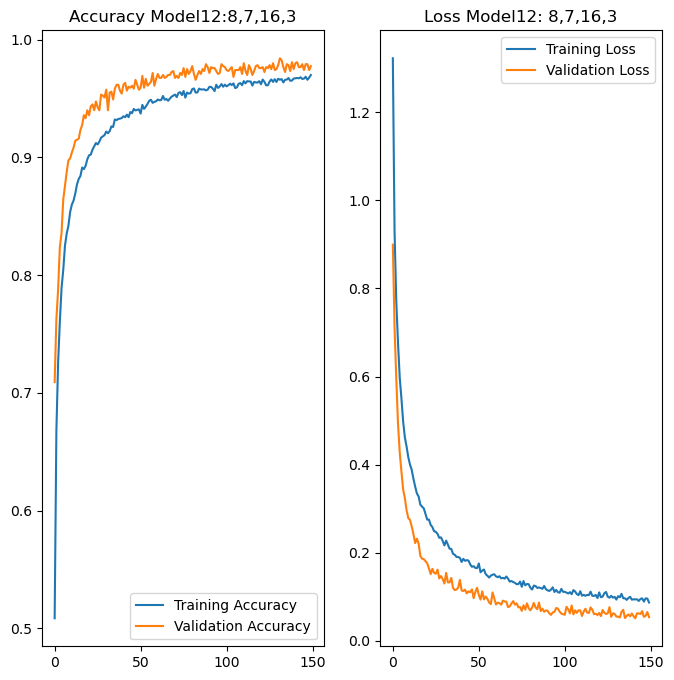

Epoch 1/150
197/197 [==============================] - 1s 3ms/step - loss: 1.1293 - accuracy: 0.5833 - val_loss: 0.6526 - val_accuracy: 0.7933
Epoch 2/150
197/197 [==============================] - 0s 2ms/step - loss: 0.6540 - accuracy: 0.7735 - val_loss: 0.4489 - val_accuracy: 0.8542
Epoch 3/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4996 - accuracy: 0.8251 - val_loss: 0.3327 - val_accuracy: 0.8867
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4195 - accuracy: 0.8547 - val_loss: 0.2645 - val_accuracy: 0.9008
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3594 - accuracy: 0.8747 - val_loss: 0.2029 - val_accuracy: 0.9358
Epoch 6/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3101 - accuracy: 0.8945 - val_loss: 0.1814 - val_accuracy: 0.9300
Epoch 7/150
197/197 [==============================] - 0s 2ms/step - loss: 0.2782 - accuracy: 0.9047 - val_loss: 0.1559 - val_accuracy: 0.9483

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0304 - accuracy: 0.9898 - val_loss: 0.0238 - val_accuracy: 0.9892
Epoch 59/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0339 - accuracy: 0.9887 - val_loss: 0.0174 - val_accuracy: 0.9950
Epoch 60/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0314 - accuracy: 0.9901 - val_loss: 0.0240 - val_accuracy: 0.9908
Epoch 61/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0279 - accuracy: 0.9905 - val_loss: 0.0329 - val_accuracy: 0.9892
Epoch 62/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 0.9882 - val_loss: 0.0379 - val_accuracy: 0.9875
Epoch 63/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0322 - accuracy: 0.9893 - val_loss: 0.0259 - val_accuracy: 0.9900
Epoch 64/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0279 - accuracy: 0.9909 - val_loss: 0.0305 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0214 - accuracy: 0.9931 - val_loss: 0.0230 - val_accuracy: 0.9908
Epoch 116/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0202 - accuracy: 0.9931 - val_loss: 0.0214 - val_accuracy: 0.9917
Epoch 117/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 0.9943 - val_loss: 0.0308 - val_accuracy: 0.9917
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0167 - accuracy: 0.9944 - val_loss: 0.0378 - val_accuracy: 0.9858
Epoch 119/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0160 - accuracy: 0.9948 - val_loss: 0.0298 - val_accuracy: 0.9917
Epoch 120/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0149 - accuracy: 0.9950 - val_loss: 0.0327 - val_accuracy: 0.9908
Epoch 121/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 0.9933 - val_loss: 0.0291 - val_ac

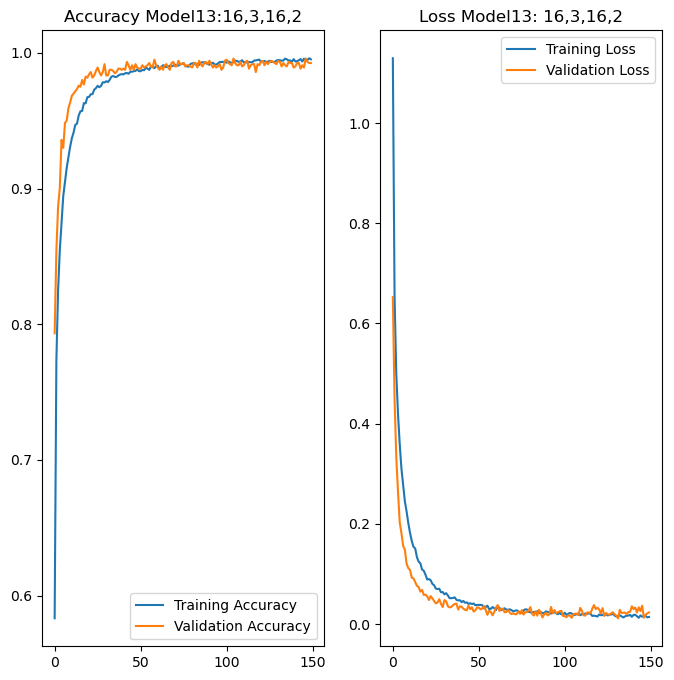

Epoch 1/150
197/197 [==============================] - 1s 3ms/step - loss: 1.2290 - accuracy: 0.5379 - val_loss: 0.7896 - val_accuracy: 0.7367
Epoch 2/150
197/197 [==============================] - 0s 2ms/step - loss: 0.7543 - accuracy: 0.7312 - val_loss: 0.5144 - val_accuracy: 0.8300
Epoch 3/150
197/197 [==============================] - 0s 2ms/step - loss: 0.6076 - accuracy: 0.7854 - val_loss: 0.3971 - val_accuracy: 0.8633
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4959 - accuracy: 0.8266 - val_loss: 0.3322 - val_accuracy: 0.8833
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.8486 - val_loss: 0.2877 - val_accuracy: 0.9042
Epoch 6/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3886 - accuracy: 0.8622 - val_loss: 0.2351 - val_accuracy: 0.9225
Epoch 7/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3420 - accuracy: 0.8813 - val_loss: 0.2138 - val_accuracy: 0.9233

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0581 - accuracy: 0.9793 - val_loss: 0.0366 - val_accuracy: 0.9883
Epoch 59/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0566 - accuracy: 0.9803 - val_loss: 0.0366 - val_accuracy: 0.9883
Epoch 60/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0556 - accuracy: 0.9812 - val_loss: 0.0371 - val_accuracy: 0.9900
Epoch 61/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0564 - accuracy: 0.9804 - val_loss: 0.0382 - val_accuracy: 0.9883
Epoch 62/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0570 - accuracy: 0.9801 - val_loss: 0.0376 - val_accuracy: 0.9892
Epoch 63/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0526 - accuracy: 0.9814 - val_loss: 0.0390 - val_accuracy: 0.9892
Epoch 64/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0571 - accuracy: 0.9815 - val_loss: 0.0422 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0387 - accuracy: 0.9870 - val_loss: 0.0296 - val_accuracy: 0.9908
Epoch 116/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0354 - accuracy: 0.9889 - val_loss: 0.0350 - val_accuracy: 0.9883
Epoch 117/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0369 - accuracy: 0.9875 - val_loss: 0.0322 - val_accuracy: 0.9908
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0387 - accuracy: 0.9865 - val_loss: 0.0395 - val_accuracy: 0.9875
Epoch 119/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0380 - accuracy: 0.9864 - val_loss: 0.0413 - val_accuracy: 0.9867
Epoch 120/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0352 - accuracy: 0.9883 - val_loss: 0.0354 - val_accuracy: 0.9867
Epoch 121/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0332 - accuracy: 0.9889 - val_loss: 0.0308 - val_ac

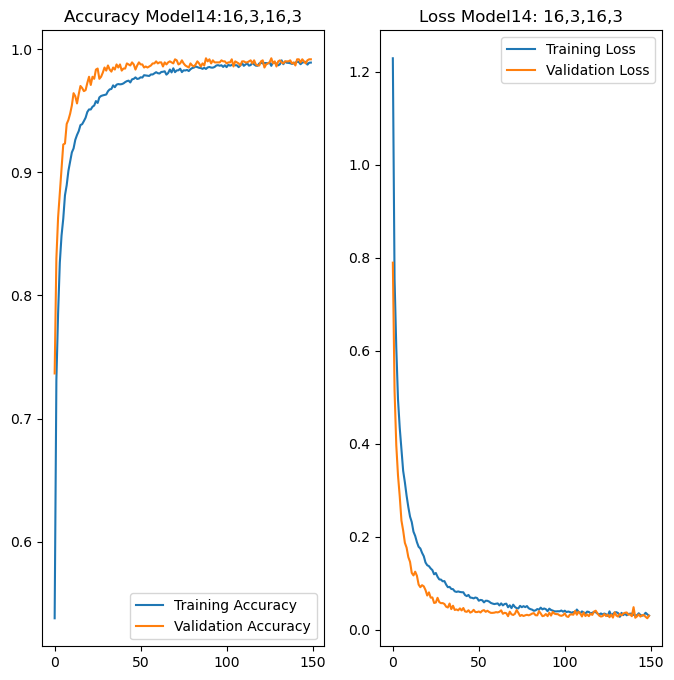

Epoch 1/150
197/197 [==============================] - 1s 3ms/step - loss: 0.9691 - accuracy: 0.6503 - val_loss: 0.5508 - val_accuracy: 0.8108
Epoch 2/150
197/197 [==============================] - 0s 2ms/step - loss: 0.5389 - accuracy: 0.8067 - val_loss: 0.3373 - val_accuracy: 0.8942
Epoch 3/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4016 - accuracy: 0.8582 - val_loss: 0.2490 - val_accuracy: 0.9142
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3219 - accuracy: 0.8860 - val_loss: 0.2060 - val_accuracy: 0.9242
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.2708 - accuracy: 0.9066 - val_loss: 0.1605 - val_accuracy: 0.9425
Epoch 6/150
197/197 [==============================] - 0s 2ms/step - loss: 0.2337 - accuracy: 0.9173 - val_loss: 0.1522 - val_accuracy: 0.9508
Epoch 7/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1978 - accuracy: 0.9329 - val_loss: 0.1304 - val_accuracy: 0.9575

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0142 - accuracy: 0.9958 - val_loss: 0.0315 - val_accuracy: 0.9917
Epoch 59/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0137 - accuracy: 0.9956 - val_loss: 0.0326 - val_accuracy: 0.9925
Epoch 60/150
197/197 [==============================] - 0s 3ms/step - loss: 0.0121 - accuracy: 0.9960 - val_loss: 0.0344 - val_accuracy: 0.9925
Epoch 61/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 0.9955 - val_loss: 0.0335 - val_accuracy: 0.9883
Epoch 62/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0119 - accuracy: 0.9957 - val_loss: 0.0307 - val_accuracy: 0.9933
Epoch 63/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0142 - accuracy: 0.9949 - val_loss: 0.0199 - val_accuracy: 0.9942
Epoch 64/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0121 - accuracy: 0.9960 - val_loss: 0.0388 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 0.9974 - val_loss: 0.0383 - val_accuracy: 0.9908
Epoch 116/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 0.9977 - val_loss: 0.0294 - val_accuracy: 0.9925
Epoch 117/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 0.9976 - val_loss: 0.0281 - val_accuracy: 0.9942
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 0.9979 - val_loss: 0.0362 - val_accuracy: 0.9900
Epoch 119/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 0.9977 - val_loss: 0.0327 - val_accuracy: 0.9917
Epoch 120/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0078 - accuracy: 0.9977 - val_loss: 0.0296 - val_accuracy: 0.9925
Epoch 121/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 0.0446 - val_ac

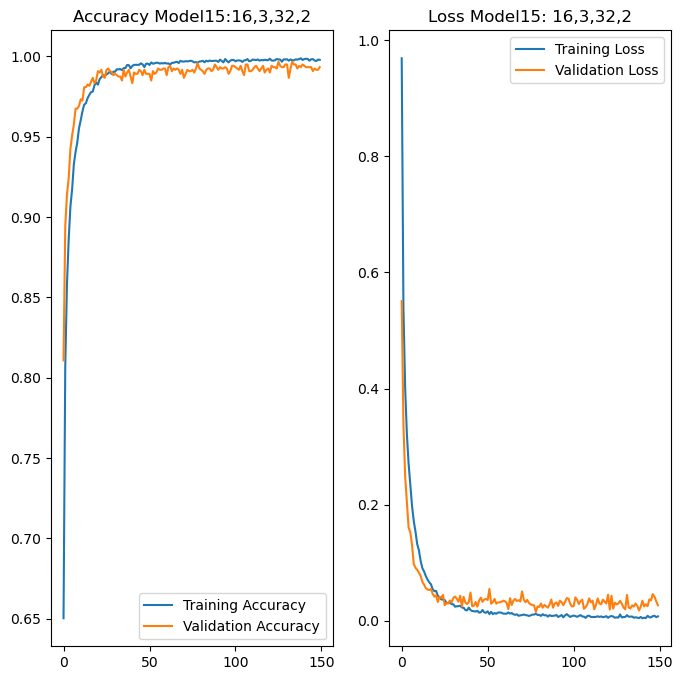

Epoch 1/150
197/197 [==============================] - 1s 3ms/step - loss: 1.0763 - accuracy: 0.6110 - val_loss: 0.6831 - val_accuracy: 0.7683
Epoch 2/150
197/197 [==============================] - 0s 2ms/step - loss: 0.6396 - accuracy: 0.7759 - val_loss: 0.4437 - val_accuracy: 0.8575
Epoch 3/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4938 - accuracy: 0.8260 - val_loss: 0.3594 - val_accuracy: 0.8783
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3994 - accuracy: 0.8619 - val_loss: 0.2632 - val_accuracy: 0.9100
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3377 - accuracy: 0.8837 - val_loss: 0.2405 - val_accuracy: 0.9200
Epoch 6/150
197/197 [==============================] - 0s 2ms/step - loss: 0.2956 - accuracy: 0.8991 - val_loss: 0.1895 - val_accuracy: 0.9342
Epoch 7/150
197/197 [==============================] - 0s 2ms/step - loss: 0.2535 - accuracy: 0.9119 - val_loss: 0.1624 - val_accuracy: 0.9500

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0202 - accuracy: 0.9928 - val_loss: 0.0205 - val_accuracy: 0.9933
Epoch 59/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0220 - accuracy: 0.9923 - val_loss: 0.0283 - val_accuracy: 0.9892
Epoch 60/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 0.9933 - val_loss: 0.0296 - val_accuracy: 0.9892
Epoch 61/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0211 - accuracy: 0.9930 - val_loss: 0.0208 - val_accuracy: 0.9950
Epoch 62/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0235 - accuracy: 0.9922 - val_loss: 0.0296 - val_accuracy: 0.9900
Epoch 63/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0230 - accuracy: 0.9921 - val_loss: 0.0303 - val_accuracy: 0.9867
Epoch 64/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0229 - accuracy: 0.9921 - val_loss: 0.0299 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0108 - accuracy: 0.9960 - val_loss: 0.0141 - val_accuracy: 0.9950
Epoch 116/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0135 - accuracy: 0.9952 - val_loss: 0.0210 - val_accuracy: 0.9942
Epoch 117/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0135 - accuracy: 0.9955 - val_loss: 0.0258 - val_accuracy: 0.9950
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 0.9949 - val_loss: 0.0153 - val_accuracy: 0.9950
Epoch 119/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0114 - accuracy: 0.9959 - val_loss: 0.0171 - val_accuracy: 0.9933
Epoch 120/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0140 - accuracy: 0.9954 - val_loss: 0.0291 - val_accuracy: 0.9900
Epoch 121/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0108 - accuracy: 0.9963 - val_loss: 0.0295 - val_ac

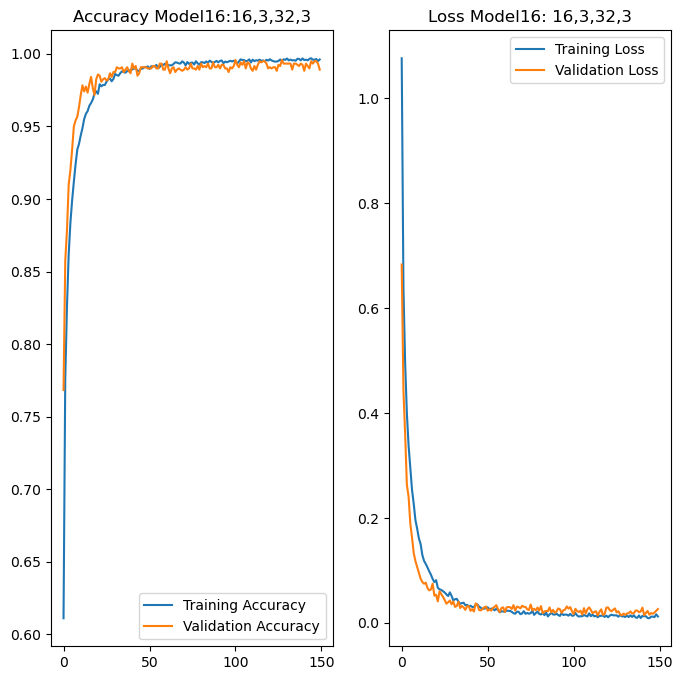

Epoch 1/150
197/197 [==============================] - 1s 3ms/step - loss: 1.2222 - accuracy: 0.5448 - val_loss: 0.7362 - val_accuracy: 0.7625
Epoch 2/150
197/197 [==============================] - 0s 2ms/step - loss: 0.7562 - accuracy: 0.7341 - val_loss: 0.5085 - val_accuracy: 0.8325
Epoch 3/150
197/197 [==============================] - 0s 2ms/step - loss: 0.6085 - accuracy: 0.7836 - val_loss: 0.3956 - val_accuracy: 0.8750
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.5168 - accuracy: 0.8229 - val_loss: 0.3528 - val_accuracy: 0.8758
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4458 - accuracy: 0.8453 - val_loss: 0.2825 - val_accuracy: 0.9067
Epoch 6/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3971 - accuracy: 0.8629 - val_loss: 0.2500 - val_accuracy: 0.9125
Epoch 7/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3647 - accuracy: 0.8758 - val_loss: 0.2184 - val_accuracy: 0.9250

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0645 - accuracy: 0.9774 - val_loss: 0.0325 - val_accuracy: 0.9900
Epoch 59/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0678 - accuracy: 0.9776 - val_loss: 0.0418 - val_accuracy: 0.9850
Epoch 60/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0616 - accuracy: 0.9785 - val_loss: 0.0267 - val_accuracy: 0.9917
Epoch 61/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0637 - accuracy: 0.9774 - val_loss: 0.0321 - val_accuracy: 0.9875
Epoch 62/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0601 - accuracy: 0.9794 - val_loss: 0.0352 - val_accuracy: 0.9892
Epoch 63/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0620 - accuracy: 0.9793 - val_loss: 0.0341 - val_accuracy: 0.9858
Epoch 64/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0609 - accuracy: 0.9793 - val_loss: 0.0302 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0383 - accuracy: 0.9863 - val_loss: 0.0209 - val_accuracy: 0.9942
Epoch 116/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0443 - accuracy: 0.9862 - val_loss: 0.0216 - val_accuracy: 0.9917
Epoch 117/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0380 - accuracy: 0.9876 - val_loss: 0.0206 - val_accuracy: 0.9908
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0378 - accuracy: 0.9874 - val_loss: 0.0188 - val_accuracy: 0.9925
Epoch 119/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0438 - accuracy: 0.9853 - val_loss: 0.0209 - val_accuracy: 0.9925
Epoch 120/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0401 - accuracy: 0.9866 - val_loss: 0.0185 - val_accuracy: 0.9933
Epoch 121/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0398 - accuracy: 0.9865 - val_loss: 0.0179 - val_ac

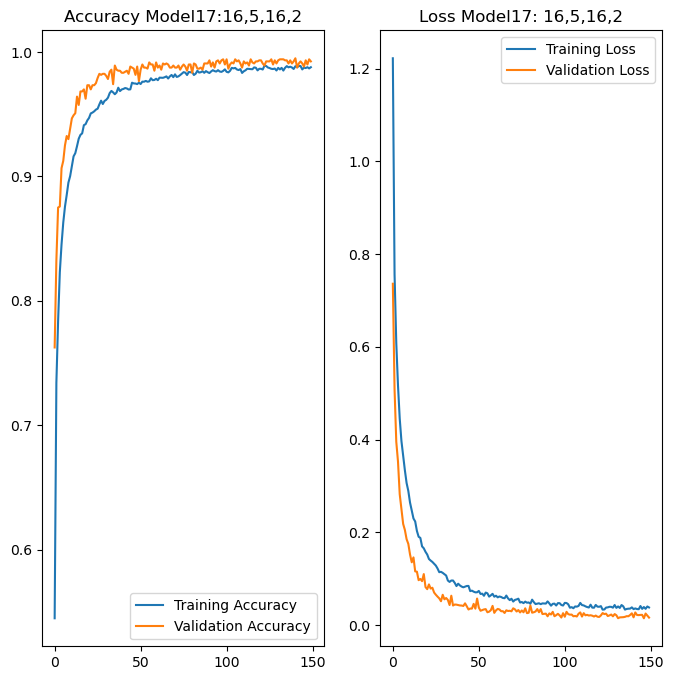

Epoch 1/150
197/197 [==============================] - 1s 3ms/step - loss: 1.1874 - accuracy: 0.5613 - val_loss: 0.7340 - val_accuracy: 0.7542
Epoch 2/150
197/197 [==============================] - 0s 2ms/step - loss: 0.7423 - accuracy: 0.7348 - val_loss: 0.5029 - val_accuracy: 0.8325
Epoch 3/150
197/197 [==============================] - 0s 2ms/step - loss: 0.5932 - accuracy: 0.7905 - val_loss: 0.3945 - val_accuracy: 0.8600
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.8270 - val_loss: 0.3061 - val_accuracy: 0.8975
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8563 - val_loss: 0.2687 - val_accuracy: 0.9058
Epoch 6/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3634 - accuracy: 0.8732 - val_loss: 0.2177 - val_accuracy: 0.9267
Epoch 7/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3220 - accuracy: 0.8901 - val_loss: 0.1892 - val_accuracy: 0.9417

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 0.9815 - val_loss: 0.0378 - val_accuracy: 0.9867
Epoch 59/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0546 - accuracy: 0.9813 - val_loss: 0.0337 - val_accuracy: 0.9900
Epoch 60/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0554 - accuracy: 0.9821 - val_loss: 0.0377 - val_accuracy: 0.9875
Epoch 61/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0543 - accuracy: 0.9809 - val_loss: 0.0431 - val_accuracy: 0.9833
Epoch 62/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0492 - accuracy: 0.9830 - val_loss: 0.0380 - val_accuracy: 0.9883
Epoch 63/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0521 - accuracy: 0.9821 - val_loss: 0.0447 - val_accuracy: 0.9850
Epoch 64/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0467 - accuracy: 0.9837 - val_loss: 0.0338 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0395 - accuracy: 0.9867 - val_loss: 0.0304 - val_accuracy: 0.9908
Epoch 116/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0347 - accuracy: 0.9884 - val_loss: 0.0271 - val_accuracy: 0.9883
Epoch 117/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0354 - accuracy: 0.9886 - val_loss: 0.0324 - val_accuracy: 0.9908
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0288 - accuracy: 0.9905 - val_loss: 0.0256 - val_accuracy: 0.9900
Epoch 119/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0339 - accuracy: 0.9891 - val_loss: 0.0349 - val_accuracy: 0.9892
Epoch 120/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0325 - accuracy: 0.9890 - val_loss: 0.0310 - val_accuracy: 0.9875
Epoch 121/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0315 - accuracy: 0.9892 - val_loss: 0.0387 - val_ac

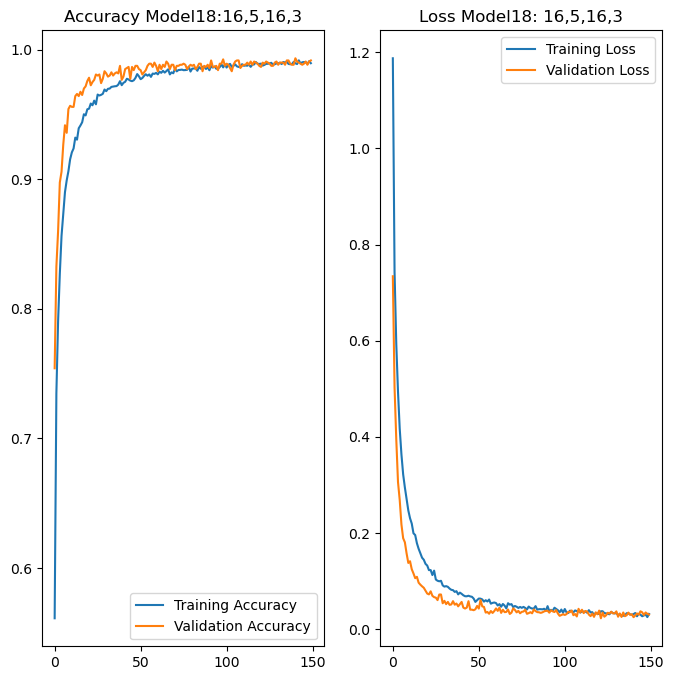

Epoch 1/150
197/197 [==============================] - 1s 3ms/step - loss: 1.1103 - accuracy: 0.6025 - val_loss: 0.6884 - val_accuracy: 0.7858
Epoch 2/150
197/197 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.7708 - val_loss: 0.4614 - val_accuracy: 0.8550
Epoch 3/150
197/197 [==============================] - 0s 2ms/step - loss: 0.5295 - accuracy: 0.8149 - val_loss: 0.3877 - val_accuracy: 0.8633
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4354 - accuracy: 0.8489 - val_loss: 0.2952 - val_accuracy: 0.8942
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3757 - accuracy: 0.8712 - val_loss: 0.2837 - val_accuracy: 0.9050
Epoch 6/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3236 - accuracy: 0.8887 - val_loss: 0.2153 - val_accuracy: 0.9225
Epoch 7/150
197/197 [==============================] - 0s 2ms/step - loss: 0.2875 - accuracy: 0.9013 - val_loss: 0.1817 - val_accuracy: 0.9375

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0265 - accuracy: 0.9908 - val_loss: 0.0383 - val_accuracy: 0.9883
Epoch 59/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 0.9902 - val_loss: 0.0363 - val_accuracy: 0.9892
Epoch 60/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0225 - accuracy: 0.9919 - val_loss: 0.0367 - val_accuracy: 0.9875
Epoch 61/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0241 - accuracy: 0.9913 - val_loss: 0.0296 - val_accuracy: 0.9908
Epoch 62/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 0.9909 - val_loss: 0.0328 - val_accuracy: 0.9900
Epoch 63/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0234 - accuracy: 0.9916 - val_loss: 0.0337 - val_accuracy: 0.9875
Epoch 64/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0275 - accuracy: 0.9910 - val_loss: 0.0380 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0150 - accuracy: 0.9945 - val_loss: 0.0311 - val_accuracy: 0.9908
Epoch 116/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 0.9943 - val_loss: 0.0336 - val_accuracy: 0.9917
Epoch 117/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0163 - accuracy: 0.9947 - val_loss: 0.0327 - val_accuracy: 0.9908
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0159 - accuracy: 0.9944 - val_loss: 0.0488 - val_accuracy: 0.9883
Epoch 119/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0149 - accuracy: 0.9949 - val_loss: 0.0333 - val_accuracy: 0.9892
Epoch 120/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9921 - val_loss: 0.0399 - val_accuracy: 0.9883
Epoch 121/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0134 - accuracy: 0.9956 - val_loss: 0.0337 - val_ac

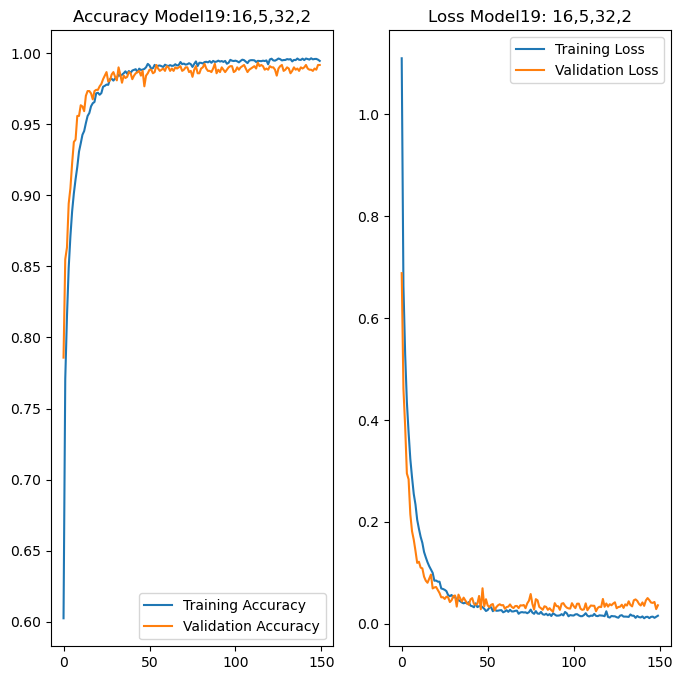

Epoch 1/150
197/197 [==============================] - 1s 3ms/step - loss: 1.0424 - accuracy: 0.6229 - val_loss: 0.6131 - val_accuracy: 0.7933
Epoch 2/150
197/197 [==============================] - 0s 2ms/step - loss: 0.6043 - accuracy: 0.7927 - val_loss: 0.4133 - val_accuracy: 0.8592
Epoch 3/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4518 - accuracy: 0.8444 - val_loss: 0.3507 - val_accuracy: 0.8808
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3699 - accuracy: 0.8738 - val_loss: 0.2400 - val_accuracy: 0.9125
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3085 - accuracy: 0.8954 - val_loss: 0.2193 - val_accuracy: 0.9242
Epoch 6/150
197/197 [==============================] - 0s 2ms/step - loss: 0.2689 - accuracy: 0.9089 - val_loss: 0.1837 - val_accuracy: 0.9350
Epoch 7/150
197/197 [==============================] - 0s 2ms/step - loss: 0.2298 - accuracy: 0.9220 - val_loss: 0.1471 - val_accuracy: 0.9458

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0255 - accuracy: 0.9926 - val_loss: 0.0227 - val_accuracy: 0.9917
Epoch 59/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0232 - accuracy: 0.9924 - val_loss: 0.0198 - val_accuracy: 0.9917
Epoch 60/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0194 - accuracy: 0.9940 - val_loss: 0.0356 - val_accuracy: 0.9900
Epoch 61/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0225 - accuracy: 0.9924 - val_loss: 0.0226 - val_accuracy: 0.9917
Epoch 62/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0191 - accuracy: 0.9933 - val_loss: 0.0259 - val_accuracy: 0.9917
Epoch 63/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 0.9923 - val_loss: 0.0401 - val_accuracy: 0.9875
Epoch 64/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0212 - accuracy: 0.9930 - val_loss: 0.0269 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 0.9950 - val_loss: 0.0227 - val_accuracy: 0.9942
Epoch 116/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0165 - accuracy: 0.9946 - val_loss: 0.0234 - val_accuracy: 0.9933
Epoch 117/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 0.9959 - val_loss: 0.0288 - val_accuracy: 0.9892
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0125 - accuracy: 0.9960 - val_loss: 0.0140 - val_accuracy: 0.9950
Epoch 119/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0102 - accuracy: 0.9965 - val_loss: 0.0194 - val_accuracy: 0.9900
Epoch 120/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 0.9967 - val_loss: 0.0238 - val_accuracy: 0.9917
Epoch 121/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0149 - accuracy: 0.9954 - val_loss: 0.0316 - val_ac

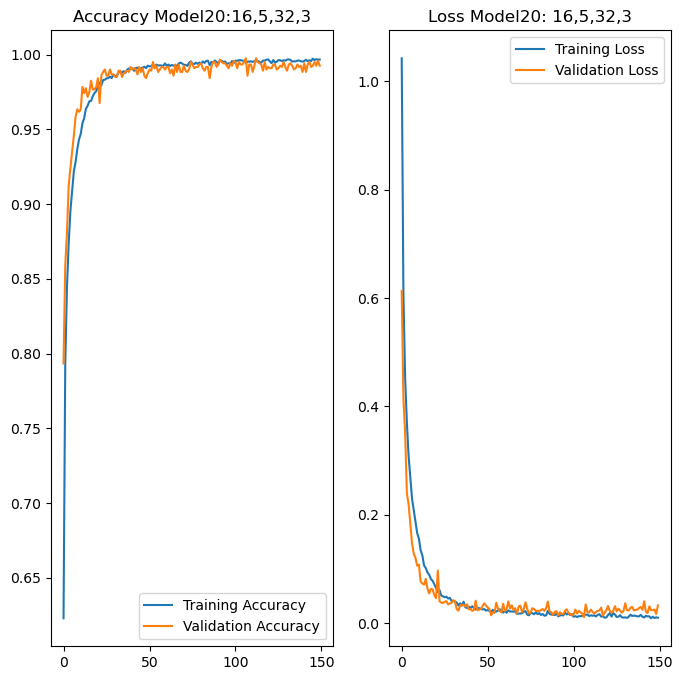

Epoch 1/150
197/197 [==============================] - 1s 3ms/step - loss: 1.2264 - accuracy: 0.5480 - val_loss: 0.8290 - val_accuracy: 0.7200
Epoch 2/150
197/197 [==============================] - 0s 2ms/step - loss: 0.8008 - accuracy: 0.7175 - val_loss: 0.5544 - val_accuracy: 0.8133
Epoch 3/150
197/197 [==============================] - 0s 2ms/step - loss: 0.6266 - accuracy: 0.7815 - val_loss: 0.4115 - val_accuracy: 0.8583
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.5216 - accuracy: 0.8185 - val_loss: 0.3290 - val_accuracy: 0.8933
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4487 - accuracy: 0.8468 - val_loss: 0.2865 - val_accuracy: 0.9142
Epoch 6/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3914 - accuracy: 0.8663 - val_loss: 0.2390 - val_accuracy: 0.9225
Epoch 7/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3474 - accuracy: 0.8789 - val_loss: 0.2161 - val_accuracy: 0.9283

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0674 - accuracy: 0.9780 - val_loss: 0.0409 - val_accuracy: 0.9875
Epoch 59/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0652 - accuracy: 0.9770 - val_loss: 0.0342 - val_accuracy: 0.9908
Epoch 60/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0596 - accuracy: 0.9803 - val_loss: 0.0352 - val_accuracy: 0.9892
Epoch 61/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0638 - accuracy: 0.9771 - val_loss: 0.0351 - val_accuracy: 0.9892
Epoch 62/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0706 - accuracy: 0.9769 - val_loss: 0.0345 - val_accuracy: 0.9908
Epoch 63/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0651 - accuracy: 0.9764 - val_loss: 0.0444 - val_accuracy: 0.9892
Epoch 64/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0649 - accuracy: 0.9789 - val_loss: 0.0416 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 0.9848 - val_loss: 0.0279 - val_accuracy: 0.9925
Epoch 116/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0428 - accuracy: 0.9858 - val_loss: 0.0324 - val_accuracy: 0.9933
Epoch 117/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0430 - accuracy: 0.9852 - val_loss: 0.0281 - val_accuracy: 0.9908
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0448 - accuracy: 0.9845 - val_loss: 0.0355 - val_accuracy: 0.9892
Epoch 119/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0451 - accuracy: 0.9857 - val_loss: 0.0309 - val_accuracy: 0.9900
Epoch 120/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0468 - accuracy: 0.9854 - val_loss: 0.0301 - val_accuracy: 0.9892
Epoch 121/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0416 - accuracy: 0.9855 - val_loss: 0.0262 - val_ac

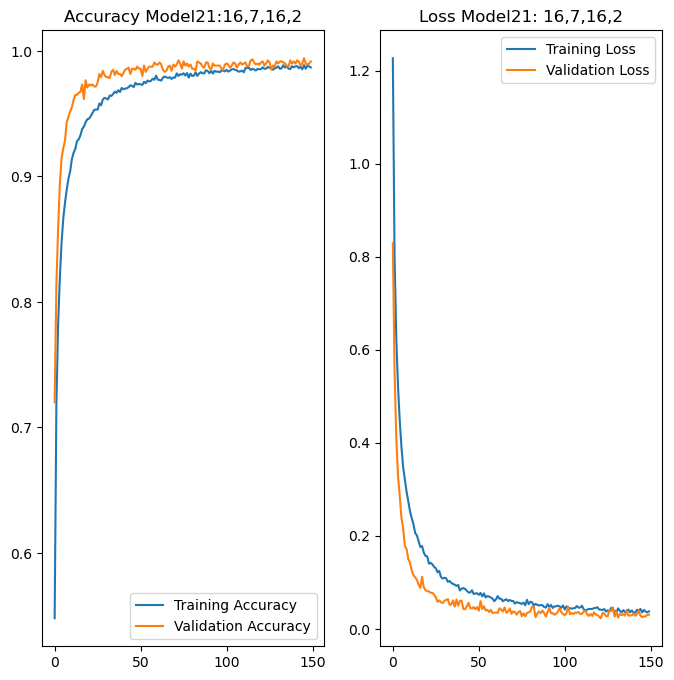

Epoch 1/150
197/197 [==============================] - 1s 3ms/step - loss: 1.3080 - accuracy: 0.5098 - val_loss: 0.8960 - val_accuracy: 0.6933
Epoch 2/150
197/197 [==============================] - 0s 2ms/step - loss: 0.9023 - accuracy: 0.6758 - val_loss: 0.6882 - val_accuracy: 0.7550
Epoch 3/150
197/197 [==============================] - 0s 2ms/step - loss: 0.7462 - accuracy: 0.7353 - val_loss: 0.5556 - val_accuracy: 0.8042
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.6496 - accuracy: 0.7685 - val_loss: 0.4596 - val_accuracy: 0.8450
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.5759 - accuracy: 0.7975 - val_loss: 0.3798 - val_accuracy: 0.8717
Epoch 6/150
197/197 [==============================] - 0s 2ms/step - loss: 0.5214 - accuracy: 0.8147 - val_loss: 0.3379 - val_accuracy: 0.8758
Epoch 7/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.8267 - val_loss: 0.3350 - val_accuracy: 0.8858

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1470 - accuracy: 0.9499 - val_loss: 0.0776 - val_accuracy: 0.9800
Epoch 59/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1383 - accuracy: 0.9518 - val_loss: 0.0883 - val_accuracy: 0.9742
Epoch 60/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1292 - accuracy: 0.9550 - val_loss: 0.0927 - val_accuracy: 0.9667
Epoch 61/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1270 - accuracy: 0.9557 - val_loss: 0.0779 - val_accuracy: 0.9758
Epoch 62/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1320 - accuracy: 0.9524 - val_loss: 0.0732 - val_accuracy: 0.9767
Epoch 63/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1332 - accuracy: 0.9528 - val_loss: 0.0756 - val_accuracy: 0.9808
Epoch 64/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1369 - accuracy: 0.9520 - val_loss: 0.0752 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0983 - accuracy: 0.9664 - val_loss: 0.0559 - val_accuracy: 0.9808
Epoch 116/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0975 - accuracy: 0.9663 - val_loss: 0.0553 - val_accuracy: 0.9833
Epoch 117/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0886 - accuracy: 0.9695 - val_loss: 0.0604 - val_accuracy: 0.9800
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0959 - accuracy: 0.9668 - val_loss: 0.0537 - val_accuracy: 0.9792
Epoch 119/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0914 - accuracy: 0.9669 - val_loss: 0.0564 - val_accuracy: 0.9817
Epoch 120/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0986 - accuracy: 0.9675 - val_loss: 0.0514 - val_accuracy: 0.9825
Epoch 121/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0935 - accuracy: 0.9684 - val_loss: 0.0518 - val_ac

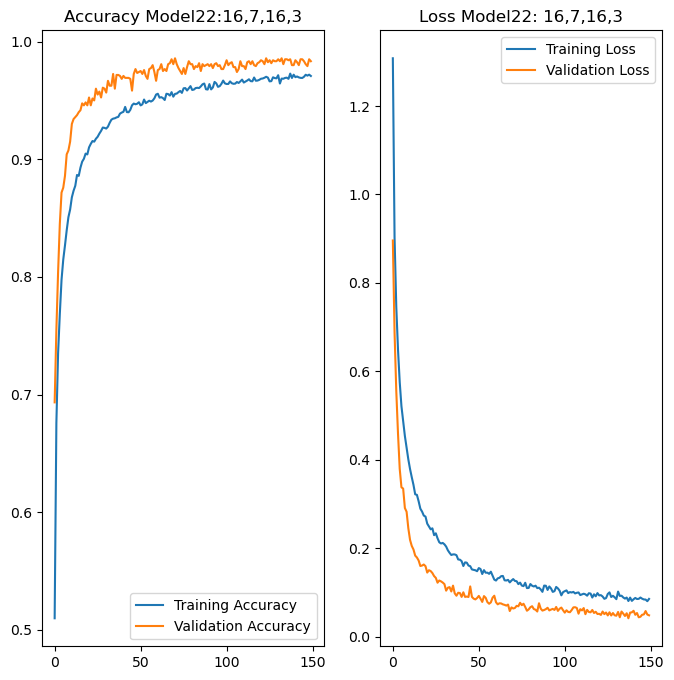

Epoch 1/150
197/197 [==============================] - 1s 3ms/step - loss: 1.0594 - accuracy: 0.6193 - val_loss: 0.6225 - val_accuracy: 0.7892
Epoch 2/150
197/197 [==============================] - 0s 2ms/step - loss: 0.6318 - accuracy: 0.7865 - val_loss: 0.4523 - val_accuracy: 0.8492
Epoch 3/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.8329 - val_loss: 0.3199 - val_accuracy: 0.8925
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3998 - accuracy: 0.8643 - val_loss: 0.2666 - val_accuracy: 0.9100
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3315 - accuracy: 0.8871 - val_loss: 0.2108 - val_accuracy: 0.9292
Epoch 6/150
197/197 [==============================] - 0s 2ms/step - loss: 0.2898 - accuracy: 0.9000 - val_loss: 0.1916 - val_accuracy: 0.9342
Epoch 7/150
197/197 [==============================] - 0s 2ms/step - loss: 0.2500 - accuracy: 0.9154 - val_loss: 0.1398 - val_accuracy: 0.9475

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0273 - accuracy: 0.9907 - val_loss: 0.0384 - val_accuracy: 0.9917
Epoch 59/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0270 - accuracy: 0.9903 - val_loss: 0.0349 - val_accuracy: 0.9867
Epoch 60/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0232 - accuracy: 0.9923 - val_loss: 0.0272 - val_accuracy: 0.9917
Epoch 61/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0247 - accuracy: 0.9915 - val_loss: 0.0313 - val_accuracy: 0.9892
Epoch 62/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0280 - accuracy: 0.9909 - val_loss: 0.0303 - val_accuracy: 0.9925
Epoch 63/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0197 - accuracy: 0.9927 - val_loss: 0.0286 - val_accuracy: 0.9900
Epoch 64/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0270 - accuracy: 0.9902 - val_loss: 0.0341 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0140 - accuracy: 0.9952 - val_loss: 0.0436 - val_accuracy: 0.9867
Epoch 116/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 0.9953 - val_loss: 0.0295 - val_accuracy: 0.9908
Epoch 117/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0159 - accuracy: 0.9955 - val_loss: 0.0531 - val_accuracy: 0.9850
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0170 - accuracy: 0.9940 - val_loss: 0.0352 - val_accuracy: 0.9908
Epoch 119/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0179 - accuracy: 0.9943 - val_loss: 0.0393 - val_accuracy: 0.9875
Epoch 120/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0224 - accuracy: 0.9925 - val_loss: 0.0278 - val_accuracy: 0.9908
Epoch 121/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 0.9946 - val_loss: 0.0318 - val_ac

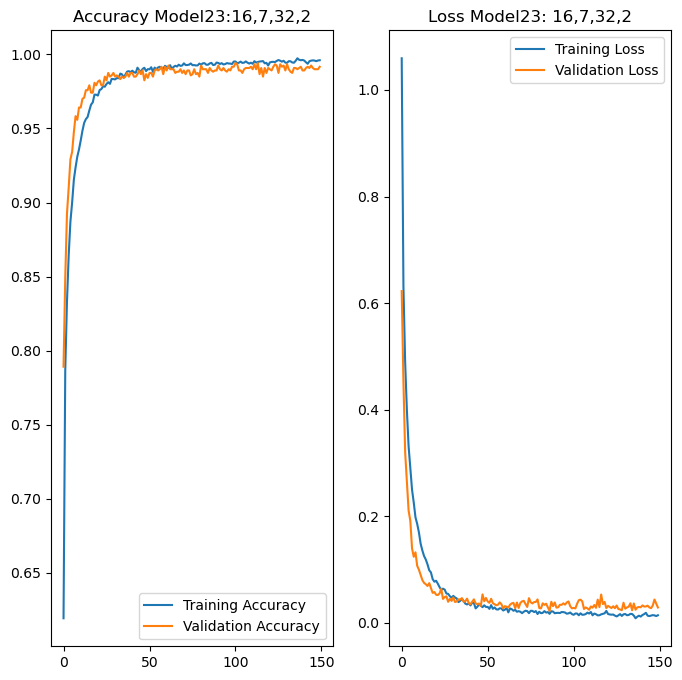

Epoch 1/150
197/197 [==============================] - 1s 3ms/step - loss: 1.2039 - accuracy: 0.5538 - val_loss: 0.7619 - val_accuracy: 0.7525
Epoch 2/150
197/197 [==============================] - 0s 2ms/step - loss: 0.7626 - accuracy: 0.7321 - val_loss: 0.5332 - val_accuracy: 0.8267
Epoch 3/150
197/197 [==============================] - 0s 2ms/step - loss: 0.6177 - accuracy: 0.7794 - val_loss: 0.4459 - val_accuracy: 0.8617
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.5166 - accuracy: 0.8184 - val_loss: 0.3504 - val_accuracy: 0.8858
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4537 - accuracy: 0.8418 - val_loss: 0.3172 - val_accuracy: 0.8992
Epoch 6/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3985 - accuracy: 0.8614 - val_loss: 0.2674 - val_accuracy: 0.9050
Epoch 7/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3629 - accuracy: 0.8723 - val_loss: 0.2456 - val_accuracy: 0.9133

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0580 - accuracy: 0.9802 - val_loss: 0.0528 - val_accuracy: 0.9825
Epoch 59/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0555 - accuracy: 0.9808 - val_loss: 0.0379 - val_accuracy: 0.9867
Epoch 60/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0545 - accuracy: 0.9808 - val_loss: 0.0415 - val_accuracy: 0.9858
Epoch 61/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0599 - accuracy: 0.9813 - val_loss: 0.0387 - val_accuracy: 0.9842
Epoch 62/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0593 - accuracy: 0.9800 - val_loss: 0.0392 - val_accuracy: 0.9850
Epoch 63/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0549 - accuracy: 0.9816 - val_loss: 0.0514 - val_accuracy: 0.9792
Epoch 64/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0610 - accuracy: 0.9793 - val_loss: 0.0422 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0388 - accuracy: 0.9873 - val_loss: 0.0366 - val_accuracy: 0.9892
Epoch 116/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0387 - accuracy: 0.9875 - val_loss: 0.0296 - val_accuracy: 0.9900
Epoch 117/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0385 - accuracy: 0.9870 - val_loss: 0.0408 - val_accuracy: 0.9867
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0375 - accuracy: 0.9871 - val_loss: 0.0335 - val_accuracy: 0.9883
Epoch 119/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0391 - accuracy: 0.9871 - val_loss: 0.0283 - val_accuracy: 0.9900
Epoch 120/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0394 - accuracy: 0.9867 - val_loss: 0.0363 - val_accuracy: 0.9892
Epoch 121/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0361 - accuracy: 0.9875 - val_loss: 0.0301 - val_ac

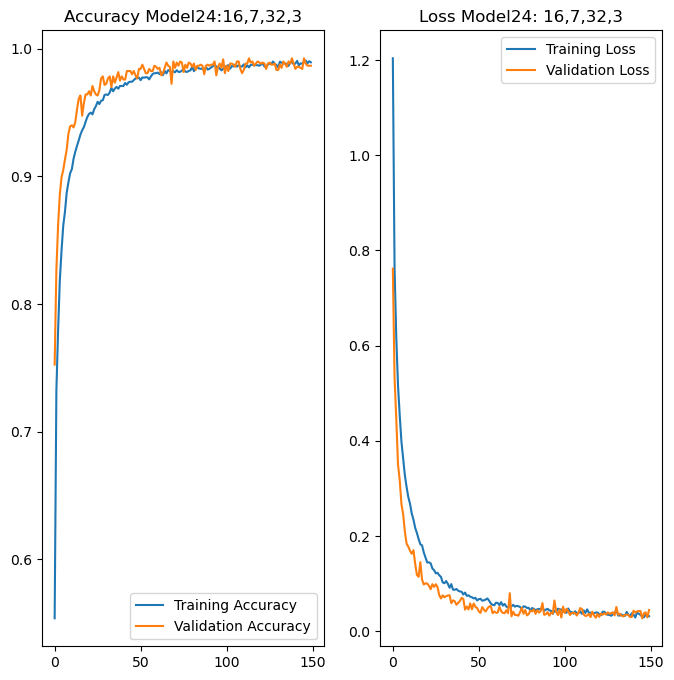

Epoch 1/150
197/197 [==============================] - 1s 6ms/step - loss: 1.0112 - accuracy: 0.6303 - val_loss: 0.5968 - val_accuracy: 0.8133
Epoch 2/150
197/197 [==============================] - 0s 2ms/step - loss: 0.5754 - accuracy: 0.7998 - val_loss: 0.3973 - val_accuracy: 0.8683
Epoch 3/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4369 - accuracy: 0.8461 - val_loss: 0.2820 - val_accuracy: 0.9050
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3624 - accuracy: 0.8747 - val_loss: 0.2199 - val_accuracy: 0.9200
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3022 - accuracy: 0.8931 - val_loss: 0.1792 - val_accuracy: 0.9358
Epoch 6/150
197/197 [==============================] - 0s 2ms/step - loss: 0.2553 - accuracy: 0.9132 - val_loss: 0.1668 - val_accuracy: 0.9392
Epoch 7/150
197/197 [==============================] - 0s 2ms/step - loss: 0.2225 - accuracy: 0.9224 - val_loss: 0.1358 - val_accuracy: 0.9550

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0178 - accuracy: 0.9941 - val_loss: 0.0292 - val_accuracy: 0.9908
Epoch 59/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0145 - accuracy: 0.9955 - val_loss: 0.0312 - val_accuracy: 0.9925
Epoch 60/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0220 - accuracy: 0.9936 - val_loss: 0.0328 - val_accuracy: 0.9892
Epoch 61/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0144 - accuracy: 0.9953 - val_loss: 0.0247 - val_accuracy: 0.9908
Epoch 62/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0136 - accuracy: 0.9955 - val_loss: 0.0288 - val_accuracy: 0.9925
Epoch 63/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0134 - accuracy: 0.9955 - val_loss: 0.0314 - val_accuracy: 0.9892
Epoch 64/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0163 - accuracy: 0.9947 - val_loss: 0.0213 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 0.9975 - val_loss: 0.0403 - val_accuracy: 0.9908
Epoch 116/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0096 - accuracy: 0.9965 - val_loss: 0.0294 - val_accuracy: 0.9942
Epoch 117/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 0.9965 - val_loss: 0.0304 - val_accuracy: 0.9908
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0136 - accuracy: 0.9953 - val_loss: 0.0266 - val_accuracy: 0.9942
Epoch 119/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 0.9973 - val_loss: 0.0216 - val_accuracy: 0.9917
Epoch 120/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0092 - accuracy: 0.9971 - val_loss: 0.0218 - val_accuracy: 0.9917
Epoch 121/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0106 - accuracy: 0.9966 - val_loss: 0.0199 - val_ac

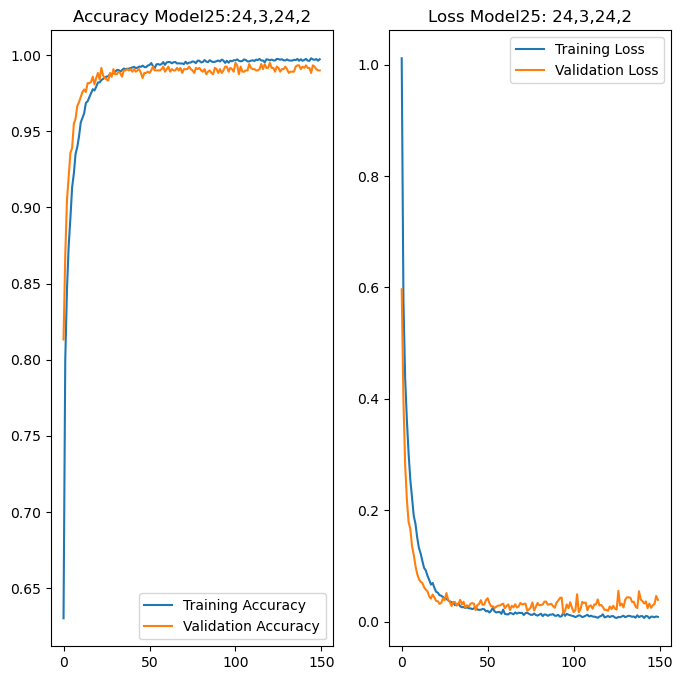

Epoch 1/150
197/197 [==============================] - 1s 3ms/step - loss: 1.0830 - accuracy: 0.6020 - val_loss: 0.6128 - val_accuracy: 0.7950
Epoch 2/150
197/197 [==============================] - 0s 2ms/step - loss: 0.6488 - accuracy: 0.7710 - val_loss: 0.4616 - val_accuracy: 0.8417
Epoch 3/150
197/197 [==============================] - 0s 2ms/step - loss: 0.5063 - accuracy: 0.8216 - val_loss: 0.3444 - val_accuracy: 0.8842
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.8558 - val_loss: 0.2589 - val_accuracy: 0.9100
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3547 - accuracy: 0.8759 - val_loss: 0.2170 - val_accuracy: 0.9267
Epoch 6/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3047 - accuracy: 0.8946 - val_loss: 0.1850 - val_accuracy: 0.9342
Epoch 7/150
197/197 [==============================] - 0s 2ms/step - loss: 0.2671 - accuracy: 0.9074 - val_loss: 0.1669 - val_accuracy: 0.9442

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0334 - accuracy: 0.9887 - val_loss: 0.0308 - val_accuracy: 0.9892
Epoch 59/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0310 - accuracy: 0.9896 - val_loss: 0.0310 - val_accuracy: 0.9875
Epoch 60/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0303 - accuracy: 0.9898 - val_loss: 0.0346 - val_accuracy: 0.9908
Epoch 61/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0302 - accuracy: 0.9897 - val_loss: 0.0372 - val_accuracy: 0.9875
Epoch 62/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0305 - accuracy: 0.9895 - val_loss: 0.0279 - val_accuracy: 0.9900
Epoch 63/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0285 - accuracy: 0.9906 - val_loss: 0.0299 - val_accuracy: 0.9892
Epoch 64/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0313 - accuracy: 0.9894 - val_loss: 0.0325 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0222 - accuracy: 0.9932 - val_loss: 0.0313 - val_accuracy: 0.9925
Epoch 116/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0160 - accuracy: 0.9952 - val_loss: 0.0248 - val_accuracy: 0.9917
Epoch 117/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 0.9941 - val_loss: 0.0314 - val_accuracy: 0.9892
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 0.9943 - val_loss: 0.0314 - val_accuracy: 0.9892
Epoch 119/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0183 - accuracy: 0.9940 - val_loss: 0.0356 - val_accuracy: 0.9900
Epoch 120/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0228 - accuracy: 0.9918 - val_loss: 0.0326 - val_accuracy: 0.9908
Epoch 121/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0163 - accuracy: 0.9951 - val_loss: 0.0318 - val_ac

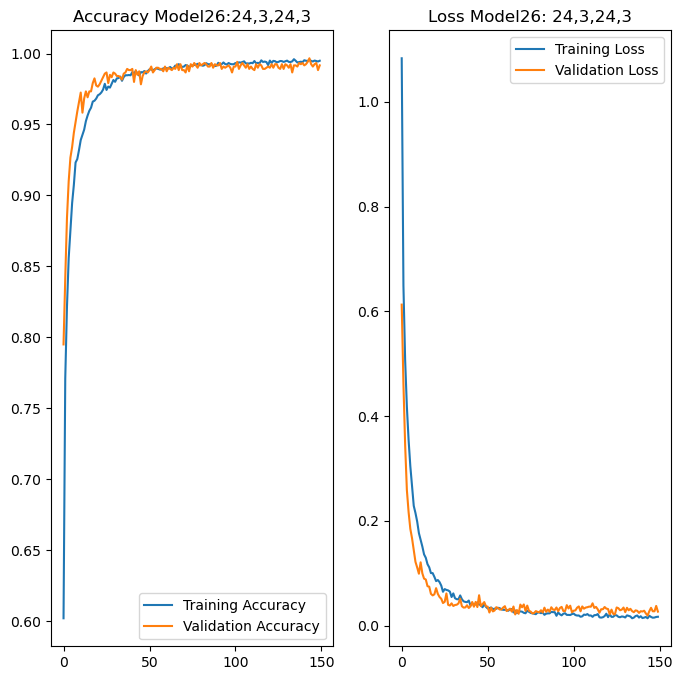

Epoch 1/150
197/197 [==============================] - 1s 3ms/step - loss: 0.9291 - accuracy: 0.6668 - val_loss: 0.4973 - val_accuracy: 0.8342
Epoch 2/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4924 - accuracy: 0.8289 - val_loss: 0.3307 - val_accuracy: 0.8933
Epoch 3/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3563 - accuracy: 0.8766 - val_loss: 0.2276 - val_accuracy: 0.9175
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.2791 - accuracy: 0.9048 - val_loss: 0.1720 - val_accuracy: 0.9425
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.2286 - accuracy: 0.9204 - val_loss: 0.1398 - val_accuracy: 0.9500
Epoch 6/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1848 - accuracy: 0.9355 - val_loss: 0.1091 - val_accuracy: 0.9592
Epoch 7/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1611 - accuracy: 0.9459 - val_loss: 0.0992 - val_accuracy: 0.9683

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 0.9976 - val_loss: 0.0330 - val_accuracy: 0.9875
Epoch 59/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0099 - accuracy: 0.9969 - val_loss: 0.0227 - val_accuracy: 0.9933
Epoch 60/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 0.9981 - val_loss: 0.0301 - val_accuracy: 0.9917
Epoch 61/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 0.9979 - val_loss: 0.0216 - val_accuracy: 0.9933
Epoch 62/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0082 - accuracy: 0.9970 - val_loss: 0.0258 - val_accuracy: 0.9900
Epoch 63/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0088 - accuracy: 0.9969 - val_loss: 0.0312 - val_accuracy: 0.9900
Epoch 64/150
197/197 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9970 - val_loss: 0.0334 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 0.9984 - val_loss: 0.0284 - val_accuracy: 0.9950
Epoch 116/150
197/197 [==============================] - 1s 3ms/step - loss: 0.0038 - accuracy: 0.9990 - val_loss: 0.0241 - val_accuracy: 0.9958
Epoch 117/150
197/197 [==============================] - 1s 3ms/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.0268 - val_accuracy: 0.9942
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 0.9989 - val_loss: 0.0366 - val_accuracy: 0.9917
Epoch 119/150
197/197 [==============================] - 1s 3ms/step - loss: 0.0052 - accuracy: 0.9984 - val_loss: 0.0238 - val_accuracy: 0.9950
Epoch 120/150
197/197 [==============================] - 1s 3ms/step - loss: 0.0037 - accuracy: 0.9985 - val_loss: 0.0362 - val_accuracy: 0.9908
Epoch 121/150
197/197 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 0.0342 - val_ac

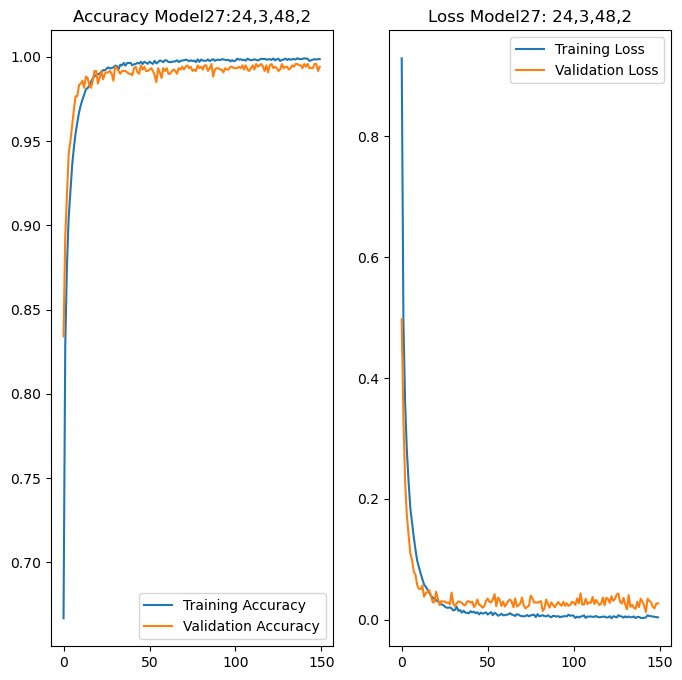

Epoch 1/150
197/197 [==============================] - 1s 3ms/step - loss: 1.0071 - accuracy: 0.6316 - val_loss: 0.6214 - val_accuracy: 0.7900
Epoch 2/150
197/197 [==============================] - 1s 3ms/step - loss: 0.5645 - accuracy: 0.8004 - val_loss: 0.3638 - val_accuracy: 0.8817
Epoch 3/150
197/197 [==============================] - 1s 3ms/step - loss: 0.4185 - accuracy: 0.8537 - val_loss: 0.2699 - val_accuracy: 0.9050
Epoch 4/150
197/197 [==============================] - 0s 3ms/step - loss: 0.3336 - accuracy: 0.8846 - val_loss: 0.2129 - val_accuracy: 0.9233
Epoch 5/150
197/197 [==============================] - 0s 3ms/step - loss: 0.2790 - accuracy: 0.9041 - val_loss: 0.1737 - val_accuracy: 0.9417
Epoch 6/150
197/197 [==============================] - 1s 3ms/step - loss: 0.2285 - accuracy: 0.9208 - val_loss: 0.1512 - val_accuracy: 0.9542
Epoch 7/150
197/197 [==============================] - 1s 3ms/step - loss: 0.1924 - accuracy: 0.9348 - val_loss: 0.1364 - val_accuracy: 0.9533

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0131 - accuracy: 0.9956 - val_loss: 0.0273 - val_accuracy: 0.9925
Epoch 59/150
197/197 [==============================] - 0s 3ms/step - loss: 0.0127 - accuracy: 0.9956 - val_loss: 0.0327 - val_accuracy: 0.9892
Epoch 60/150
197/197 [==============================] - 1s 3ms/step - loss: 0.0141 - accuracy: 0.9952 - val_loss: 0.0295 - val_accuracy: 0.9917
Epoch 61/150
197/197 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 0.9944 - val_loss: 0.0210 - val_accuracy: 0.9950
Epoch 62/150
197/197 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 0.9948 - val_loss: 0.0281 - val_accuracy: 0.9883
Epoch 63/150
197/197 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.9955 - val_loss: 0.0355 - val_accuracy: 0.9900
Epoch 64/150
197/197 [==============================] - 0s 3ms/step - loss: 0.0137 - accuracy: 0.9951 - val_loss: 0.0205 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 0.9979 - val_loss: 0.0159 - val_accuracy: 0.9950
Epoch 116/150
197/197 [==============================] - 1s 3ms/step - loss: 0.0055 - accuracy: 0.9981 - val_loss: 0.0231 - val_accuracy: 0.9925
Epoch 117/150
197/197 [==============================] - 1s 3ms/step - loss: 0.0084 - accuracy: 0.9973 - val_loss: 0.0167 - val_accuracy: 0.9942
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0109 - accuracy: 0.9961 - val_loss: 0.0301 - val_accuracy: 0.9917
Epoch 119/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0106 - accuracy: 0.9972 - val_loss: 0.0239 - val_accuracy: 0.9942
Epoch 120/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 0.9972 - val_loss: 0.0291 - val_accuracy: 0.9900
Epoch 121/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0108 - accuracy: 0.9964 - val_loss: 0.0372 - val_ac

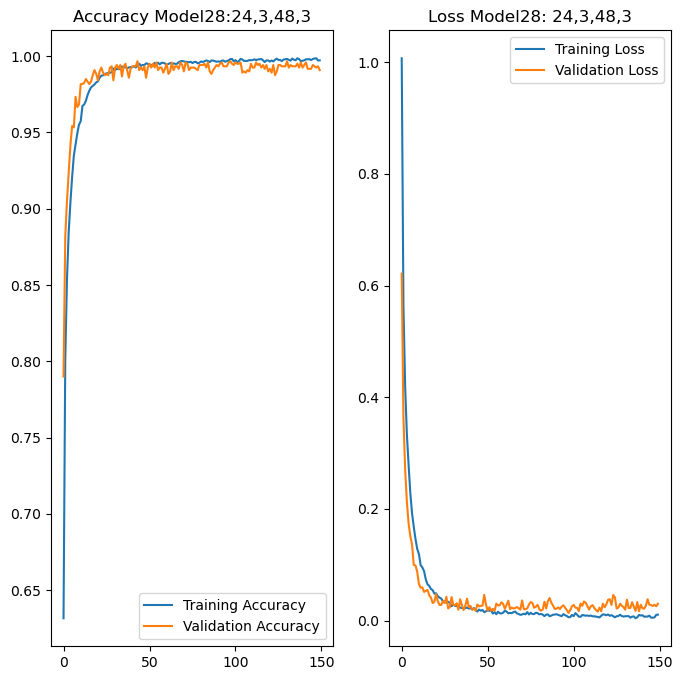

Epoch 1/150
197/197 [==============================] - 1s 3ms/step - loss: 1.1647 - accuracy: 0.5694 - val_loss: 0.7066 - val_accuracy: 0.7617
Epoch 2/150
197/197 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.7559 - val_loss: 0.5004 - val_accuracy: 0.8292
Epoch 3/150
197/197 [==============================] - 0s 2ms/step - loss: 0.5350 - accuracy: 0.8107 - val_loss: 0.3776 - val_accuracy: 0.8750
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4410 - accuracy: 0.8458 - val_loss: 0.2938 - val_accuracy: 0.9008
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3758 - accuracy: 0.8703 - val_loss: 0.2307 - val_accuracy: 0.9192
Epoch 6/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3217 - accuracy: 0.8874 - val_loss: 0.2002 - val_accuracy: 0.9358
Epoch 7/150
197/197 [==============================] - 0s 2ms/step - loss: 0.2846 - accuracy: 0.9018 - val_loss: 0.1753 - val_accuracy: 0.9417

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0346 - accuracy: 0.9887 - val_loss: 0.0360 - val_accuracy: 0.9875
Epoch 59/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0358 - accuracy: 0.9881 - val_loss: 0.0352 - val_accuracy: 0.9900
Epoch 60/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0377 - accuracy: 0.9871 - val_loss: 0.0396 - val_accuracy: 0.9867
Epoch 61/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0299 - accuracy: 0.9887 - val_loss: 0.0368 - val_accuracy: 0.9883
Epoch 62/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0355 - accuracy: 0.9878 - val_loss: 0.0344 - val_accuracy: 0.9875
Epoch 63/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0323 - accuracy: 0.9887 - val_loss: 0.0396 - val_accuracy: 0.9867
Epoch 64/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0346 - accuracy: 0.9882 - val_loss: 0.0287 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0203 - accuracy: 0.9936 - val_loss: 0.0376 - val_accuracy: 0.9892
Epoch 116/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0196 - accuracy: 0.9939 - val_loss: 0.0246 - val_accuracy: 0.9925
Epoch 117/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0215 - accuracy: 0.9929 - val_loss: 0.0268 - val_accuracy: 0.9917
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0238 - accuracy: 0.9921 - val_loss: 0.0287 - val_accuracy: 0.9900
Epoch 119/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0255 - accuracy: 0.9921 - val_loss: 0.0416 - val_accuracy: 0.9892
Epoch 120/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0193 - accuracy: 0.9938 - val_loss: 0.0301 - val_accuracy: 0.9900
Epoch 121/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0244 - accuracy: 0.9927 - val_loss: 0.0526 - val_ac

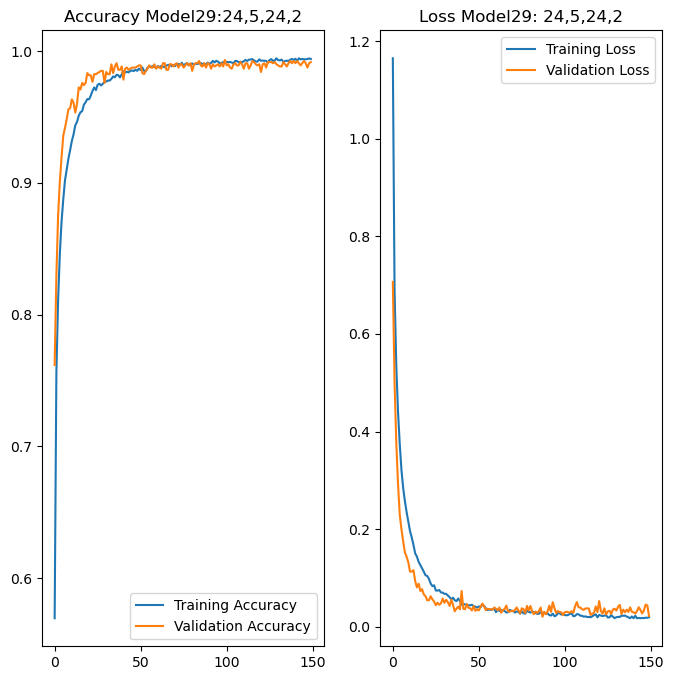

Epoch 1/150
197/197 [==============================] - 1s 3ms/step - loss: 1.0829 - accuracy: 0.5989 - val_loss: 0.6016 - val_accuracy: 0.8008
Epoch 2/150
197/197 [==============================] - 0s 2ms/step - loss: 0.5995 - accuracy: 0.7888 - val_loss: 0.3961 - val_accuracy: 0.8617
Epoch 3/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4488 - accuracy: 0.8437 - val_loss: 0.2933 - val_accuracy: 0.8992
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3567 - accuracy: 0.8784 - val_loss: 0.2244 - val_accuracy: 0.9258
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3047 - accuracy: 0.8967 - val_loss: 0.1973 - val_accuracy: 0.9292
Epoch 6/150
197/197 [==============================] - 0s 2ms/step - loss: 0.2669 - accuracy: 0.9086 - val_loss: 0.1627 - val_accuracy: 0.9442
Epoch 7/150
197/197 [==============================] - 0s 2ms/step - loss: 0.2396 - accuracy: 0.9164 - val_loss: 0.1425 - val_accuracy: 0.9500

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0288 - accuracy: 0.9903 - val_loss: 0.0219 - val_accuracy: 0.9925
Epoch 59/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0286 - accuracy: 0.9897 - val_loss: 0.0247 - val_accuracy: 0.9950
Epoch 60/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0270 - accuracy: 0.9907 - val_loss: 0.0230 - val_accuracy: 0.9925
Epoch 61/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0280 - accuracy: 0.9903 - val_loss: 0.0417 - val_accuracy: 0.9825
Epoch 62/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 0.9901 - val_loss: 0.0246 - val_accuracy: 0.9925
Epoch 63/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 0.9907 - val_loss: 0.0312 - val_accuracy: 0.9883
Epoch 64/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0311 - accuracy: 0.9892 - val_loss: 0.0285 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0212 - accuracy: 0.9931 - val_loss: 0.0107 - val_accuracy: 0.9967
Epoch 116/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0193 - accuracy: 0.9937 - val_loss: 0.0172 - val_accuracy: 0.9925
Epoch 117/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0217 - accuracy: 0.9927 - val_loss: 0.0165 - val_accuracy: 0.9925
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0219 - accuracy: 0.9926 - val_loss: 0.0170 - val_accuracy: 0.9925
Epoch 119/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0221 - accuracy: 0.9926 - val_loss: 0.0191 - val_accuracy: 0.9917
Epoch 120/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0181 - accuracy: 0.9938 - val_loss: 0.0203 - val_accuracy: 0.9925
Epoch 121/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0159 - accuracy: 0.9947 - val_loss: 0.0109 - val_ac

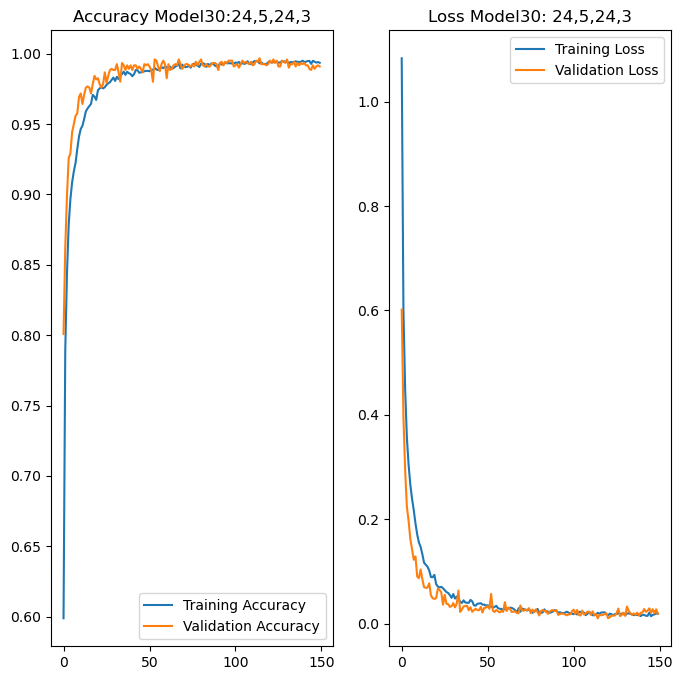

Epoch 1/150
197/197 [==============================] - 1s 3ms/step - loss: 1.0219 - accuracy: 0.6329 - val_loss: 0.6015 - val_accuracy: 0.8025
Epoch 2/150
197/197 [==============================] - 0s 2ms/step - loss: 0.5909 - accuracy: 0.7951 - val_loss: 0.4160 - val_accuracy: 0.8583
Epoch 3/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.8509 - val_loss: 0.2965 - val_accuracy: 0.8958
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3533 - accuracy: 0.8784 - val_loss: 0.2281 - val_accuracy: 0.9233
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.2893 - accuracy: 0.8995 - val_loss: 0.1976 - val_accuracy: 0.9283
Epoch 6/150
197/197 [==============================] - 1s 3ms/step - loss: 0.2528 - accuracy: 0.9106 - val_loss: 0.1722 - val_accuracy: 0.9425
Epoch 7/150
197/197 [==============================] - 0s 3ms/step - loss: 0.2135 - accuracy: 0.9278 - val_loss: 0.1579 - val_accuracy: 0.9408

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0169 - accuracy: 0.9941 - val_loss: 0.0269 - val_accuracy: 0.9900
Epoch 59/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0138 - accuracy: 0.9960 - val_loss: 0.0268 - val_accuracy: 0.9900
Epoch 60/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0164 - accuracy: 0.9949 - val_loss: 0.0198 - val_accuracy: 0.9933
Epoch 61/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0168 - accuracy: 0.9940 - val_loss: 0.0234 - val_accuracy: 0.9925
Epoch 62/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0129 - accuracy: 0.9956 - val_loss: 0.0229 - val_accuracy: 0.9933
Epoch 63/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 0.9951 - val_loss: 0.0275 - val_accuracy: 0.9900
Epoch 64/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0131 - accuracy: 0.9959 - val_loss: 0.0192 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0119 - accuracy: 0.9962 - val_loss: 0.0283 - val_accuracy: 0.9917
Epoch 116/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0094 - accuracy: 0.9972 - val_loss: 0.0272 - val_accuracy: 0.9900
Epoch 117/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0128 - accuracy: 0.9963 - val_loss: 0.0192 - val_accuracy: 0.9933
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0103 - accuracy: 0.9970 - val_loss: 0.0207 - val_accuracy: 0.9942
Epoch 119/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0128 - accuracy: 0.9962 - val_loss: 0.0225 - val_accuracy: 0.9950
Epoch 120/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0093 - accuracy: 0.9970 - val_loss: 0.0162 - val_accuracy: 0.9925
Epoch 121/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 0.9976 - val_loss: 0.0299 - val_ac

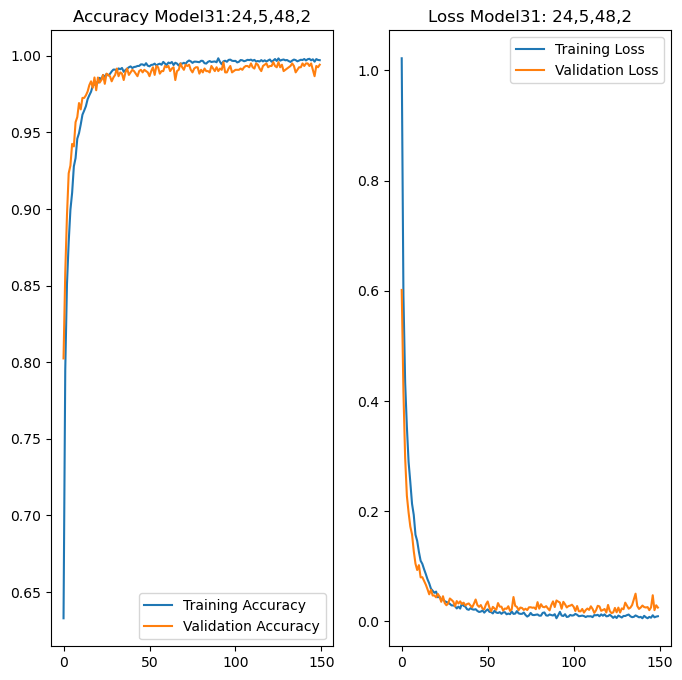

Epoch 1/150
197/197 [==============================] - 1s 3ms/step - loss: 0.9816 - accuracy: 0.6463 - val_loss: 0.5705 - val_accuracy: 0.8167
Epoch 2/150
197/197 [==============================] - 0s 2ms/step - loss: 0.5349 - accuracy: 0.8137 - val_loss: 0.3594 - val_accuracy: 0.8842
Epoch 3/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3878 - accuracy: 0.8666 - val_loss: 0.2538 - val_accuracy: 0.9100
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3028 - accuracy: 0.8955 - val_loss: 0.2056 - val_accuracy: 0.9267
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.9155 - val_loss: 0.1612 - val_accuracy: 0.9458
Epoch 6/150
197/197 [==============================] - 0s 2ms/step - loss: 0.2098 - accuracy: 0.9284 - val_loss: 0.1277 - val_accuracy: 0.9525
Epoch 7/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1786 - accuracy: 0.9395 - val_loss: 0.1178 - val_accuracy: 0.9558

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0134 - accuracy: 0.9955 - val_loss: 0.0165 - val_accuracy: 0.9942
Epoch 59/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0114 - accuracy: 0.9962 - val_loss: 0.0349 - val_accuracy: 0.9908
Epoch 60/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0134 - accuracy: 0.9958 - val_loss: 0.0190 - val_accuracy: 0.9942
Epoch 61/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0118 - accuracy: 0.9962 - val_loss: 0.0246 - val_accuracy: 0.9900
Epoch 62/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0145 - accuracy: 0.9954 - val_loss: 0.0292 - val_accuracy: 0.9942
Epoch 63/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0125 - accuracy: 0.9963 - val_loss: 0.0194 - val_accuracy: 0.9942
Epoch 64/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0110 - accuracy: 0.9966 - val_loss: 0.0147 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0129 - accuracy: 0.9965 - val_loss: 0.0262 - val_accuracy: 0.9908
Epoch 116/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0089 - accuracy: 0.9968 - val_loss: 0.0149 - val_accuracy: 0.9967
Epoch 117/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 0.9975 - val_loss: 0.0079 - val_accuracy: 0.9975
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 0.9979 - val_loss: 0.0172 - val_accuracy: 0.9950
Epoch 119/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0105 - accuracy: 0.9969 - val_loss: 0.0247 - val_accuracy: 0.9925
Epoch 120/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 0.9969 - val_loss: 0.0132 - val_accuracy: 0.9958
Epoch 121/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0083 - accuracy: 0.9973 - val_loss: 0.0169 - val_ac

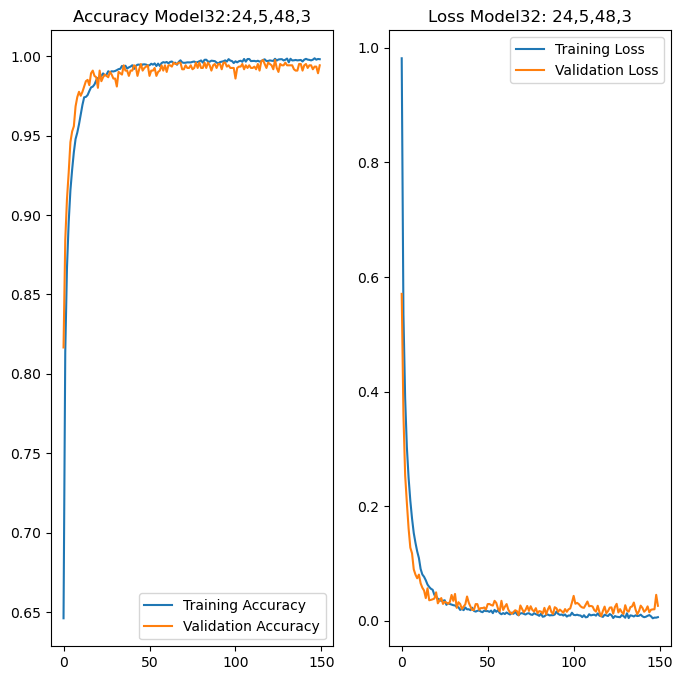

Epoch 1/150
197/197 [==============================] - 1s 3ms/step - loss: 1.0794 - accuracy: 0.6121 - val_loss: 0.6382 - val_accuracy: 0.7842
Epoch 2/150
197/197 [==============================] - 0s 2ms/step - loss: 0.6523 - accuracy: 0.7716 - val_loss: 0.4556 - val_accuracy: 0.8417
Epoch 3/150
197/197 [==============================] - 0s 2ms/step - loss: 0.5053 - accuracy: 0.8251 - val_loss: 0.3408 - val_accuracy: 0.8875
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4077 - accuracy: 0.8598 - val_loss: 0.2501 - val_accuracy: 0.9158
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3476 - accuracy: 0.8773 - val_loss: 0.2142 - val_accuracy: 0.9267
Epoch 6/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3014 - accuracy: 0.8960 - val_loss: 0.1746 - val_accuracy: 0.9358
Epoch 7/150
197/197 [==============================] - 0s 2ms/step - loss: 0.2661 - accuracy: 0.9090 - val_loss: 0.1564 - val_accuracy: 0.9508

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 0.9876 - val_loss: 0.0493 - val_accuracy: 0.9833
Epoch 59/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0344 - accuracy: 0.9887 - val_loss: 0.0439 - val_accuracy: 0.9850
Epoch 60/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0398 - accuracy: 0.9872 - val_loss: 0.0383 - val_accuracy: 0.9867
Epoch 61/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0371 - accuracy: 0.9873 - val_loss: 0.0299 - val_accuracy: 0.9917
Epoch 62/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0286 - accuracy: 0.9902 - val_loss: 0.0247 - val_accuracy: 0.9908
Epoch 63/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0316 - accuracy: 0.9894 - val_loss: 0.0348 - val_accuracy: 0.9908
Epoch 64/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0333 - accuracy: 0.9890 - val_loss: 0.0423 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0217 - accuracy: 0.9924 - val_loss: 0.0278 - val_accuracy: 0.9892
Epoch 116/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0210 - accuracy: 0.9930 - val_loss: 0.0258 - val_accuracy: 0.9917
Epoch 117/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0207 - accuracy: 0.9938 - val_loss: 0.0293 - val_accuracy: 0.9883
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0245 - accuracy: 0.9929 - val_loss: 0.0248 - val_accuracy: 0.9917
Epoch 119/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0257 - accuracy: 0.9911 - val_loss: 0.0307 - val_accuracy: 0.9875
Epoch 120/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0194 - accuracy: 0.9934 - val_loss: 0.0274 - val_accuracy: 0.9900
Epoch 121/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0226 - accuracy: 0.9923 - val_loss: 0.0208 - val_ac

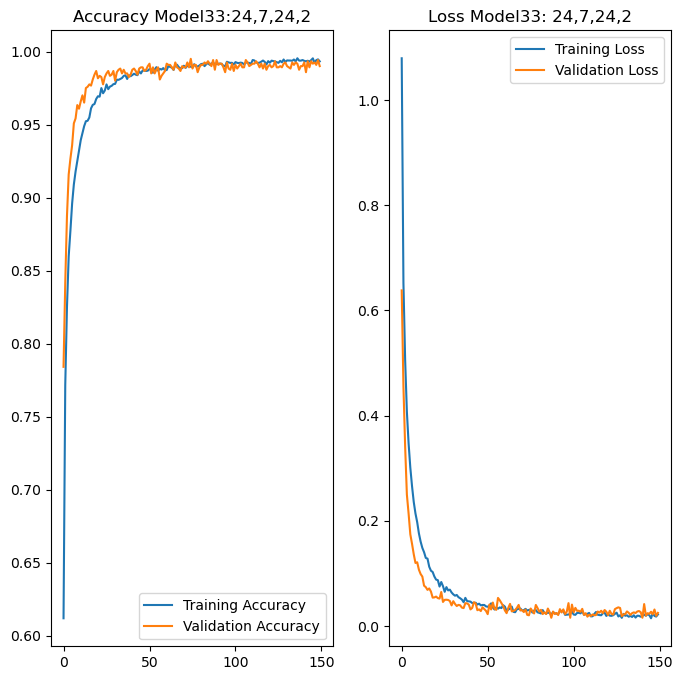

Epoch 1/150
197/197 [==============================] - 1s 3ms/step - loss: 1.2596 - accuracy: 0.5334 - val_loss: 0.8567 - val_accuracy: 0.7142
Epoch 2/150
197/197 [==============================] - 0s 2ms/step - loss: 0.8290 - accuracy: 0.7091 - val_loss: 0.6172 - val_accuracy: 0.7908
Epoch 3/150
197/197 [==============================] - 0s 2ms/step - loss: 0.6691 - accuracy: 0.7621 - val_loss: 0.4737 - val_accuracy: 0.8350
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.5643 - accuracy: 0.8026 - val_loss: 0.3738 - val_accuracy: 0.8650
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4797 - accuracy: 0.8328 - val_loss: 0.3295 - val_accuracy: 0.8850
Epoch 6/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4344 - accuracy: 0.8505 - val_loss: 0.2962 - val_accuracy: 0.8925
Epoch 7/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3865 - accuracy: 0.8651 - val_loss: 0.3062 - val_accuracy: 0.8975

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0838 - accuracy: 0.9709 - val_loss: 0.0660 - val_accuracy: 0.9783
Epoch 59/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0720 - accuracy: 0.9751 - val_loss: 0.0646 - val_accuracy: 0.9783
Epoch 60/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0798 - accuracy: 0.9714 - val_loss: 0.0527 - val_accuracy: 0.9817
Epoch 61/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0758 - accuracy: 0.9729 - val_loss: 0.0651 - val_accuracy: 0.9800
Epoch 62/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0764 - accuracy: 0.9742 - val_loss: 0.0557 - val_accuracy: 0.9817
Epoch 63/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0690 - accuracy: 0.9759 - val_loss: 0.0469 - val_accuracy: 0.9833
Epoch 64/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0724 - accuracy: 0.9745 - val_loss: 0.0530 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0541 - accuracy: 0.9825 - val_loss: 0.0517 - val_accuracy: 0.9842
Epoch 116/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0499 - accuracy: 0.9826 - val_loss: 0.0454 - val_accuracy: 0.9842
Epoch 117/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0451 - accuracy: 0.9851 - val_loss: 0.0487 - val_accuracy: 0.9817
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0495 - accuracy: 0.9823 - val_loss: 0.0446 - val_accuracy: 0.9858
Epoch 119/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0528 - accuracy: 0.9822 - val_loss: 0.0519 - val_accuracy: 0.9783
Epoch 120/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0508 - accuracy: 0.9830 - val_loss: 0.0418 - val_accuracy: 0.9842
Epoch 121/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0448 - accuracy: 0.9838 - val_loss: 0.0444 - val_ac

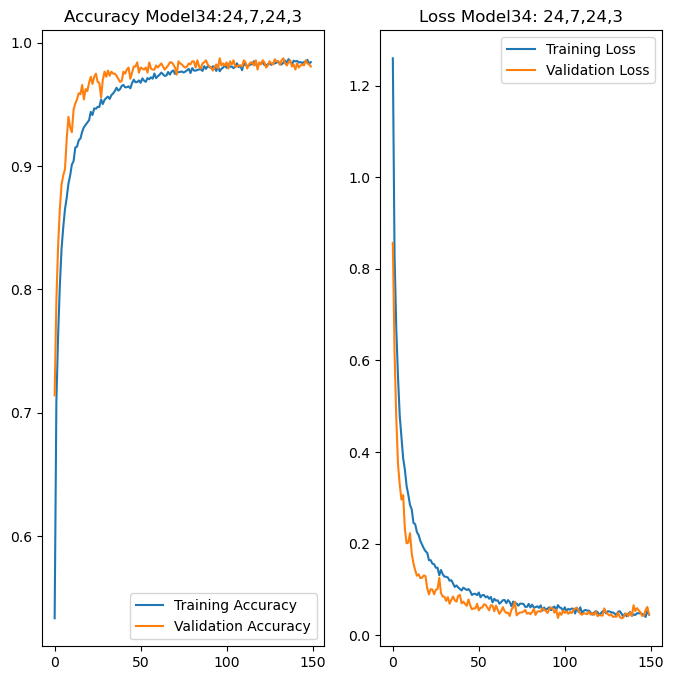

Epoch 1/150
197/197 [==============================] - 1s 3ms/step - loss: 0.9895 - accuracy: 0.6463 - val_loss: 0.5716 - val_accuracy: 0.8108
Epoch 2/150
197/197 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.8064 - val_loss: 0.3972 - val_accuracy: 0.8650
Epoch 3/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.8552 - val_loss: 0.2748 - val_accuracy: 0.9058
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3389 - accuracy: 0.8863 - val_loss: 0.2153 - val_accuracy: 0.9283
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.2710 - accuracy: 0.9101 - val_loss: 0.1799 - val_accuracy: 0.9425
Epoch 6/150
197/197 [==============================] - 0s 2ms/step - loss: 0.2342 - accuracy: 0.9222 - val_loss: 0.1475 - val_accuracy: 0.9558
Epoch 7/150
197/197 [==============================] - 0s 2ms/step - loss: 0.1995 - accuracy: 0.9314 - val_loss: 0.1199 - val_accuracy: 0.9600

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0164 - accuracy: 0.9945 - val_loss: 0.0374 - val_accuracy: 0.9892
Epoch 59/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0164 - accuracy: 0.9947 - val_loss: 0.0356 - val_accuracy: 0.9892
Epoch 60/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 0.9965 - val_loss: 0.0423 - val_accuracy: 0.9883
Epoch 61/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0230 - accuracy: 0.9936 - val_loss: 0.0434 - val_accuracy: 0.9858
Epoch 62/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0191 - accuracy: 0.9935 - val_loss: 0.0355 - val_accuracy: 0.9883
Epoch 63/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0125 - accuracy: 0.9960 - val_loss: 0.0425 - val_accuracy: 0.9883
Epoch 64/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 0.9949 - val_loss: 0.0371 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0089 - accuracy: 0.9975 - val_loss: 0.0181 - val_accuracy: 0.9917
Epoch 116/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0077 - accuracy: 0.9976 - val_loss: 0.0281 - val_accuracy: 0.9900
Epoch 117/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0106 - accuracy: 0.9969 - val_loss: 0.0365 - val_accuracy: 0.9883
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 0.9953 - val_loss: 0.0709 - val_accuracy: 0.9842
Epoch 119/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 0.9959 - val_loss: 0.0387 - val_accuracy: 0.9900
Epoch 120/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 0.9968 - val_loss: 0.0390 - val_accuracy: 0.9883
Epoch 121/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0123 - accuracy: 0.9964 - val_loss: 0.0469 - val_ac

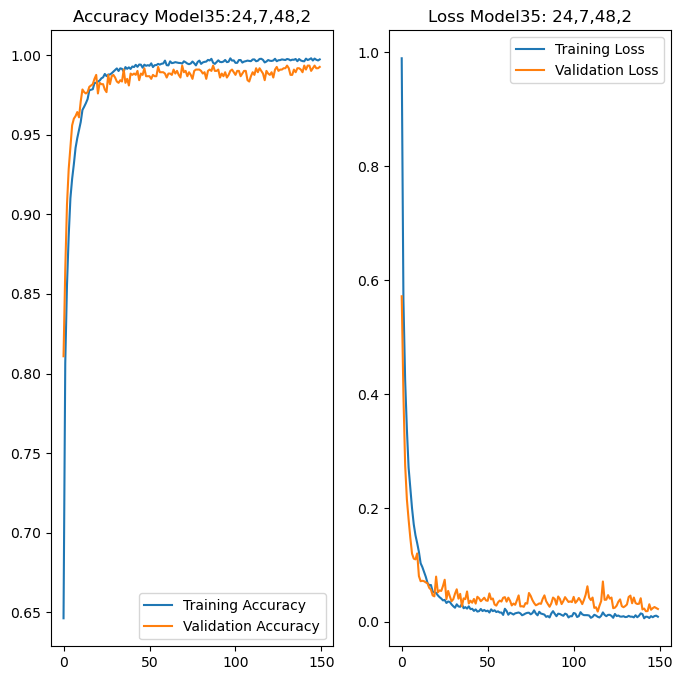

Epoch 1/150
197/197 [==============================] - 1s 3ms/step - loss: 1.1203 - accuracy: 0.5871 - val_loss: 0.6666 - val_accuracy: 0.7667
Epoch 2/150
197/197 [==============================] - 0s 2ms/step - loss: 0.6507 - accuracy: 0.7727 - val_loss: 0.4534 - val_accuracy: 0.8500
Epoch 3/150
197/197 [==============================] - 0s 2ms/step - loss: 0.5064 - accuracy: 0.8228 - val_loss: 0.3266 - val_accuracy: 0.8900
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4147 - accuracy: 0.8562 - val_loss: 0.2686 - val_accuracy: 0.9033
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3539 - accuracy: 0.8760 - val_loss: 0.2371 - val_accuracy: 0.9117
Epoch 6/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3148 - accuracy: 0.8912 - val_loss: 0.1939 - val_accuracy: 0.9300
Epoch 7/150
197/197 [==============================] - 0s 2ms/step - loss: 0.2727 - accuracy: 0.9058 - val_loss: 0.1759 - val_accuracy: 0.9417

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0305 - accuracy: 0.9891 - val_loss: 0.0329 - val_accuracy: 0.9875
Epoch 59/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0332 - accuracy: 0.9886 - val_loss: 0.0333 - val_accuracy: 0.9875
Epoch 60/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0316 - accuracy: 0.9895 - val_loss: 0.0363 - val_accuracy: 0.9867
Epoch 61/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0339 - accuracy: 0.9887 - val_loss: 0.0402 - val_accuracy: 0.9892
Epoch 62/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0295 - accuracy: 0.9901 - val_loss: 0.0381 - val_accuracy: 0.9900
Epoch 63/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0302 - accuracy: 0.9898 - val_loss: 0.0343 - val_accuracy: 0.9892
Epoch 64/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0239 - accuracy: 0.9920 - val_loss: 0.0291 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0227 - accuracy: 0.9927 - val_loss: 0.0285 - val_accuracy: 0.9883
Epoch 116/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0226 - accuracy: 0.9934 - val_loss: 0.0284 - val_accuracy: 0.9875
Epoch 117/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0203 - accuracy: 0.9938 - val_loss: 0.0290 - val_accuracy: 0.9883
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0149 - accuracy: 0.9950 - val_loss: 0.0284 - val_accuracy: 0.9900
Epoch 119/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0189 - accuracy: 0.9940 - val_loss: 0.0350 - val_accuracy: 0.9875
Epoch 120/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0201 - accuracy: 0.9934 - val_loss: 0.0380 - val_accuracy: 0.9858
Epoch 121/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0235 - accuracy: 0.9923 - val_loss: 0.0360 - val_ac

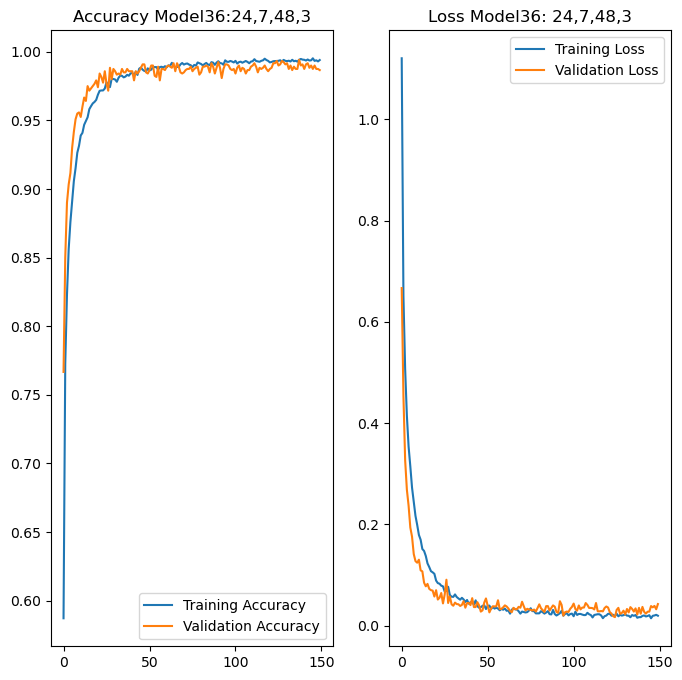

<Figure size 640x480 with 0 Axes>

In [ ]:
channel1 = [8, 16, 24]
window1 = [3, 5, 7]
window2 = [2, 3]

results = {}

i = 0
counter = 1
for ch1 in channel1:
    for w1 in window1:
        channel2 = [ch1, ch1*2]
        for ch2 in channel2:
            for w2 in window2:
                model_id = f"model_{counter}"
                
                model = CNN(in_dim=in_dim, epochs=epochs,
                            batch_size=batch_size, ch1=ch1, w1=w1,
                            ch2=ch2, w2=w2, y_train=y_train,
                            y_val=y_val, y_test=y_test,
                            out_dim=out_dim)
                
                model.create_model()
                
                history, train_time, total_params, pars_ratio = model.train_model(x_train, x_val)
                
                acc = history.history['accuracy']
                val_acc = history.history['val_accuracy']
                loss = history.history['loss']
                val_loss = history.history['val_loss']
                
                train_metric = model.eval_model(x_train, y_train)
                
                val_metric = model.eval_model(x_val, y_val)
                
                results[model_id] = {"Model": model_id,
                                     "Model Instance": model,
                                     "Configuration": f"{ch1},{w1},{ch2},{w2}",
                                     "Histories": history,
                                     "Train Time": train_time,
                                     "Parameters": total_params,
                                     "Parsimony Ratio": pars_ratio,
                                     "Train Accuracy": round((train_metric[1]*100), 2),
                                     "Train Loss": round((train_metric[0]*100), 2),
                                     "Validation Accuracy": round((val_metric[1]*100), 2),
                                     "Validation Loss": round((val_metric[0]*100), 2),
                                    }
                
                epochs_range = range(epochs)

                plt.figure(figsize=(8, 8))
                plt.subplot(1, 2, 1)
                plt.plot(epochs_range, acc, label='Training Accuracy')
                plt.plot(epochs_range, val_acc, label='Validation Accuracy')
                plt.legend(loc='lower right')
                plt.title(f'Accuracy Model{counter}:{ch1},{w1},{ch2},{w2}')
                plt.subplot(1, 2, 2)
                plt.plot(epochs_range, loss, label='Training Loss')
                plt.plot(epochs_range, val_loss, label='Validation Loss')
                plt.legend(loc='upper right')
                plt.title(f'Loss Model{counter}: {ch1},{w1},{ch2},{w2}')
                plt.show()
                i += 1
                counter += 1

plt.tight_layout()
plt.show()

In [ ]:
for model_id, result in results.items():
    print(f"Model: {model_id}")
    print(f"Configuration: {result['Configuration']}")
    print(f"Train Accuracy: {result['Train Accuracy']}")
    print(f"Train Loss: {result['Train Loss']}")
    print(f"Validation Accuracy: {result['Validation Accuracy']}")
    print(f"Validation Loss: {result['Validation Loss']}")
    print(f"Train Time: {result['Train Time']}")
    print(f"Total Parameters: {result['Parameters']}")
    print(f"Parsimony Ratio: {result['Parsimony Ratio']}")
    print("\n")

Model: model_1
Configuration: 8,3,8,2
Train Accuracy: 99.94
Train Loss: 0.35
Validation Accuracy: 99.25
Validation Loss: 2.4
Train Time: 71.12
Total Parameters: 116776
Parsimony Ratio: 1.55


Model: model_2
Configuration: 8,3,8,3
Train Accuracy: 99.74
Train Loss: 1.67
Validation Accuracy: 98.17
Validation Loss: 5.56
Train Time: 69.94
Total Parameters: 82600
Parsimony Ratio: 2.19


Model: model_3
Configuration: 8,3,16,2
Train Accuracy: 100.0
Train Loss: 0.02
Validation Accuracy: 99.08
Validation Loss: 3.58
Train Time: 69.65
Total Parameters: 229936
Parsimony Ratio: 0.79


Model: model_4
Configuration: 8,3,16,3
Train Accuracy: 99.98
Train Loss: 0.17
Validation Accuracy: 98.83
Validation Loss: 3.98
Train Time: 70.46
Total Parameters: 161584
Parsimony Ratio: 1.12


Model: model_5
Configuration: 8,5,8,2
Train Accuracy: 99.74
Train Loss: 1.59
Validation Accuracy: 98.0
Validation Loss: 6.02
Train Time: 68.42
Total Parameters: 82408
Parsimony Ratio: 2.2


Model: model_6
Configuration: 8,5,8,3


In [ ]:
results_out = []

for model_id, model_data in results.items():
    model_info = {
        "Model": model_data["Model"],
        "Configuration": model_data["Configuration"],
        "Train Time": model_data["Train Time"],
        "Parameters": model_data["Parameters"],
        "Parsimony Ratio": model_data["Parsimony Ratio"],
        "Train Accuracy": model_data["Train Accuracy"],
        "Train Loss": model_data["Train Loss"],
        "Validation Accuracy": model_data["Validation Accuracy"],
        "Validation Loss": model_data["Validation Loss"]
    }
    results_out.append(model_info)

df = pd.DataFrame(results_out)

output_file = "results.csv"

df.to_csv(output_file, index=False)

In [ ]:
def best_config(results):
    sorted_results = sorted(results.values(), key=lambda x: (-x["Validation Accuracy"], x["Validation Loss"]))
    return sorted_results

sorted_results = best_config(results)

for i, result in enumerate(sorted_results):
    print(f"Model: {result['Model']}")
    print(f"Configuration: {result['Configuration']}")
    print(f"Validation Accuracy: {result['Validation Accuracy']}")
    print(f"Validation Loss: {result['Validation Loss']}")
    print(f"Train Time: {result['Train Time']}")
    print(f"Total Parameters: {result['Parameters']}")
    print(f"Parsimony Ratio: {result['Parsimony Ratio']}")
    print("\n")

Model: model_31
Configuration: 24,5,48,2
Validation Accuracy: 99.42
Validation Loss: 2.51
Train Time: 69.92
Total Parameters: 479216
Parsimony Ratio: 0.38


Model: model_32
Configuration: 24,5,48,3
Validation Accuracy: 99.42
Validation Loss: 2.62
Train Time: 71.49
Total Parameters: 484976
Parsimony Ratio: 0.37


Model: model_27
Configuration: 24,3,48,2
Validation Accuracy: 99.42
Validation Loss: 2.71
Train Time: 73.69
Total Parameters: 685808
Parsimony Ratio: 0.26


Model: model_15
Configuration: 16,3,32,2
Validation Accuracy: 99.33
Validation Loss: 2.65
Train Time: 67.38
Total Parameters: 457360
Parsimony Ratio: 0.4


Model: model_17
Configuration: 16,5,16,2
Validation Accuracy: 99.25
Validation Loss: 1.65
Train Time: 65.19
Total Parameters: 161792
Parsimony Ratio: 1.12


Model: model_35
Configuration: 24,7,48,2
Validation Accuracy: 99.25
Validation Loss: 2.26
Train Time: 70.82
Total Parameters: 479792
Parsimony Ratio: 0.38


Model: model_13
Configuration: 16,3,16,2
Validation Accurac

In [ ]:
model_instance = results["model_17"]["Model Instance"]

model_architecture = model_instance.model

hidden_layer = model_architecture.layers[5]

print("Dimension of Model_17 Flatten Layer:", hidden_layer.output.shape[1])

Dimension of Model_17 Flatten Layer: 400


## Optimal Model

### Model 17: 16, 5, 16, 2

In [ ]:
epochs = 300

# define parameters
ch1 = 16
w1 = 5
ch2 = 16
w2 = 2

# create model
model_opt = tf.keras.Sequential([
    tf.keras.layers.Conv2D(ch1, w1, strides=(1,1), activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Conv2D(ch2, w2, strides=(1, 1), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Flatten(),
])

# calculate dimension of hidden layer based dimension of flatten layer
h = tf.keras.layers.Flatten()(tf.keras.Input(shape=(28,28,1))).shape[-1] // 2

model_opt.add(tf.keras.layers.Dense(h, activation='relu'))

model_opt.add(tf.keras.layers.Dense(out, activation='softmax'))

# define optimizer
model_opt.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

start_time = time.time()
# implement automatic learning
history_opt = model_opt.fit(
    x_train,
    y_train,
    validation_data = (x_val, y_val),
    batch_size = batch_size,
    epochs = epochs
)
end_time = time.time()
train_time = (end_time - start_time)

Epoch 1/300
197/197 [==============================] - 1s 3ms/step - loss: 1.2397 - accuracy: 0.5398 - val_loss: 0.7867 - val_accuracy: 0.7467
Epoch 2/300
197/197 [==============================] - 0s 2ms/step - loss: 0.8029 - accuracy: 0.7173 - val_loss: 0.6002 - val_accuracy: 0.7967
Epoch 3/300
197/197 [==============================] - 0s 2ms/step - loss: 0.6454 - accuracy: 0.7734 - val_loss: 0.4544 - val_accuracy: 0.8575
Epoch 4/300
197/197 [==============================] - 0s 2ms/step - loss: 0.5542 - accuracy: 0.8059 - val_loss: 0.3698 - val_accuracy: 0.8825
Epoch 5/300
197/197 [==============================] - 0s 2ms/step - loss: 0.4771 - accuracy: 0.8339 - val_loss: 0.3111 - val_accuracy: 0.8942
Epoch 6/300
197/197 [==============================] - 0s 2ms/step - loss: 0.4209 - accuracy: 0.8535 - val_loss: 0.2798 - val_accuracy: 0.9017
Epoch 7/300
197/197 [==============================] - 0s 2ms/step - loss: 0.3842 - accuracy: 0.8681 - val_loss: 0.2382 - val_accuracy: 0.9192

Epoch 58/300
197/197 [==============================] - 0s 2ms/step - loss: 0.0703 - accuracy: 0.9749 - val_loss: 0.0383 - val_accuracy: 0.9892
Epoch 59/300
197/197 [==============================] - 0s 2ms/step - loss: 0.0596 - accuracy: 0.9785 - val_loss: 0.0363 - val_accuracy: 0.9867
Epoch 60/300
197/197 [==============================] - 0s 2ms/step - loss: 0.0634 - accuracy: 0.9770 - val_loss: 0.0319 - val_accuracy: 0.9883
Epoch 61/300
197/197 [==============================] - 0s 2ms/step - loss: 0.0608 - accuracy: 0.9777 - val_loss: 0.0322 - val_accuracy: 0.9875
Epoch 62/300
197/197 [==============================] - 0s 2ms/step - loss: 0.0606 - accuracy: 0.9782 - val_loss: 0.0329 - val_accuracy: 0.9875
Epoch 63/300
197/197 [==============================] - 0s 2ms/step - loss: 0.0612 - accuracy: 0.9785 - val_loss: 0.0369 - val_accuracy: 0.9867
Epoch 64/300
197/197 [==============================] - 0s 2ms/step - loss: 0.0645 - accuracy: 0.9793 - val_loss: 0.0325 - val_accuracy:

Epoch 115/300
197/197 [==============================] - 0s 2ms/step - loss: 0.0395 - accuracy: 0.9873 - val_loss: 0.0182 - val_accuracy: 0.9908
Epoch 116/300
197/197 [==============================] - 0s 2ms/step - loss: 0.0408 - accuracy: 0.9870 - val_loss: 0.0252 - val_accuracy: 0.9917
Epoch 117/300
197/197 [==============================] - 0s 2ms/step - loss: 0.0423 - accuracy: 0.9860 - val_loss: 0.0256 - val_accuracy: 0.9908
Epoch 118/300
197/197 [==============================] - 0s 2ms/step - loss: 0.0382 - accuracy: 0.9866 - val_loss: 0.0216 - val_accuracy: 0.9942
Epoch 119/300
197/197 [==============================] - 0s 2ms/step - loss: 0.0403 - accuracy: 0.9866 - val_loss: 0.0217 - val_accuracy: 0.9892
Epoch 120/300
197/197 [==============================] - 0s 2ms/step - loss: 0.0419 - accuracy: 0.9855 - val_loss: 0.0295 - val_accuracy: 0.9917
Epoch 121/300
197/197 [==============================] - 0s 2ms/step - loss: 0.0444 - accuracy: 0.9846 - val_loss: 0.0241 - val_ac

197/197 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 0.9876 - val_loss: 0.0258 - val_accuracy: 0.9917
Epoch 172/300
197/197 [==============================] - 0s 2ms/step - loss: 0.0318 - accuracy: 0.9896 - val_loss: 0.0203 - val_accuracy: 0.9917
Epoch 173/300
197/197 [==============================] - 0s 2ms/step - loss: 0.0300 - accuracy: 0.9904 - val_loss: 0.0214 - val_accuracy: 0.9942
Epoch 174/300
197/197 [==============================] - 0s 2ms/step - loss: 0.0313 - accuracy: 0.9893 - val_loss: 0.0280 - val_accuracy: 0.9892
Epoch 175/300
197/197 [==============================] - 0s 2ms/step - loss: 0.0339 - accuracy: 0.9887 - val_loss: 0.0264 - val_accuracy: 0.9908
Epoch 176/300
197/197 [==============================] - 0s 2ms/step - loss: 0.0313 - accuracy: 0.9898 - val_loss: 0.0240 - val_accuracy: 0.9917
Epoch 177/300
197/197 [==============================] - 0s 2ms/step - loss: 0.0281 - accuracy: 0.9908 - val_loss: 0.0274 - val_accuracy: 0.9908

197/197 [==============================] - 0s 2ms/step - loss: 0.0270 - accuracy: 0.9910 - val_loss: 0.0199 - val_accuracy: 0.9917
Epoch 228/300
197/197 [==============================] - 0s 2ms/step - loss: 0.0305 - accuracy: 0.9898 - val_loss: 0.0297 - val_accuracy: 0.9900
Epoch 229/300
197/197 [==============================] - 0s 2ms/step - loss: 0.0287 - accuracy: 0.9910 - val_loss: 0.0210 - val_accuracy: 0.9917
Epoch 230/300
197/197 [==============================] - 0s 2ms/step - loss: 0.0314 - accuracy: 0.9890 - val_loss: 0.0315 - val_accuracy: 0.9892
Epoch 231/300
197/197 [==============================] - 0s 2ms/step - loss: 0.0330 - accuracy: 0.9885 - val_loss: 0.0275 - val_accuracy: 0.9900
Epoch 232/300
197/197 [==============================] - 0s 2ms/step - loss: 0.0298 - accuracy: 0.9905 - val_loss: 0.0253 - val_accuracy: 0.9900
Epoch 233/300
197/197 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 0.9900 - val_loss: 0.0269 - val_accuracy: 0.9908

197/197 [==============================] - 0s 2ms/step - loss: 0.0261 - accuracy: 0.9911 - val_loss: 0.0333 - val_accuracy: 0.9883
Epoch 284/300
197/197 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 0.9915 - val_loss: 0.0227 - val_accuracy: 0.9925
Epoch 285/300
197/197 [==============================] - 0s 2ms/step - loss: 0.0257 - accuracy: 0.9918 - val_loss: 0.0266 - val_accuracy: 0.9892
Epoch 286/300
197/197 [==============================] - 0s 2ms/step - loss: 0.0258 - accuracy: 0.9913 - val_loss: 0.0165 - val_accuracy: 0.9925
Epoch 287/300
197/197 [==============================] - 0s 2ms/step - loss: 0.0238 - accuracy: 0.9921 - val_loss: 0.0182 - val_accuracy: 0.9925
Epoch 288/300
197/197 [==============================] - 0s 2ms/step - loss: 0.0237 - accuracy: 0.9917 - val_loss: 0.0183 - val_accuracy: 0.9933
Epoch 289/300
197/197 [==============================] - 0s 2ms/step - loss: 0.0279 - accuracy: 0.9913 - val_loss: 0.0271 - val_accuracy: 0.9908

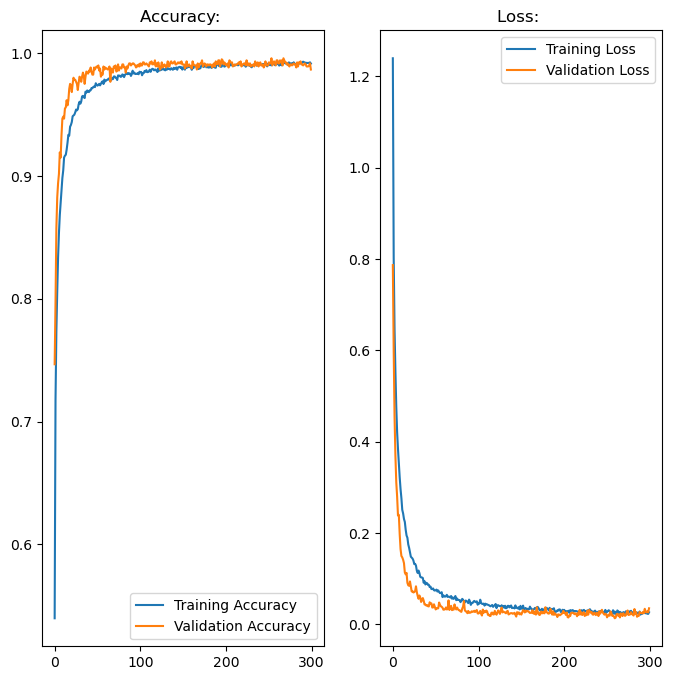

In [ ]:
acc = history_opt.history['accuracy']
val_acc = history_opt.history['val_accuracy']

loss = history_opt.history['loss']
val_loss = history_opt.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy: ')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss: ')
plt.show()

In [ ]:
# collect predictions
test_pred = np.argmax(model_opt.predict(x_test), axis=1)
test_true = np.argmax(y_test, axis=1)

# compute the confusion matrix
conf_matrix = confusion_matrix(test_pred, test_true)

# normalize the confusion matrix
normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# convert to percentage
percentage_conf_matrix = normalized_conf_matrix * 100

total_params = model_opt.count_params()
total_infos = y_train.shape[0] * y_train.shape[1]
pars_ratio = round(total_infos / total_params, 2)
        
model_opt.summary()

print("Train time:", round(train_time, 2))

train_metric = model_opt.evaluate(x_train, y_train, verbose=0)
print("Train Accuracy:", round((train_metric[1]*100), 2),
      "\nTrain Loss:", round((train_metric[0]*100), 2))

val_metric = model_opt.evaluate(x_val, y_val, verbose=0)
print("Validation Accuracy:", round((val_metric[1]*100), 2),
      "\nValidation Loss:", round((val_metric[0]*100), 2))

# test accuracy and loss
test_metric = model_opt.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", round((test_metric[1]*100), 2),
      "\nTest Loss:", round((test_metric[0]*100), 2))

print("Accuracy Robustness:", round((test_metric[1]/train_metric[1]*100), 2))

print("Parsimony Ratio:", pars_ratio)

# test confusion
print("Confusion Matrix (Percentage):")
print("Confusion Matrix (Percentage):")
for row in percentage_conf_matrix:
    formatted_row = ["{:.2f}".format(x) for x in row]
    print(" ".join(formatted_row))

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 16)        1040      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_45 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_82 (Dense)             (None, 392)             

In [ ]:
get_f = model_opt.layers[5].output
f_out = tf.keras.backend.function(inputs=[model_opt.input], outputs=[get_f])
f_test = f_out(x_test)[0]

n_samples = f_test.shape[0]
n_features = np.prod(f_test.shape[1:])
f_test_flat = np.reshape(f_test, (n_samples, n_features))

# create a PCA object with n_components = # features in f_test_flat
n_components = f_test_flat.shape[-1]
pca = PCA(n_components=n_components)

# fit PCA model to f_test_flat
pca.fit(f_test_flat)

# calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# find minimum # of principal components to explain 99% of variance
n_comp_99 = np.argmax(cumulative_variance >= 0.99) + 1

n_comp_99

321

### hidden n_comp_99

In [ ]:
epochs = 175

# define parameters
ch1 = 16
w1 = 5
ch2 = 16
w2 = 2

# create model
model_opt2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(ch1, w1, strides=(1,1), activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Conv2D(ch2, w2, strides=(1, 1), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Flatten(),
])

# calculate dimension of hidden layer based dimension of flatten layer
h = n_comp_99

model_opt2.add(tf.keras.layers.Dense(h, activation='relu'))

model_opt2.add(tf.keras.layers.Dense(out, activation='softmax'))

# define optimizer
model_opt2.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

start_time = time.time()
# implement automatic learning
history_opt2 = model_opt2.fit(
    x_train,
    y_train,
    validation_data = (x_val, y_val),
    batch_size = batch_size,
    epochs = epochs
)
end_time = time.time()
train_time = (end_time - start_time)

Epoch 1/175
197/197 [==============================] - 1s 3ms/step - loss: 1.2518 - accuracy: 0.5379 - val_loss: 0.8128 - val_accuracy: 0.7417
Epoch 2/175
197/197 [==============================] - 0s 2ms/step - loss: 0.7908 - accuracy: 0.7200 - val_loss: 0.5972 - val_accuracy: 0.8017
Epoch 3/175
197/197 [==============================] - 0s 2ms/step - loss: 0.6504 - accuracy: 0.7693 - val_loss: 0.4712 - val_accuracy: 0.8350
Epoch 4/175
197/197 [==============================] - 0s 2ms/step - loss: 0.5469 - accuracy: 0.8076 - val_loss: 0.3974 - val_accuracy: 0.8633
Epoch 5/175
197/197 [==============================] - 0s 2ms/step - loss: 0.4791 - accuracy: 0.8327 - val_loss: 0.3351 - val_accuracy: 0.8767
Epoch 6/175
197/197 [==============================] - 0s 2ms/step - loss: 0.4292 - accuracy: 0.8517 - val_loss: 0.2807 - val_accuracy: 0.9117
Epoch 7/175
197/197 [==============================] - 0s 2ms/step - loss: 0.3901 - accuracy: 0.8642 - val_loss: 0.2566 - val_accuracy: 0.9167

Epoch 58/175
197/197 [==============================] - 0s 2ms/step - loss: 0.0756 - accuracy: 0.9739 - val_loss: 0.0399 - val_accuracy: 0.9858
Epoch 59/175
197/197 [==============================] - 0s 2ms/step - loss: 0.0712 - accuracy: 0.9762 - val_loss: 0.0367 - val_accuracy: 0.9875
Epoch 60/175
197/197 [==============================] - 0s 2ms/step - loss: 0.0774 - accuracy: 0.9731 - val_loss: 0.0493 - val_accuracy: 0.9858
Epoch 61/175
197/197 [==============================] - 0s 2ms/step - loss: 0.0745 - accuracy: 0.9743 - val_loss: 0.0312 - val_accuracy: 0.9892
Epoch 62/175
197/197 [==============================] - 0s 2ms/step - loss: 0.0698 - accuracy: 0.9751 - val_loss: 0.0360 - val_accuracy: 0.9892
Epoch 63/175
197/197 [==============================] - 0s 2ms/step - loss: 0.0699 - accuracy: 0.9761 - val_loss: 0.0306 - val_accuracy: 0.9908
Epoch 64/175
197/197 [==============================] - 0s 2ms/step - loss: 0.0714 - accuracy: 0.9751 - val_loss: 0.0320 - val_accuracy:

Epoch 115/175
197/197 [==============================] - 0s 2ms/step - loss: 0.0464 - accuracy: 0.9841 - val_loss: 0.0208 - val_accuracy: 0.9933
Epoch 116/175
197/197 [==============================] - 0s 2ms/step - loss: 0.0484 - accuracy: 0.9841 - val_loss: 0.0233 - val_accuracy: 0.9925
Epoch 117/175
197/197 [==============================] - 0s 2ms/step - loss: 0.0485 - accuracy: 0.9833 - val_loss: 0.0262 - val_accuracy: 0.9875
Epoch 118/175
197/197 [==============================] - 0s 2ms/step - loss: 0.0512 - accuracy: 0.9830 - val_loss: 0.0262 - val_accuracy: 0.9917
Epoch 119/175
197/197 [==============================] - 0s 2ms/step - loss: 0.0482 - accuracy: 0.9840 - val_loss: 0.0277 - val_accuracy: 0.9900
Epoch 120/175
197/197 [==============================] - 0s 2ms/step - loss: 0.0456 - accuracy: 0.9846 - val_loss: 0.0345 - val_accuracy: 0.9908
Epoch 121/175
197/197 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9832 - val_loss: 0.0288 - val_ac

197/197 [==============================] - 0s 2ms/step - loss: 0.0429 - accuracy: 0.9856 - val_loss: 0.0331 - val_accuracy: 0.9883
Epoch 172/175
197/197 [==============================] - 0s 2ms/step - loss: 0.0389 - accuracy: 0.9868 - val_loss: 0.0237 - val_accuracy: 0.9925
Epoch 173/175
197/197 [==============================] - 0s 2ms/step - loss: 0.0397 - accuracy: 0.9867 - val_loss: 0.0244 - val_accuracy: 0.9917
Epoch 174/175
197/197 [==============================] - 0s 2ms/step - loss: 0.0396 - accuracy: 0.9869 - val_loss: 0.0286 - val_accuracy: 0.9900
Epoch 175/175
197/197 [==============================] - 0s 2ms/step - loss: 0.0351 - accuracy: 0.9874 - val_loss: 0.0218 - val_accuracy: 0.9933


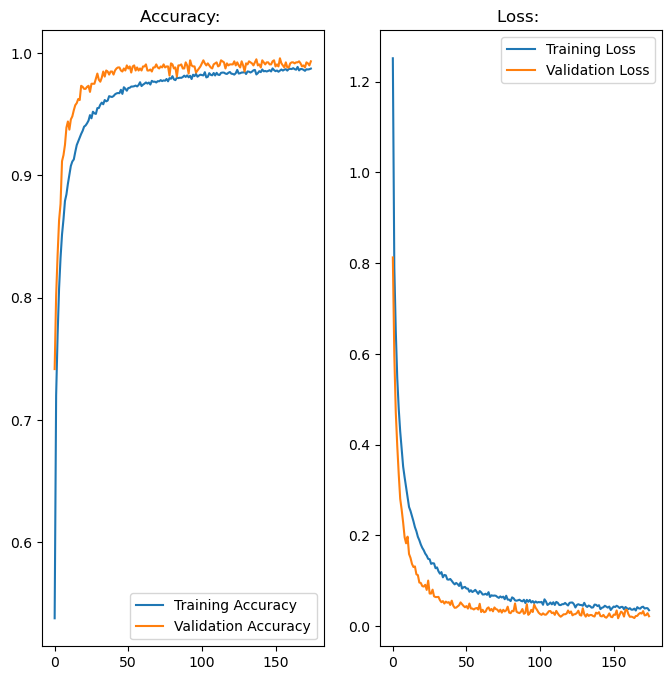

In [ ]:
acc = history_opt2.history['accuracy']
val_acc = history_opt2.history['val_accuracy']

loss = history_opt2.history['loss']
val_loss = history_opt2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy: ')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss: ')
plt.show()

In [ ]:
# collect predictions
test_pred = np.argmax(model_opt2.predict(x_test), axis=1)
test_true = np.argmax(y_test, axis=1)

# compute the confusion matrix
conf_matrix = confusion_matrix(test_pred, test_true)

# normalize the confusion matrix
normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# convert to percentage
percentage_conf_matrix = normalized_conf_matrix * 100

total_params = model_opt2.count_params()
pars_ratio = round(total_infos / total_params, 2)

model_opt2.summary()

print("Train time:", round(train_time, 2))

train_metric = model_opt2.evaluate(x_train, y_train, verbose=0)
print("Train Accuracy:", round((train_metric[1]*100), 2),
      "\nTrain Loss:", round((train_metric[0]*100), 2))

val_metric = model_opt2.evaluate(x_val, y_val, verbose=0)
print("Validation Accuracy:", round((val_metric[1]*100), 2),
      "\nValidation Loss:", round((val_metric[0]*100), 2))

# test accuracy and loss
test_metric = model_opt2.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", round((test_metric[1]*100), 2),
      "\nTest Loss:", round((test_metric[0]*100), 2))

print("Parsimony Ratio:", pars_ratio)

print("Accuracy Robustness:", round((test_metric[1]/train_metric[1]*100), 2))

# test confusion
print("Confusion Matrix (Percentage):")
print("Confusion Matrix (Percentage):")
for row in percentage_conf_matrix:
    formatted_row = ["{:.2f}".format(x) for x in row]
    print(" ".join(formatted_row))

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 11, 11, 16)        1040      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_50 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_90 (Dense)             (None, 321)             

### hidden n_comp_99 * 2

In [ ]:
epochs = 150

# define parameters
ch1 = 16
w1 = 5
ch2 = 16
w2 = 2

# create model
model_opt3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(ch1, w1, strides=(1,1), activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Conv2D(ch2, w2, strides=(1, 1), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Flatten(),
])

# calculate dimension of hidden layer based dimension of flatten layer
h = n_comp_99 * 2

model_opt3.add(tf.keras.layers.Dense(h, activation='relu'))

model_opt3.add(tf.keras.layers.Dense(out, activation='softmax'))

# define optimizer
model_opt3.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

start_time = time.time()
# implement automatic learning
history_opt3 = model_opt3.fit(
    x_train,
    y_train,
    validation_data = (x_val, y_val),
    batch_size = batch_size,
    epochs = epochs
)
end_time = time.time()
train_time = (end_time - start_time)

Epoch 1/150
197/197 [==============================] - 1s 3ms/step - loss: 1.1946 - accuracy: 0.5550 - val_loss: 0.7703 - val_accuracy: 0.7483
Epoch 2/150
197/197 [==============================] - 0s 2ms/step - loss: 0.7614 - accuracy: 0.7297 - val_loss: 0.5135 - val_accuracy: 0.8292
Epoch 3/150
197/197 [==============================] - 0s 2ms/step - loss: 0.6043 - accuracy: 0.7871 - val_loss: 0.3800 - val_accuracy: 0.8725
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4996 - accuracy: 0.8255 - val_loss: 0.3133 - val_accuracy: 0.8917
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.4361 - accuracy: 0.8494 - val_loss: 0.2634 - val_accuracy: 0.9083
Epoch 6/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3835 - accuracy: 0.8664 - val_loss: 0.2122 - val_accuracy: 0.9283
Epoch 7/150
197/197 [==============================] - 0s 2ms/step - loss: 0.3486 - accuracy: 0.8811 - val_loss: 0.1998 - val_accuracy: 0.9300

Epoch 58/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0534 - accuracy: 0.9815 - val_loss: 0.0298 - val_accuracy: 0.9933
Epoch 59/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0543 - accuracy: 0.9817 - val_loss: 0.0381 - val_accuracy: 0.9875
Epoch 60/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0528 - accuracy: 0.9818 - val_loss: 0.0311 - val_accuracy: 0.9917
Epoch 61/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0507 - accuracy: 0.9832 - val_loss: 0.0379 - val_accuracy: 0.9892
Epoch 62/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0511 - accuracy: 0.9828 - val_loss: 0.0279 - val_accuracy: 0.9925
Epoch 63/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9812 - val_loss: 0.0498 - val_accuracy: 0.9825
Epoch 64/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0540 - accuracy: 0.9825 - val_loss: 0.0403 - val_accuracy:

Epoch 115/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0370 - accuracy: 0.9872 - val_loss: 0.0358 - val_accuracy: 0.9875
Epoch 116/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9876 - val_loss: 0.0433 - val_accuracy: 0.9875
Epoch 117/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0318 - accuracy: 0.9889 - val_loss: 0.0435 - val_accuracy: 0.9875
Epoch 118/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0310 - accuracy: 0.9891 - val_loss: 0.0272 - val_accuracy: 0.9900
Epoch 119/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0319 - accuracy: 0.9892 - val_loss: 0.0379 - val_accuracy: 0.9892
Epoch 120/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0363 - accuracy: 0.9880 - val_loss: 0.0288 - val_accuracy: 0.9875
Epoch 121/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0324 - accuracy: 0.9888 - val_loss: 0.0269 - val_ac

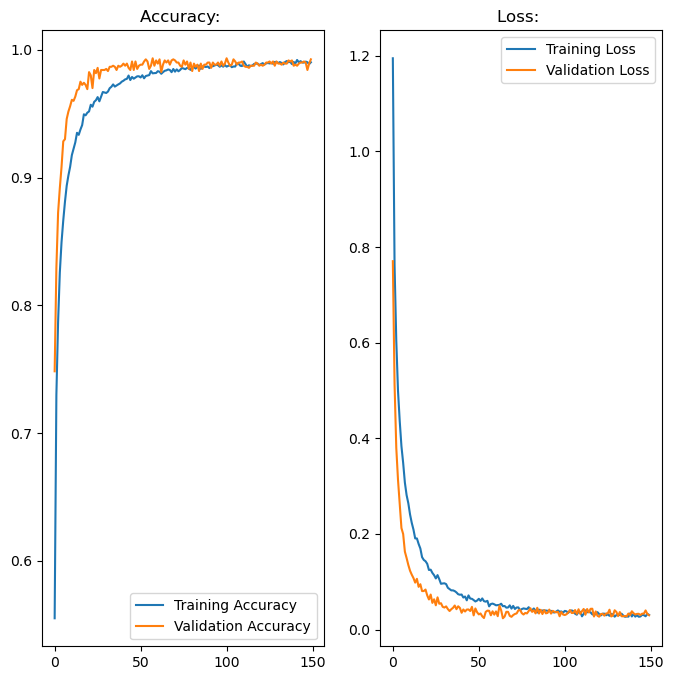

In [ ]:
acc = history_opt3.history['accuracy']
val_acc = history_opt3.history['val_accuracy']

loss = history_opt3.history['loss']
val_loss = history_opt3.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy: ')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss: ')
plt.show()

In [ ]:
# collect predictions
test_pred = np.argmax(model_opt3.predict(x_test), axis=1)
test_true = np.argmax(y_test, axis=1)

# compute the confusion matrix
conf_matrix = confusion_matrix(test_pred, test_true)

# normalize the confusion matrix
normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# convert to percentage
percentage_conf_matrix = normalized_conf_matrix * 100

total_params = model_opt3.count_params()
pars_ratio = round(total_infos / total_params, 2)
        
model_opt3.summary()

print("Train time:", round(train_time, 2))

train_metric = model_opt3.evaluate(x_train, y_train, verbose=0)
print("Train Accuracy:", round((train_metric[1]*100), 2),
      "\nTrain Loss:", round((train_metric[0]*100), 2))

val_metric = model_opt3.evaluate(x_val, y_val, verbose=0)
print("Validation Accuracy:", round((val_metric[1]*100), 2),
      "\nValidation Loss:", round((val_metric[0]*100), 2))

# test accuracy and loss
test_metric = model_opt3.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", round((test_metric[1]*100), 2),
      "\nTest Loss:", round((test_metric[0]*100), 2))

print("Parsimony Ratio:", pars_ratio)

print("Accuracy Robustness:", round((test_metric[1]/train_metric[1]*100), 2))

# test confusion
print("Confusion Matrix (Percentage):")
print("Confusion Matrix (Percentage):")
for row in percentage_conf_matrix:
    formatted_row = ["{:.2f}".format(x) for x in row]
    print(" ".join(formatted_row))

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 16)        1040      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_47 (Dropout)         (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_51 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_92 (Dense)             (None, 642)             

## Binary Model

### Prepare Binary Data

In [ ]:
# create binary class data sets
b_cl_0 = merged[merged[:,0] == 6]
b_cl_1 = merged[merged[:,0] == 7]

# relabel binary classes
b_cl_0[:,0] = 0
b_cl_1[:,0] = 1

# balance binary classes
b_red_cl_0 = b_cl_0[np.random.permutation(b_cl_0.shape[0])[:6699]]
b_red_cl_1 = b_cl_1[np.random.permutation(b_cl_1.shape[0])[:6699]]

# create binary test split
b_cl_0_trainval, b_cl_0_test = train_test_split(b_red_cl_0, test_size=.1)
b_cl_1_trainval, b_cl_1_test = train_test_split(b_red_cl_1, test_size=.1)

# create binary validation split
b_cl_0_train, b_cl_0_val = train_test_split(b_cl_0_trainval, test_size=.05)
b_cl_1_train, b_cl_1_val = train_test_split(b_cl_1_trainval, test_size=.05)

# combine binary train data
b_train = np.concatenate((b_cl_0_train, b_cl_1_train), axis=0)

# combine binary validation data
b_val = np.concatenate((b_cl_0_val, b_cl_1_val), axis=0)

# combine binary test data
b_test = np.concatenate((b_cl_0_test, b_cl_1_test), axis=0)

# separate x and y binary train data
b_y_train = b_train[:, 0].reshape(len(b_train[:, 0]), 1)
b_x_train_flat = b_train[:, 1:]

# separate x and y binary validation data
b_y_val = b_val[:, 0].reshape(len(b_val[:, 0]), 1)
b_x_val_flat = b_val[:, 1:]

# separate x and y binary test data
b_y_test = b_test[:, 0].reshape(len(b_test[:, 0]), 1)
b_x_test_flat = b_test[:, 1:]

# convert binary train variable vectors into matrices
b_x_train = np.array([x.reshape(28, 28) for x in b_x_train_flat])/255

# convert binary validation variable vectors into matrices
b_x_val = np.array([x.reshape(28, 28) for x in b_x_val_flat])/255

# convert binary test variable vectors into matrices
b_x_test = np.array([x.reshape(28, 28) for x in b_x_test_flat])/255

# add axis to binary train variables
b_x_train = b_x_train[..., np.newaxis]

# add axis to binary validation variables
b_x_val = b_x_val[..., np.newaxis]

# add axis to binary test variables
b_x_test = b_x_test[..., np.newaxis]

# one-hot encode binary train labels
b_y_train = to_categorical(b_y_train)

# one-hot encode binary validation labels
b_y_val = to_categorical(b_y_val)

# one-hot encode binary test labels
b_y_test = to_categorical(b_y_test)

### Optimal Binary Model

In [ ]:
epochs = 300

# define parameters
ch1 = 16
w1 = 5
ch2 = 16
w2 = 2

# create model
model_optb = tf.keras.Sequential([
    tf.keras.layers.Conv2D(ch1, w1, strides=(1,1), activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Conv2D(ch2, w2, strides=(1, 1), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Flatten(),
])

# calculate dimension of hidden layer based dimension of flatten layer
h = tf.keras.layers.Flatten()(tf.keras.Input(shape=(28,28,1))).shape[-1] // 2

model_optb.add(tf.keras.layers.Dense(h, activation='relu'))

model_optb.add(tf.keras.layers.Dense(2, activation='softmax'))

# define optimizer
model_optb.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

start_time = time.time()
history_optb = model_optb.fit(
    b_x_train,
    b_y_train,
    validation_data = (b_x_val, b_y_val),
    batch_size = batch_size,
    epochs = epochs
)
end_time = time.time()
train_time = (end_time - start_time)

Epoch 1/300
100/100 [==============================] - 1s 11ms/step - loss: 0.0910 - accuracy: 0.9676 - val_loss: 0.0123 - val_accuracy: 0.9967
Epoch 2/300
100/100 [==============================] - 0s 2ms/step - loss: 0.0216 - accuracy: 0.9935 - val_loss: 0.0255 - val_accuracy: 0.9901
Epoch 3/300
100/100 [==============================] - 0s 2ms/step - loss: 0.0119 - accuracy: 0.9962 - val_loss: 0.0029 - val_accuracy: 0.9983
Epoch 4/300
100/100 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 0.9980 - val_loss: 0.0022 - val_accuracy: 0.9983
Epoch 5/300
100/100 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 0.9974 - val_loss: 8.9725e-04 - val_accuracy: 1.0000
Epoch 6/300
100/100 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 0.9989 - val_loss: 0.0025 - val_accuracy: 0.9983
Epoch 7/300
100/100 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.9988 - val_loss: 0.0038 - val_accuracy: 0

100/100 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 1.5139e-05 - val_accuracy: 1.0000
Epoch 57/300
100/100 [==============================] - 0s 2ms/step - loss: 4.3084e-04 - accuracy: 0.9999 - val_loss: 8.6323e-06 - val_accuracy: 1.0000
Epoch 58/300
100/100 [==============================] - 0s 2ms/step - loss: 8.7908e-05 - accuracy: 1.0000 - val_loss: 1.8570e-06 - val_accuracy: 1.0000
Epoch 59/300
100/100 [==============================] - 0s 2ms/step - loss: 3.0496e-04 - accuracy: 0.9999 - val_loss: 4.0027e-06 - val_accuracy: 1.0000
Epoch 60/300
100/100 [==============================] - 0s 2ms/step - loss: 2.1932e-04 - accuracy: 0.9999 - val_loss: 1.1317e-06 - val_accuracy: 1.0000
Epoch 61/300
100/100 [==============================] - 0s 2ms/step - loss: 1.9072e-04 - accuracy: 1.0000 - val_loss: 2.6387e-07 - val_accuracy: 1.0000
Epoch 62/300
100/100 [==============================] - 0s 2ms/step - loss: 5.2415e-05 - accuracy: 1.0000

100/100 [==============================] - 0s 2ms/step - loss: 3.9024e-04 - accuracy: 0.9998 - val_loss: 1.3342e-07 - val_accuracy: 1.0000
Epoch 111/300
100/100 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 7.6725e-05 - val_accuracy: 1.0000
Epoch 112/300
100/100 [==============================] - 0s 2ms/step - loss: 5.1313e-04 - accuracy: 0.9999 - val_loss: 3.1596e-07 - val_accuracy: 1.0000
Epoch 113/300
100/100 [==============================] - 0s 2ms/step - loss: 2.1894e-04 - accuracy: 0.9998 - val_loss: 6.2431e-06 - val_accuracy: 1.0000
Epoch 114/300
100/100 [==============================] - 0s 2ms/step - loss: 2.3773e-05 - accuracy: 1.0000 - val_loss: 2.8111e-06 - val_accuracy: 1.0000
Epoch 115/300
100/100 [==============================] - 0s 2ms/step - loss: 1.8160e-05 - accuracy: 1.0000 - val_loss: 3.2439e-06 - val_accuracy: 1.0000
Epoch 116/300
100/100 [==============================] - 0s 2ms/step - loss: 4.5046e-04 - accuracy: 

Epoch 164/300
100/100 [==============================] - 0s 3ms/step - loss: 1.7586e-06 - accuracy: 1.0000 - val_loss: 1.4920e-07 - val_accuracy: 1.0000
Epoch 165/300
100/100 [==============================] - 0s 2ms/step - loss: 1.0906e-06 - accuracy: 1.0000 - val_loss: 1.2848e-07 - val_accuracy: 1.0000
Epoch 166/300
100/100 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 7.3523e-07 - val_accuracy: 1.0000
Epoch 167/300
100/100 [==============================] - 0s 2ms/step - loss: 9.7336e-05 - accuracy: 1.0000 - val_loss: 7.3268e-06 - val_accuracy: 1.0000
Epoch 168/300
100/100 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 4.1746e-05 - val_accuracy: 1.0000
Epoch 169/300
100/100 [==============================] - 0s 2ms/step - loss: 3.6741e-05 - accuracy: 1.0000 - val_loss: 6.7478e-06 - val_accuracy: 1.0000
Epoch 170/300
100/100 [==============================] - 0s 2ms/step - loss: 1.6524e-05 - 

100/100 [==============================] - 0s 2ms/step - loss: 2.6146e-07 - accuracy: 1.0000 - val_loss: 3.3552e-09 - val_accuracy: 1.0000
Epoch 218/300
100/100 [==============================] - 0s 2ms/step - loss: 3.2384e-04 - accuracy: 0.9998 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 219/300
100/100 [==============================] - 0s 3ms/step - loss: 4.3149e-04 - accuracy: 0.9997 - val_loss: 9.3350e-07 - val_accuracy: 1.0000
Epoch 220/300
100/100 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 5.8924e-07 - val_accuracy: 1.0000
Epoch 221/300
100/100 [==============================] - 0s 2ms/step - loss: 9.8174e-04 - accuracy: 0.9998 - val_loss: 6.8749e-07 - val_accuracy: 1.0000
Epoch 222/300
100/100 [==============================] - 0s 2ms/step - loss: 8.3221e-04 - accuracy: 0.9998 - val_loss: 3.9630e-06 - val_accuracy: 1.0000
Epoch 223/300
100/100 [==============================] - 0s 2ms/step - loss: 8.9764e-04 - accuracy: 

Epoch 271/300
100/100 [==============================] - 0s 3ms/step - loss: 1.6556e-06 - accuracy: 1.0000 - val_loss: 1.1842e-09 - val_accuracy: 1.0000
Epoch 272/300
100/100 [==============================] - 0s 2ms/step - loss: 2.7431e-06 - accuracy: 1.0000 - val_loss: 9.8683e-10 - val_accuracy: 1.0000
Epoch 273/300
100/100 [==============================] - 0s 2ms/step - loss: 7.3890e-07 - accuracy: 1.0000 - val_loss: 7.8947e-10 - val_accuracy: 1.0000
Epoch 274/300
100/100 [==============================] - 0s 2ms/step - loss: 1.1623e-06 - accuracy: 1.0000 - val_loss: 3.9473e-10 - val_accuracy: 1.0000
Epoch 275/300
100/100 [==============================] - 0s 2ms/step - loss: 3.9818e-08 - accuracy: 1.0000 - val_loss: 3.9473e-10 - val_accuracy: 1.0000
Epoch 276/300
100/100 [==============================] - 0s 2ms/step - loss: 2.4009e-08 - accuracy: 1.0000 - val_loss: 3.9473e-10 - val_accuracy: 1.0000
Epoch 277/300
100/100 [==============================] - 0s 2ms/step - loss: 4.504

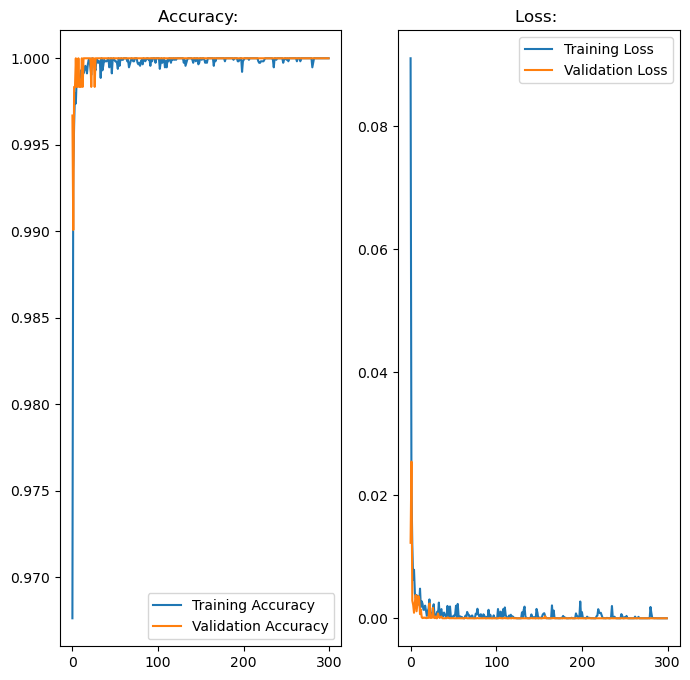

In [ ]:
acc = history_optb.history['accuracy']
val_acc = history_optb.history['val_accuracy']

loss = history_optb.history['loss']
val_loss = history_optb.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy: ')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss: ')
plt.show()

In [ ]:
# collect predictions
test_pred = np.argmax(model_optb.predict(b_x_test), axis=1)
test_true = np.argmax(b_y_test, axis=1)

# compute the confusion matrix
conf_matrix = confusion_matrix(test_pred, test_true)

# normalize the confusion matrix
normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# convert to percentage
percentage_conf_matrix = normalized_conf_matrix * 100

total_params = model_optb.count_params()
total_infos = b_y_train.shape[0] * y_train.shape[1]
pars_ratio = round(total_infos / total_params, 2)

model_optb.summary()

print("Train time:", round(train_time, 2))

train_metric = model_optb.evaluate(b_x_train, b_y_train, verbose=0)
print("Train Accuracy:", round((train_metric[1]*100), 2),
      "\nTrain Loss:", round((train_metric[0]*100), 2))

val_metric = model_optb.evaluate(b_x_val, b_y_val, verbose=0)
print("Validation Accuracy:", round((val_metric[1]*100), 2),
      "\nValidation Loss:", round((val_metric[0]*100), 2))

# test accuracy and loss
test_metric = model_optb.evaluate(b_x_test, b_y_test, verbose=0)
print("Test Accuracy:", round((test_metric[1]*100), 2),
      "\nTest Loss:", round((test_metric[0]*100), 2))

print("Parsimony Ratio:", pars_ratio)

print("Accuracy Robustness:", round((test_metric[1]/train_metric[1]*100), 2))

# test confusion
print("Confusion Matrix (Percentage):")
print("Confusion Matrix (Percentage):")
for row in percentage_conf_matrix:
    formatted_row = ["{:.2f}".format(x) for x in row]
    print(" ".join(formatted_row))

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 11, 11, 16)        1040      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_54 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_96 (Dense)             (None, 392)             

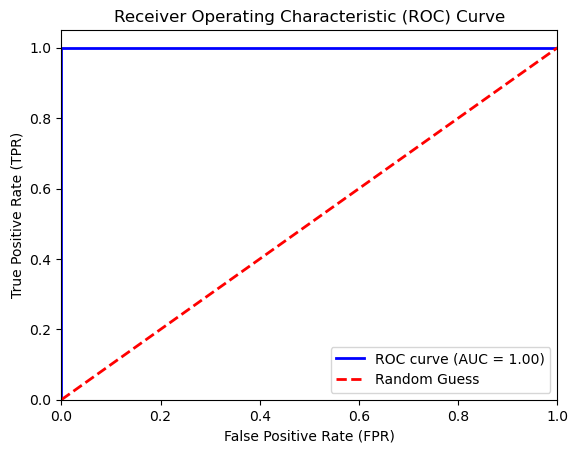

In [ ]:
# Get predicted probabilities for the positive class
y_pred_prob = model_optb.predict(b_x_test)[:, 1]

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(b_y_test[:, 1], y_pred_prob)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()